In [1]:
# Load general utilities
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import numpy as np
import seaborn as sns
import missingno as msno

# Standardization
from sklearn.preprocessing import StandardScaler

# Feature Selection
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold

# Resampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Train-test Split
from sklearn.model_selection import train_test_split

# Machine Learning model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.metrics import geometric_mean_score

# Eliminate Sign of Warning
import warnings
warnings.filterwarnings(action="ignore")



# Data Descriptive

In [2]:
data = pd.read_csv('/Users/chiawin/Desktop/Dissertation/Bankruptcy Prediction/data.csv')
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
data.shape

(6819, 96)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
EV=data.drop(labels=['Bankrupt?'], axis=1)

<AxesSubplot:>

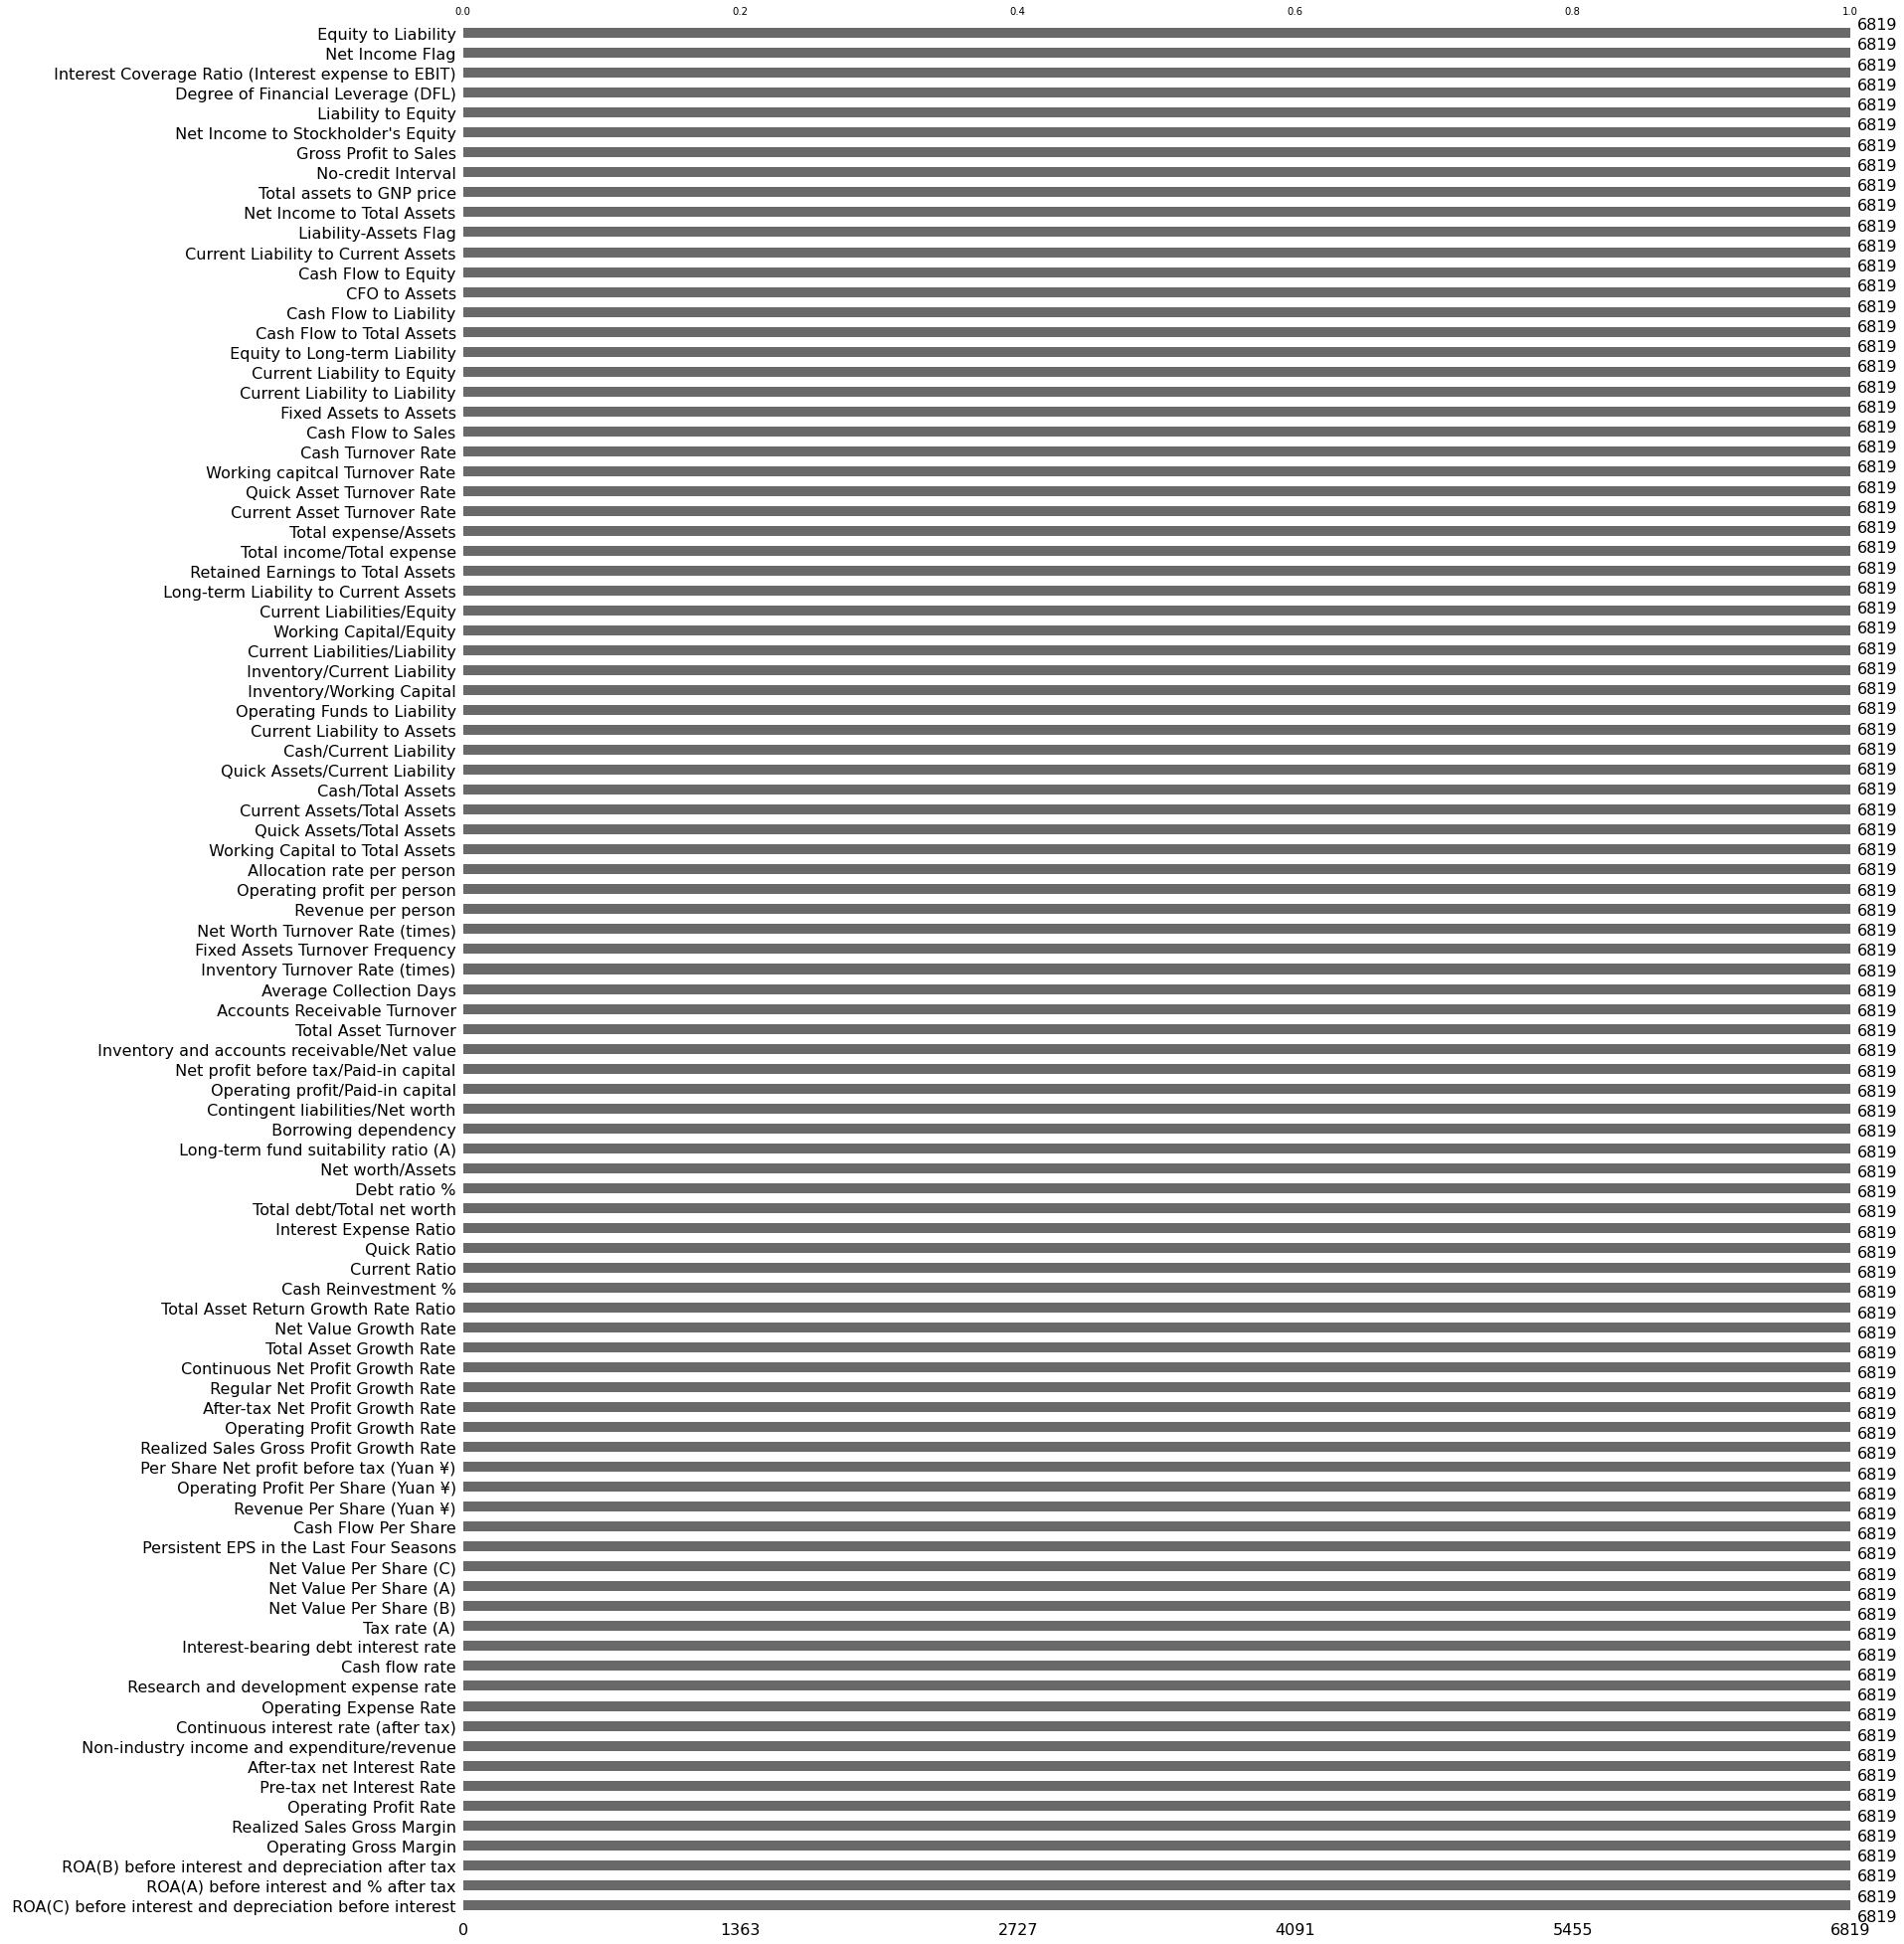

In [6]:
msno.bar(EV)

In [7]:
EV.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


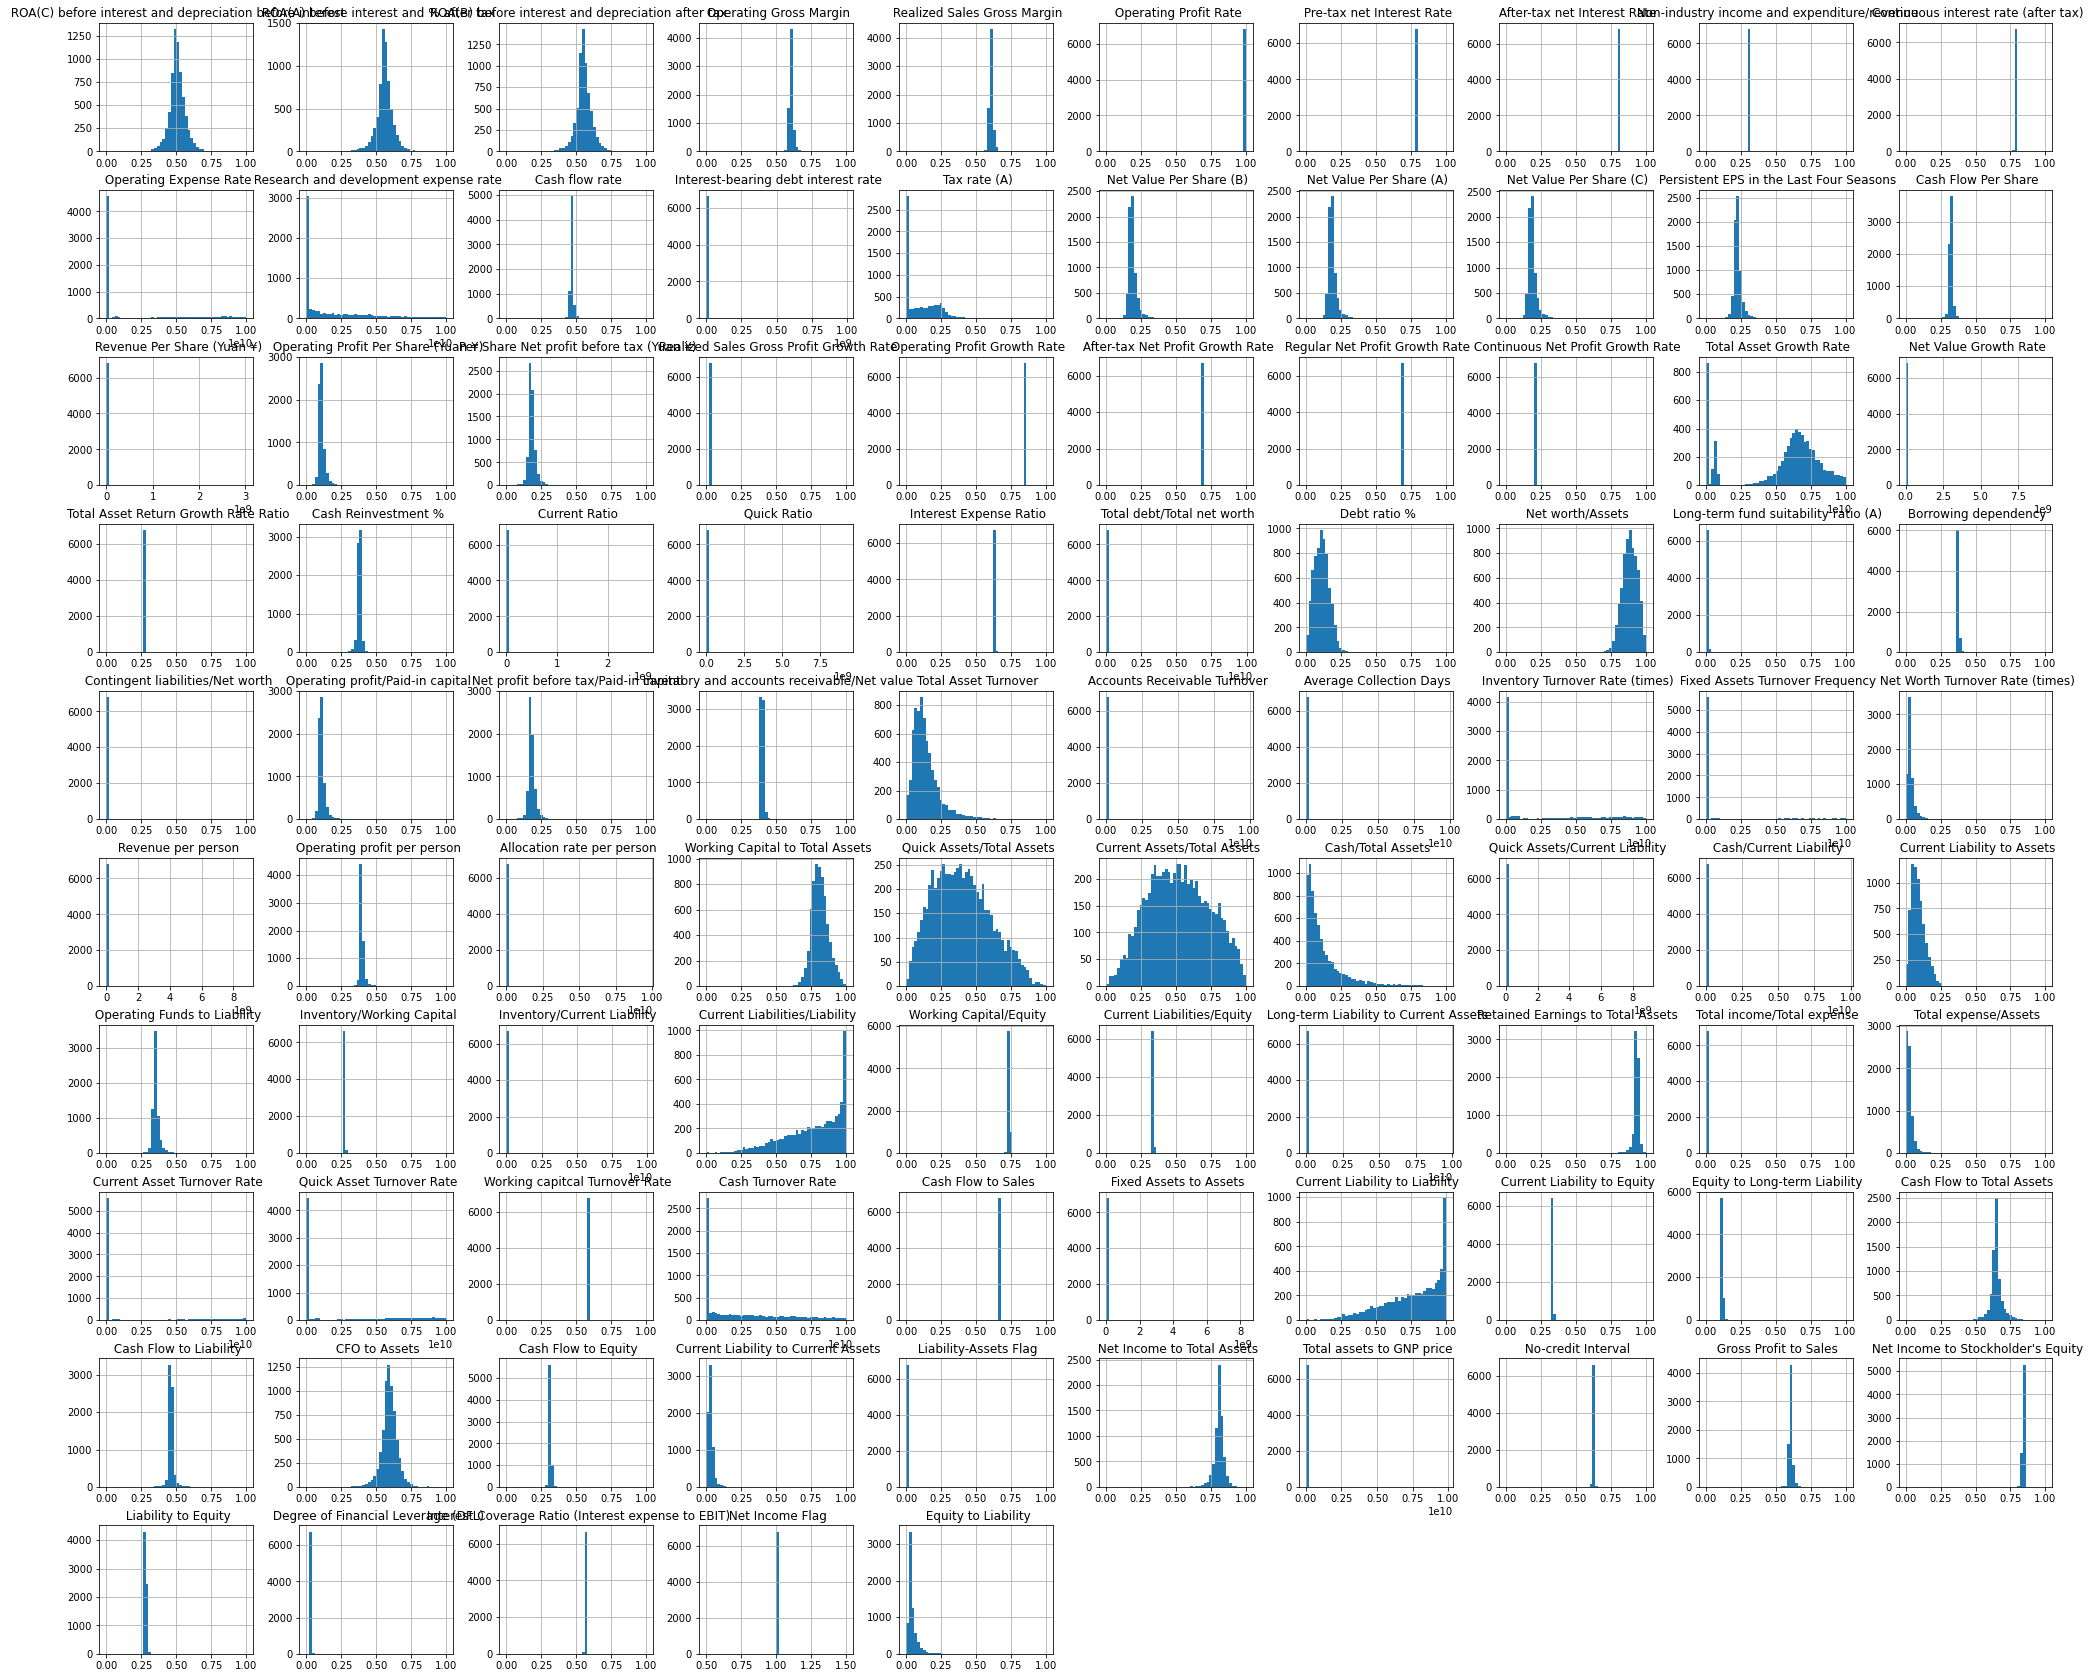

In [8]:
EV.hist(figsize = (35,30), bins = 50)
plt.show()

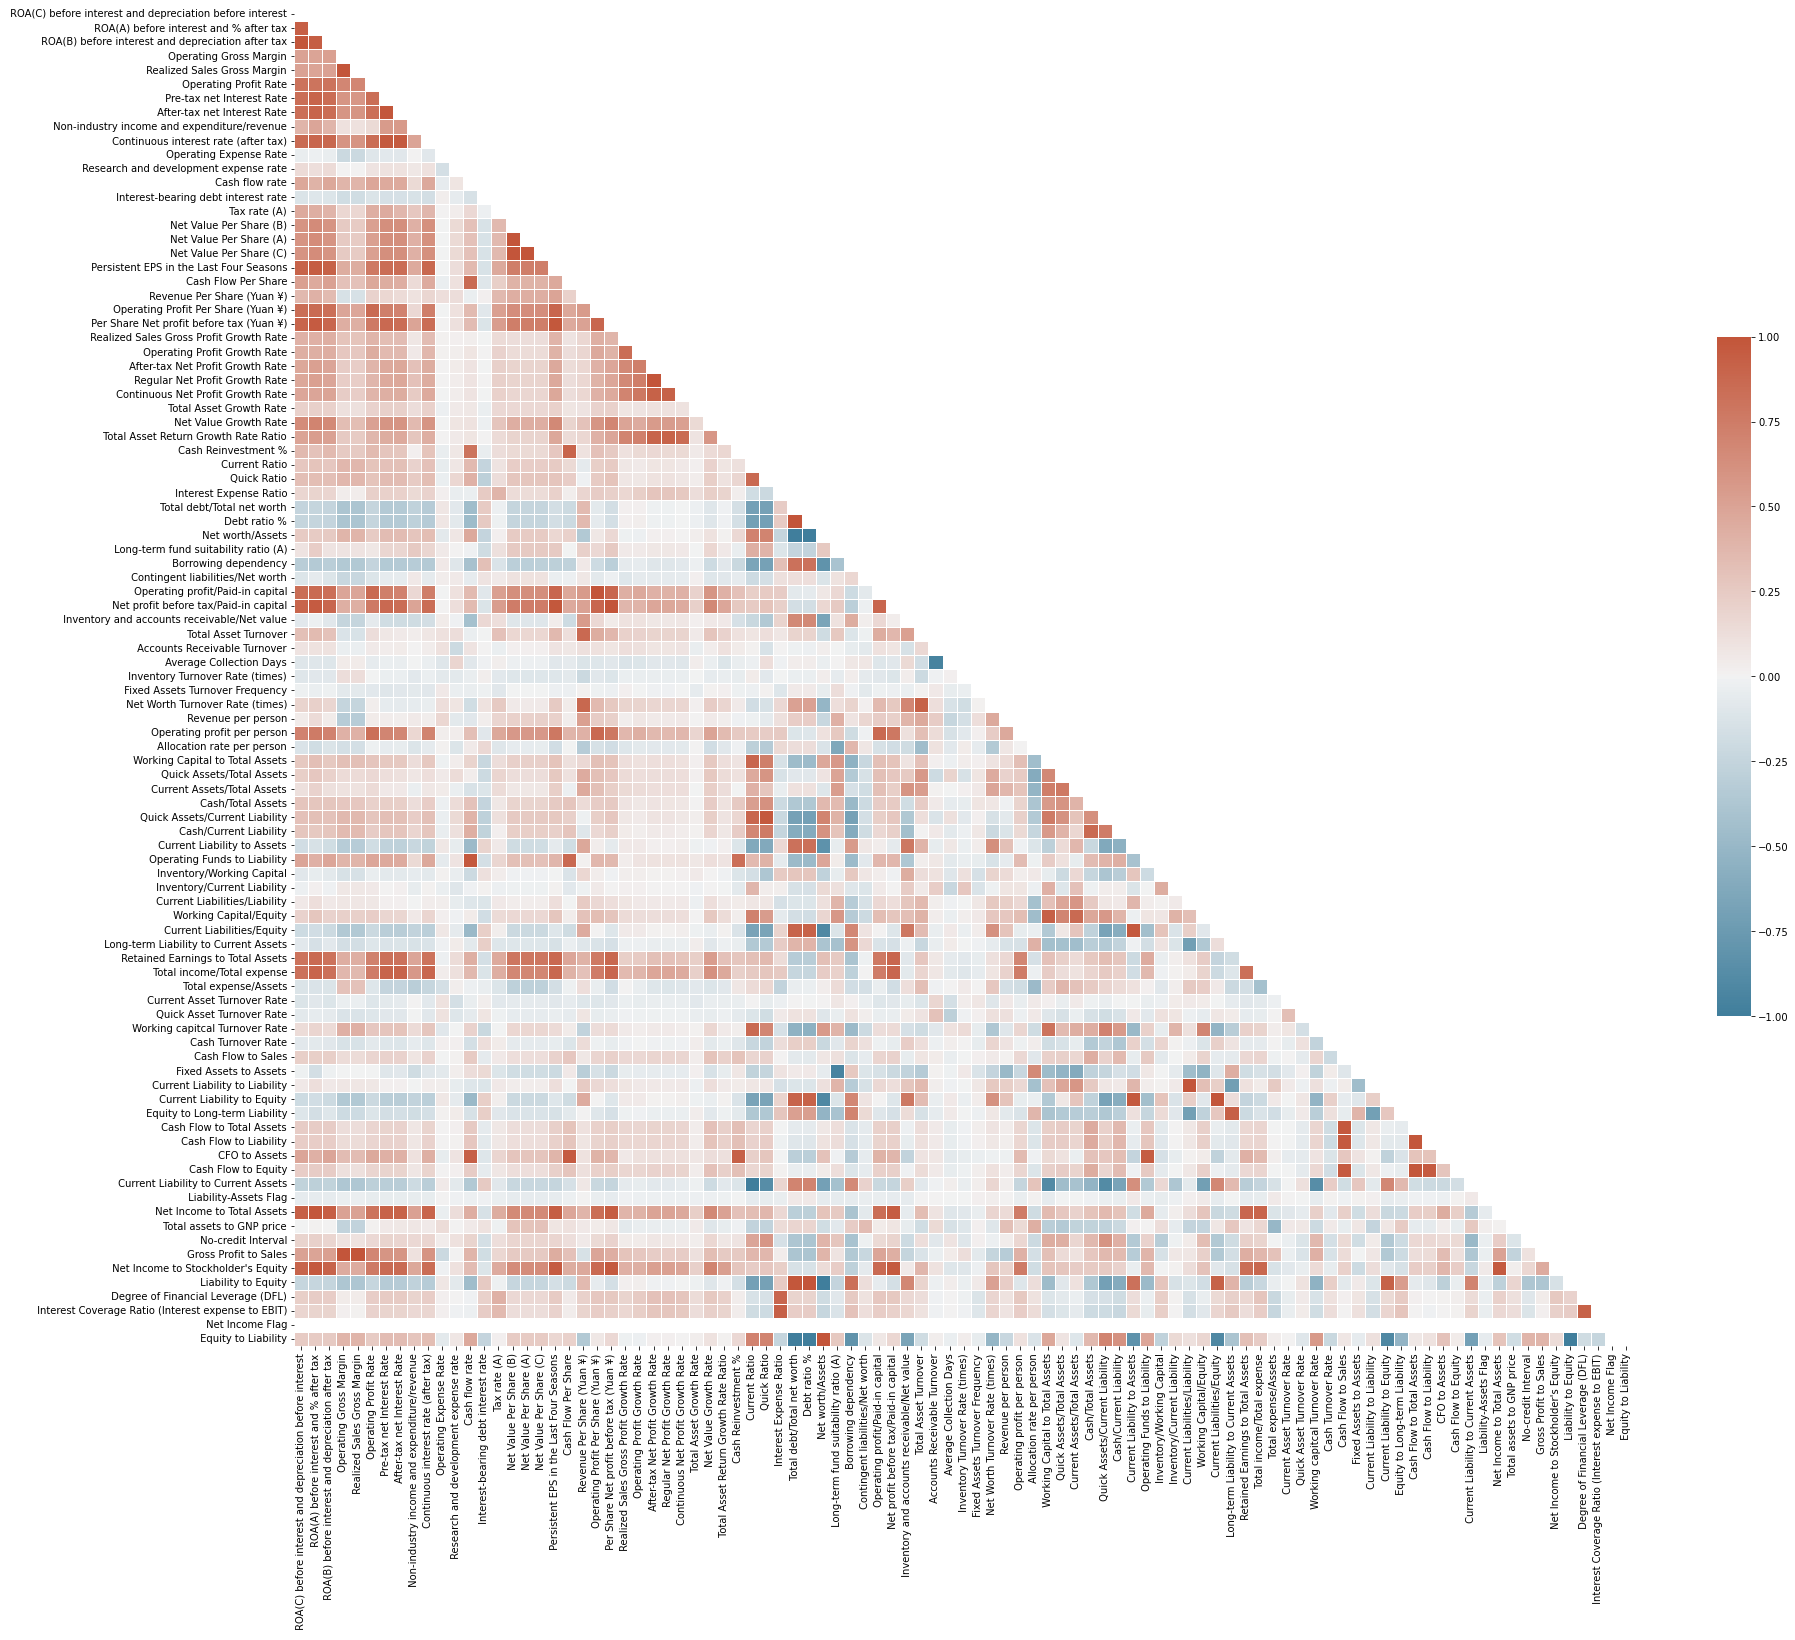

In [9]:
f, ax = plt.subplots(figsize=(30, 25))
mat = EV.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [10]:
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

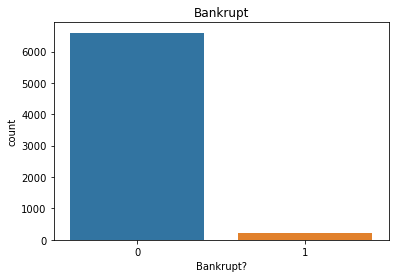

In [11]:
sns.countplot(data['Bankrupt?'])
plt.title('Bankrupt')
plt.show()

# Original Dataset -The dataset without feature selection and resampling

In [12]:
X0=data.drop(labels=['Bankrupt?'], axis=1)
y0=data['Bankrupt?']

### Standardization

In [13]:
sc0=StandardScaler()
scaler0 = sc0.fit(X0)
X0_scaled = scaler0.transform(X0)

In [14]:
standard_XO=pd.DataFrame(X0_scaled)

In [15]:
X0.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

In [16]:
standard_XO.columns=[' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Revenue per person',
       ' Operating profit per person', ' Allocation rate per person',
       ' Working Capital to Total Assets', ' Quick Assets/Total Assets',
       ' Current Assets/Total Assets', ' Cash/Total Assets',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Current Liability to Assets', ' Operating Funds to Liability',
       ' Inventory/Working Capital', ' Inventory/Current Liability',
       ' Current Liabilities/Liability', ' Working Capital/Equity',
       ' Current Liabilities/Equity', ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Total expense/Assets', ' Current Asset Turnover Rate',
       ' Quick Asset Turnover Rate', ' Working capitcal Turnover Rate',
       ' Cash Turnover Rate', ' Cash Flow to Sales', ' Fixed Assets to Assets',
       ' Current Liability to Liability', ' Current Liability to Equity',
       ' Equity to Long-term Liability', ' Cash Flow to Total Assets',
       ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity',
       ' Current Liability to Current Assets', ' Liability-Assets Flag',
       ' Net Income to Total Assets', ' Total assets to GNP price',
       ' No-credit Interval', ' Gross Profit to Sales',
       ' Net Income to Stockholders Equity', ' Liability to Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Net Income Flag', ' Equity to Liability']

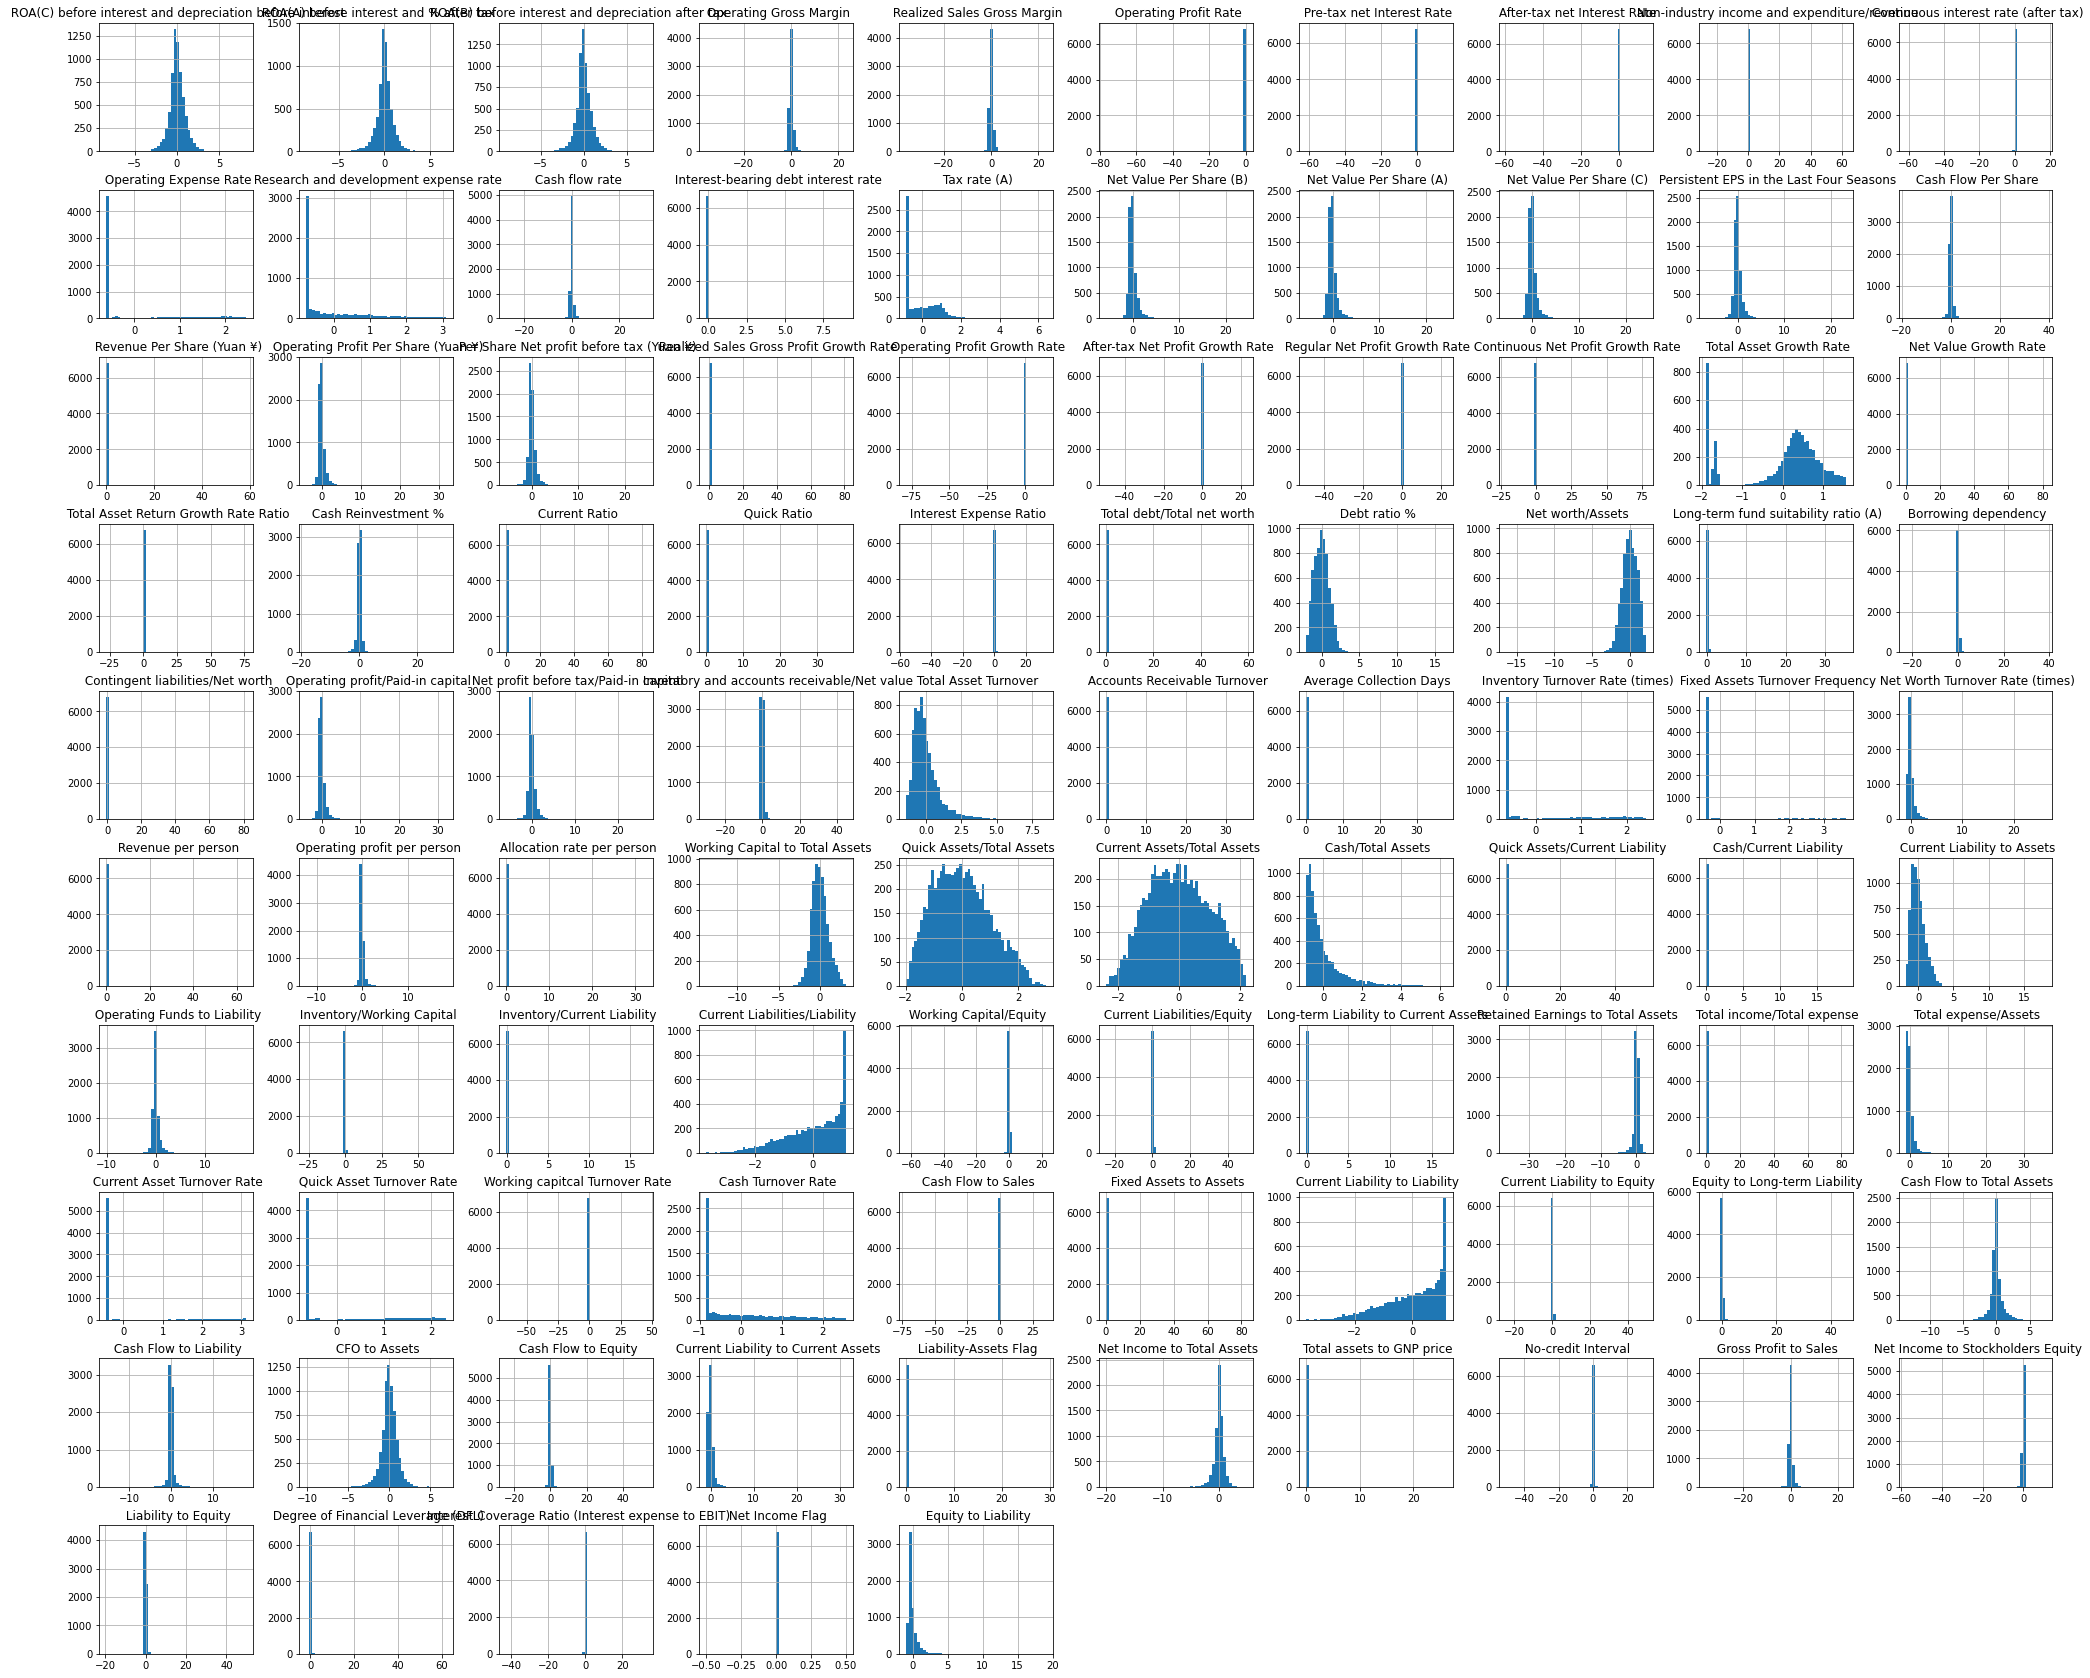

In [17]:
standard_XO.hist(figsize = (35,30), bins = 50)
plt.show()

### Logistic Regression 

In [18]:
default_seed = 1

X0_LR = X0_scaled
y0_LR= y0

X0_train_LR, X0_test_LR, y0_train_LR, y0_test_LR = train_test_split(X0_LR, y0_LR, test_size=0.4,
                                                                  random_state=default_seed) 

model0_LR = LogisticRegression()
model0_LR.fit(X0_train_LR, y0_train_LR)
y0_pred_LR=model0_LR.predict(X0_test_LR)

r0_LR = classification_report(y0_test_LR, y0_pred_LR, output_dict=True) 
acc0_LR= r0_LR['accuracy']
weight0_precision_LR = r0_LR['weighted avg']['precision'] 
weight0_recall_LR = r0_LR['weighted avg']['recall'] 
weight0_f1_LR = r0_LR['weighted avg']['f1-score']
weight0_support_LR = r0_LR['weighted avg']['support']

roc0_LR=roc_auc_score(y0_test_LR, y0_pred_LR)
fpr0_LR,tps0_LR,thresold0_LR = roc_curve(y0_test_LR, y0_pred_LR)
gmean0_LR=geometric_mean_score(y0_test_LR, y0_pred_LR,average='weighted')

LR0={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Logistic Regression':[acc0_LR,weight0_precision_LR,weight0_recall_LR,weight0_f1_LR,weight0_support_LR]}

lr0=pd.DataFrame(LR0)
lr0=lr0.append({'':'AUC', 'Logistic Regression':roc0_LR}, ignore_index=True)
lr0=lr0.append({'':'G-Mean', 'Logistic Regression':gmean0_LR}, ignore_index=True)
lr0=lr0.set_index('')
lr0

,Logistic Regression
,
Accuracy,0.963343
Precision,0.952152
Recall,0.963343
F1-Score,0.956191
Support,2728.000000
AUC,0.577867
G-Mean,0.430509


### Support Vector Machine

In [19]:
default_seed = 1

X0_SVM = X0_scaled
y0_SVM= y0

X0_train_SVM, X0_test_SVM, y0_train_SVM, y0_test_SVM = train_test_split(X0_SVM, y0_SVM, test_size=0.4,
                                                                  random_state=default_seed) 

model0_SVM = svm.SVC(kernel='linear', C=100,gamma='scale')  
model0_SVM.fit(X0_train_SVM, y0_train_SVM)
y0_pred_SVM=model0_SVM.predict(X0_test_SVM)

r0_SVM = classification_report(y0_test_SVM, y0_pred_SVM, output_dict=True) 
acc0_SVM= r0_SVM['accuracy']
weight0_precision_SVM = r0_SVM['weighted avg']['precision'] 
weight0_recall_SVM = r0_SVM['weighted avg']['recall'] 
weight0_f1_SVM = r0_SVM['weighted avg']['f1-score']
weight0_support_SVM = r0_SVM['weighted avg']['support']

roc0_SVM=roc_auc_score(y0_test_SVM, y0_pred_SVM)
fpr0_SVM,tps0_SVM,thresold0_SVM = roc_curve(y0_test_SVM, y0_pred_SVM)
gmean0_SVM=geometric_mean_score(y0_test_SVM, y0_pred_SVM,average='weighted')

SVM0={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Support Vector Machine':[acc0_SVM,weight0_precision_SVM,weight0_recall_SVM,weight0_f1_SVM,weight0_support_SVM]}

svm0=pd.DataFrame(SVM0)
svm0=svm0.append({'':'AUC', 'Support Vector Machine':roc0_SVM}, ignore_index=True)
svm0=svm0.append({'':'G-Mean', 'Support Vector Machine':gmean0_SVM}, ignore_index=True)
svm0=svm0.set_index('')
svm0

,Support Vector Machine
,
Accuracy,0.965543
Precision,0.951657
Recall,0.965543
F1-Score,0.955000
Support,2728.000000
AUC,0.547175
G-Mean,0.352661


### Random Forest

In [20]:
default_seed = 1

X0_RF = X0_scaled
y0_RF= y0

X0_train_RF, X0_test_RF, y0_train_RF, y0_test_RF = train_test_split(X0_RF, y0_RF, test_size=0.4,
                                                                  random_state=default_seed) 

model0_RF = RandomForestClassifier(random_state=default_seed)
model0_RF.fit(X0_train_RF, y0_train_RF)
predictions0 = model0_RF.predict_proba(X0_test_RF)[:,1]
y0_pred_RF=model0_RF.predict(X0_test_RF)

r0_RF = classification_report(y0_test_RF, y0_pred_RF, output_dict=True) 
acc0_RF= r0_RF['accuracy']
weight0_precision_RF = r0_RF['weighted avg']['precision'] 
weight0_recall_RF = r0_RF['weighted avg']['recall'] 
weight0_f1_RF = r0_RF['weighted avg']['f1-score']
weight0_support_RF = r0_RF['weighted avg']['support']

roc0_RF=roc_auc_score(y0_test_RF, y0_pred_RF)
fpr0_RF,tps0_RF,thresold0_RF = roc_curve(y0_test_RF, y0_pred_RF)
gmean0_RF=geometric_mean_score(y0_test_RF, y0_pred_RF,average='weighted')

RF0={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Random Forest':[acc0_RF,weight0_precision_RF,weight0_recall_RF,weight0_f1_RF,weight0_support_RF]}

rf0=pd.DataFrame(RF0)
rf0=rf0.append({'':'AUC', 'Random Forest':roc0_RF}, ignore_index=True)
rf0=rf0.append({'':'G-Mean', 'Random Forest':gmean0_RF}, ignore_index=True)
rf0=rf0.set_index('')
rf0

,Random Forest
,
Accuracy,0.967375
Precision,0.957562
Recall,0.967375
F1-Score,0.959338
Support,2728.000000
AUC,0.585258
G-Mean,0.443297


### KNN

In [21]:
default_seed = 1

X0_KNN = X0_scaled
y0_KNN = y0

X0_train_KNN, X0_test_KNN, y0_train_KNN, y0_test_KNN = train_test_split(X0_KNN, y0_KNN, test_size=0.4,
                                                                  random_state=default_seed) 


model0_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model0_KNN.fit(X0_train_KNN, y0_train_KNN)
y0_pred_KNN=model0_KNN.predict(X0_test_KNN)

r0_KNN = classification_report(y0_test_KNN, y0_pred_KNN, output_dict=True) 
acc0_KNN= r0_KNN['accuracy']
weight0_precision_KNN = r0_KNN['weighted avg']['precision'] 
weight0_recall_KNN = r0_KNN['weighted avg']['recall'] 
weight0_f1_KNN = r0_KNN['weighted avg']['f1-score']
weight0_support_KNN = r0_KNN['weighted avg']['support']

roc0_KNN=roc_auc_score(y0_test_KNN, y0_pred_KNN)
fpr0_KNN,tps0_KNN,thresold0_KNN = roc_curve(y0_test_KNN, y0_pred_KNN)
gmean0_KNN=geometric_mean_score(y0_test_KNN, y0_pred_KNN,average='weighted')

KNN0={'':['Accuracy','Precision','Recall','F1-Score','Support'],'KNN':[acc0_KNN,weight0_precision_KNN,weight0_recall_KNN,weight0_f1_KNN,weight0_support_KNN]}

knn0=pd.DataFrame(KNN0)
knn0=knn0.append({'':'AUC', 'KNN':roc0_KNN}, ignore_index=True)
knn0=knn0.append({'':'G-Mean', 'KNN':gmean0_KNN}, ignore_index=True)
knn0=knn0.set_index('')
knn0

,KNN
,
Accuracy,0.966276
Precision,0.953603
Recall,0.966276
F1-Score,0.955958
Support,2728.000000
AUC,0.552859
G-Mean,0.367070


### Naive Bayes

In [22]:
default_seed = 1

X0_NB = X0_scaled
y0_NB = y0

X0_train_NB, X0_test_NB, y0_train_NB, y0_test_NB = train_test_split(X0_NB, y0_NB, test_size=0.4,
                                                                  random_state=default_seed) 

model0_NB = GaussianNB()
model0_NB.fit(X0_train_NB, y0_train_NB)
y0_pred_NB=model0_NB.predict(X0_test_NB)

r0_NB = classification_report(y0_test_NB, y0_pred_NB, output_dict=True) 
acc0_NB= r0_NB['accuracy']
weight0_precision_NB = r0_NB['weighted avg']['precision'] 
weight0_recall_NB = r0_NB['weighted avg']['recall'] 
weight0_f1_NB = r0_NB['weighted avg']['f1-score']
weight0_support_NB = r0_NB['weighted avg']['support']

roc0_NB=roc_auc_score(y0_test_NB, y0_pred_NB)
fpr0_NB,tps0_NB,thresold0_NB = roc_curve(y0_test_NB, y0_pred_NB)
gmean0_NB=geometric_mean_score(y0_test_NB, y0_pred_NB,average='weighted')

NB0={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Naive Bayes':[acc0_NB,weight0_precision_NB,weight0_recall_NB,weight0_f1_NB,weight0_support_NB]}

nb0=pd.DataFrame(NB0)
nb0=nb0.append({'':'AUC', 'Naive Bayes':roc0_NB}, ignore_index=True)
nb0=nb0.append({'':'G-Mean', 'Naive Bayes':gmean0_NB}, ignore_index=True)
nb0=nb0.set_index('')
nb0

,Naive Bayes
,
Accuracy,0.577346
Precision,0.963081
Recall,0.577346
F1-Score,0.701519
Support,2728.000000
AUC,0.733636
G-Mean,0.716795


### Decision Tree

In [23]:
default_seed = 1

X0_DT = X0_scaled
y0_DT = y0

X0_train_DT, X0_test_DT, y0_train_DT, y0_test_DT = train_test_split(X0_DT, y0_DT, test_size=0.4,
                                                                  random_state=default_seed) 

model0_DT=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model0_DT.fit(X0_train_DT, y0_train_DT)
y0_pred_DT=model0_DT.predict(X0_test_DT)

r0_DT = classification_report(y0_test_DT, y0_pred_DT, output_dict=True) 
acc0_DT= r0_DT['accuracy']
weight0_precision_DT = r0_DT['weighted avg']['precision'] 
weight0_recall_DT = r0_DT['weighted avg']['recall'] 
weight0_f1_DT = r0_DT['weighted avg']['f1-score']
weight0_support_DT = r0_DT['weighted avg']['support']

roc0_DT=roc_auc_score(y0_test_DT, y0_pred_DT)
fpr0_DT,tps0_DT,thresold0_DT = roc_curve(y0_test_DT, y0_pred_DT)
gmean0_DT=geometric_mean_score(y0_test_DT, y0_pred_DT,average='weighted')

DT0={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Decision Tree':[acc0_DT,weight0_precision_DT,weight0_recall_DT,weight0_f1_DT,weight0_support_DT]}

dt0=pd.DataFrame(DT0)
dt0=dt0.append({'':'AUC', 'Decision Tree':roc0_DT}, ignore_index=True)
dt0=dt0.append({'':'G-Mean', 'Decision Tree':gmean0_DT}, ignore_index=True)
dt0=dt0.set_index('')
dt0

,Decision Tree
,
Accuracy,0.952346
Precision,0.951837
Recall,0.952346
F1-Score,0.952090
Support,2728.000000
AUC,0.625228
G-Mean,0.532826


### XGBoost

In [24]:
default_seed = 1

X0_XGB = X0_scaled
y0_XGB = y0

X0_train_XGB, X0_test_XGB, y0_train_XGB, y0_test_XGB = train_test_split(X0_XGB, y0_XGB, test_size=0.4,
                                                                  random_state=default_seed) 


model0_XGB = XGBClassifier()
model0_XGB.fit(X0_train_XGB, y0_train_XGB)
y0_pred_XGB=model0_XGB.predict(X0_test_XGB)

r0_XGB = classification_report(y0_test_XGB, y0_pred_XGB, output_dict=True) 
acc0_XGB= r0_XGB['accuracy']
weight0_precision_XGB = r0_XGB['weighted avg']['precision'] 
weight0_recall_XGB = r0_XGB['weighted avg']['recall'] 
weight0_f1_XGB = r0_XGB['weighted avg']['f1-score']
weight0_support_XGB = r0_XGB['weighted avg']['support']

roc0_XGB=roc_auc_score(y0_test_XGB, y0_pred_XGB)
fpr0_XGB,tps0_XGB,thresold0_XGB = roc_curve(y0_test_XGB, y0_pred_XGB)
gmean0_XGB=geometric_mean_score(y0_test_XGB, y0_pred_XGB,average='weighted')

XGB0={'':['Accuracy','Precision','Recall','F1-Score','Support'],'XGBoost':[acc0_XGB,weight0_precision_XGB,weight0_recall_XGB,weight0_f1_XGB,weight0_support_XGB]}

xgb0=pd.DataFrame(XGB0)
xgb0=xgb0.append({'':'AUC', 'XGBoost':roc0_XGB}, ignore_index=True)
xgb0=xgb0.append({'':'G-Mean', 'XGBoost':gmean0_XGB}, ignore_index=True)
xgb0=xgb0.set_index('')
xgb0

,XGBoost
,
Accuracy,0.966642
Precision,0.957789
Recall,0.966642
F1-Score,0.960309
Support,2728.000000
AUC,0.606098
G-Mean,0.487199


### Conclusion

In [25]:
Conclusion0= pd.concat([lr0,svm0,rf0,knn0,nb0,dt0,xgb0], axis=1)
Conclusion0= Conclusion0.transpose()
Conclusion0.index.name = 'Original Dataset'
Conclusion0

,Accuracy,Precision,Recall,F1-Score,Support,AUC,G-Mean
Original Dataset,,,,,,,
Logistic Regression,0.963343,0.952152,0.963343,0.956191,2728.0,0.577867,0.430509
Support Vector Machine,0.965543,0.951657,0.965543,0.955000,2728.0,0.547175,0.352661
Random Forest,0.967375,0.957562,0.967375,0.959338,2728.0,0.585258,0.443297
KNN,0.966276,0.953603,0.966276,0.955958,2728.0,0.552859,0.367070
Naive Bayes,0.577346,0.963081,0.577346,0.701519,2728.0,0.733636,0.716795
Decision Tree,0.952346,0.951837,0.952346,0.952090,2728.0,0.625228,0.532826
XGBoost,0.966642,0.957789,0.966642,0.960309,2728.0,0.606098,0.487199


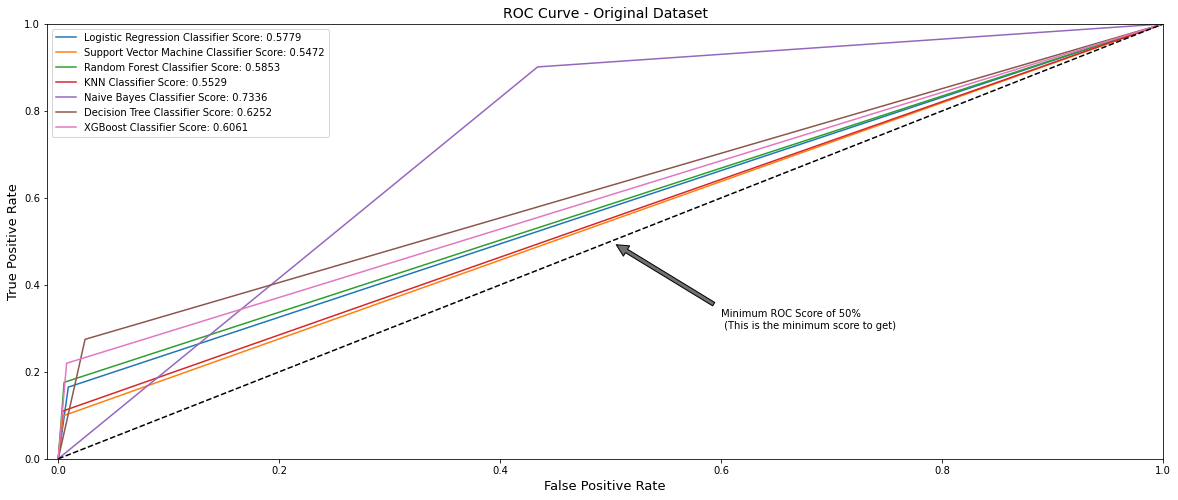

In [26]:
def graph_roc_curve_multiple0(fpr0_LR,tps0_LR,fpr0_SVM,tps0_SVM,fpr0_RF,tps0_RF,fpr0_KNN,tps0_KNN,fpr0_NB,tps0_NB,fpr0_DT,tps0_DT,fpr0_XGB,tps0_XGB):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve - Original Dataset', fontsize=14)
    plt.plot(fpr0_LR,tps0_LR, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y0_test_LR, y0_pred_LR)))
    plt.plot(fpr0_SVM,tps0_SVM, label='Support Vector Machine Classifier Score: {:.4f}'.format(roc_auc_score(y0_test_SVM, y0_pred_SVM)))
    plt.plot(fpr0_RF,tps0_RF, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y0_test_RF, y0_pred_RF)))
    plt.plot(fpr0_KNN,tps0_KNN, label='KNN Classifier Score: {:.4f}'.format(roc_auc_score(y0_test_KNN, y0_pred_KNN)))
    plt.plot(fpr0_NB,tps0_NB, label='Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y0_test_NB, y0_pred_NB)))
    plt.plot(fpr0_DT,tps0_DT, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y0_test_DT, y0_pred_DT)))
    plt.plot(fpr0_XGB,tps0_XGB, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y0_test_XGB, y0_pred_XGB)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple0(fpr0_LR,tps0_LR,fpr0_SVM,tps0_SVM,fpr0_RF,tps0_RF,fpr0_KNN,tps0_KNN,fpr0_NB,tps0_NB,fpr0_DT,tps0_DT,fpr0_XGB,tps0_XGB)
plt.show()

# The dataset with resampling but no feature selection

## Random Undersampling

In [27]:
X1=data.drop(labels=['Bankrupt?'], axis=1)
y1=data['Bankrupt?']

In [28]:
rus = RandomUnderSampler(random_state=0)
X1,y1=rus.fit_resample(X1,y1)

In [29]:
X1.shape

(440, 95)

In [30]:
y1.shape

(440,)

In [31]:
y1.value_counts()

0    220
1    220
Name: Bankrupt?, dtype: int64

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

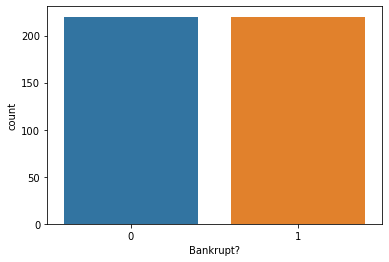

In [32]:
sns.countplot(y1)

### Standardization

In [33]:
sc1=StandardScaler()
scaler1 = sc1.fit(X1)
X1_scaled = scaler1.transform(X1)

### Logistic Regression

In [34]:
default_seed = 1

X1_LR = X1_scaled
y1_LR= y1

X1_train_LR, X1_test_LR, y1_train_LR, y1_test_LR = train_test_split(X1_LR, y1_LR, test_size=0.4,
                                                                  random_state=default_seed) 


model1_LR = LogisticRegression()
model1_LR.fit(X1_train_LR, y1_train_LR)
y1_pred_LR=model1_LR.predict(X1_test_LR)

r1_LR = classification_report(y1_test_LR, y1_pred_LR, output_dict=True) 
acc1_LR= r1_LR['accuracy']
weight1_precision_LR = r1_LR['weighted avg']['precision'] 
weight1_recall_LR = r1_LR['weighted avg']['recall'] 
weight1_f1_LR = r1_LR['weighted avg']['f1-score']
weight1_support_LR = r1_LR['weighted avg']['support']

roc1_LR=roc_auc_score(y1_test_LR, y1_pred_LR)
fpr1_LR,tps1_LR,thresold1_LR = roc_curve(y1_test_LR, y1_pred_LR)
gmean1_LR=geometric_mean_score(y1_test_LR, y1_pred_LR,average='weighted')

LR1={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Logistic Regression':[acc1_LR,weight1_precision_LR,weight1_recall_LR,weight1_f1_LR,weight1_support_LR]}

lr1=pd.DataFrame(LR1)
lr1=lr1.append({'':'AUC', 'Logistic Regression':roc1_LR}, ignore_index=True)
lr1=lr1.append({'':'G-Mean', 'Logistic Regression':gmean1_LR}, ignore_index=True)
lr1=lr1.set_index('')
lr1

,Logistic Regression
,
Accuracy,0.806818
Precision,0.806877
Recall,0.806818
F1-Score,0.806743
Support,176.000000
AUC,0.806460
G-Mean,0.806460


### Support Vector Machine

In [35]:
default_seed = 1

X1_SVM = X1_scaled
y1_SVM= y1

X1_train_SVM, X1_test_SVM, y1_train_SVM, y1_test_SVM = train_test_split(X1_SVM, y1_SVM, test_size=0.4,
                                                                  random_state=default_seed) 

model1_SVM = svm.SVC(kernel='linear', C=100,gamma='scale')  
model1_SVM.fit(X1_train_SVM, y1_train_SVM)
y1_pred_SVM=model1_SVM.predict(X1_test_SVM)


r1_SVM = classification_report(y1_test_SVM, y1_pred_SVM, output_dict=True) 
acc1_SVM= r1_SVM['accuracy']
weight1_precision_SVM = r1_SVM['weighted avg']['precision'] 
weight1_recall_SVM = r1_SVM['weighted avg']['recall'] 
weight1_f1_SVM = r1_SVM['weighted avg']['f1-score']
weight1_support_SVM = r1_SVM['weighted avg']['support']


roc1_SVM=roc_auc_score(y1_test_SVM, y1_pred_SVM)
fpr1_SVM,tps1_SVM,thresold1_SVM = roc_curve(y1_test_SVM, y1_pred_SVM)
gmean1_SVM=geometric_mean_score(y1_test_SVM, y1_pred_SVM,average='weighted')

SVM1={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Support Vector Machine':[acc1_SVM,weight1_precision_SVM,weight1_recall_SVM,weight1_f1_SVM,weight1_support_SVM]}

svm1=pd.DataFrame(SVM1)
svm1=svm1.append({'':'AUC', 'Support Vector Machine':roc1_SVM}, ignore_index=True)
svm1=svm1.append({'':'G-Mean', 'Support Vector Machine':gmean1_SVM}, ignore_index=True)
svm1=svm1.set_index('')
svm1

,Support Vector Machine
,
Accuracy,0.732955
Precision,0.736031
Recall,0.732955
F1-Score,0.732566
Support,176.000000
AUC,0.733979
G-Mean,0.733979


### Random Forest

In [36]:
default_seed = 1

X1_RF = X1_scaled
y1_RF= y1

X1_train_RF, X1_test_RF, y1_train_RF, y1_test_RF = train_test_split(X1_RF, y1_RF, test_size=0.4,
                                                                  random_state=default_seed) 

model1_RF = RandomForestClassifier(random_state=default_seed)
model1_RF.fit(X1_train_RF, y1_train_RF)
predictions1 = model1_RF.predict_proba(X1_test_RF)[:,1]
y1_pred_RF=model1_RF.predict(X1_test_RF)


r1_RF = classification_report(y1_test_RF, y1_pred_RF, output_dict=True) 
acc1_RF= r1_RF['accuracy']
weight1_precision_RF = r1_RF['weighted avg']['precision'] 
weight1_recall_RF = r1_RF['weighted avg']['recall'] 
weight1_f1_RF = r1_RF['weighted avg']['f1-score']
weight1_support_RF = r1_RF['weighted avg']['support']


roc1_RF=roc_auc_score(y1_test_RF, y1_pred_RF)
fpr1_RF,tps1_RF,thresold1_RF = roc_curve(y1_test_RF, y1_pred_RF)
gmean1_RF=geometric_mean_score(y1_test_RF, y1_pred_RF,average='weighted')

RF1={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Random Forest':[acc1_RF,weight1_precision_RF,weight1_recall_RF,weight1_f1_RF,weight1_support_RF]}

rf1=pd.DataFrame(RF1)
rf1=rf1.append({'':'AUC', 'Random Forest':roc1_RF}, ignore_index=True)
rf1=rf1.append({'':'G-Mean', 'Random Forest':gmean1_RF}, ignore_index=True)
rf1=rf1.set_index('')
rf1

,Random Forest
,
Accuracy,0.880682
Precision,0.880762
Recall,0.880682
F1-Score,0.880693
Support,176.000000
AUC,0.880749
G-Mean,0.880749


### KNN

In [37]:
default_seed = 1

X1_KNN = X1_scaled
y1_KNN = y1

X1_train_KNN, X1_test_KNN, y1_train_KNN, y1_test_KNN = train_test_split(X1_KNN, y1_KNN, test_size=0.4,
                                                                  random_state=default_seed) 

model1_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model1_KNN.fit(X1_train_KNN, y1_train_KNN)
y1_pred_KNN=model1_KNN.predict(X1_test_KNN)


r1_KNN = classification_report(y1_test_KNN, y1_pred_KNN, output_dict=True) 
acc1_KNN= r1_KNN['accuracy']
weight1_precision_KNN = r1_KNN['weighted avg']['precision'] 
weight1_recall_KNN = r1_KNN['weighted avg']['recall'] 
weight1_f1_KNN = r1_KNN['weighted avg']['f1-score']
weight1_support_KNN = r1_KNN['weighted avg']['support']

roc1_KNN=roc_auc_score(y1_test_KNN, y1_pred_KNN)
fpr1_KNN,tps1_KNN,thresold1_KNN = roc_curve(y1_test_KNN, y1_pred_KNN)
gmean1_KNN=geometric_mean_score(y1_test_KNN, y1_pred_KNN,average='weighted')

KNN1={'':['Accuracy','Precision','Recall','F1-Score','Support'],'KNN':[acc1_KNN,weight1_precision_KNN,weight1_recall_KNN,weight1_f1_KNN,weight1_support_KNN]}

knn1=pd.DataFrame(KNN1)
knn1=knn1.append({'':'AUC', 'KNN':roc1_KNN}, ignore_index=True)
knn1=knn1.append({'':'G-Mean', 'KNN':roc1_KNN}, ignore_index=True)
knn1=knn1.set_index('')
knn1

,KNN
,
Accuracy,0.823864
Precision,0.823951
Recall,0.823864
F1-Score,0.823881
Support,176.000000
AUC,0.823902
G-Mean,0.823902


### Naive Bayes

In [38]:
default_seed = 1

X1_NB = X1_scaled
y1_NB = y1

X1_train_NB, X1_test_NB, y1_train_NB, y1_test_NB = train_test_split(X1_NB, y1_NB, test_size=0.4,
                                                                  random_state=default_seed) 

model1_NB = GaussianNB()
model1_NB.fit(X1_train_NB, y1_train_NB)
y1_pred_NB=model1_NB.predict(X1_test_NB)


r1_NB = classification_report(y1_test_NB, y1_pred_NB, output_dict=True) 
acc1_NB= r1_NB['accuracy']
weight1_precision_NB = r1_NB['weighted avg']['precision'] 
weight1_recall_NB = r1_NB['weighted avg']['recall'] 
weight1_f1_NB = r1_NB['weighted avg']['f1-score']
weight1_support_NB = r1_NB['weighted avg']['support']


roc1_NB=roc_auc_score(y1_test_NB, y1_pred_NB)
fpr1_NB,tps1_NB,thresold1_NB = roc_curve(y1_test_NB, y1_pred_NB)
gmean1_NB=geometric_mean_score(y1_test_NB, y1_pred_NB,average='weighted')

NB1={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Naive Bayes':[acc1_NB,weight1_precision_NB,weight1_recall_NB,weight1_f1_NB,weight1_support_NB]}

nb1=pd.DataFrame(NB1)
nb1=nb1.append({'':'AUC', 'Naive Bayes':roc1_NB}, ignore_index=True)
nb1=nb1.append({'':'G-Mean', 'Naive Bayes':gmean1_NB}, ignore_index=True)
nb1=nb1.set_index('')
nb1

,Naive Bayes
,
Accuracy,0.551136
Precision,0.644962
Recall,0.551136
F1-Score,0.475881
Support,176.000000
AUC,0.559819
G-Mean,0.559752


### Decision Tree

In [39]:
default_seed = 1

X1_DT = X1_scaled
y1_DT = y1

X1_train_DT, X1_test_DT, y1_train_DT, y1_test_DT = train_test_split(X1_DT, y1_DT, test_size=0.4,
                                                                  random_state=default_seed) 

model1_DT=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model1_DT.fit(X1_train_DT, y1_train_DT)
y1_pred_DT=model1_DT.predict(X1_test_DT)


r1_DT = classification_report(y1_test_DT, y1_pred_DT, output_dict=True) 
acc1_DT= r1_DT['accuracy']
weight1_precision_DT = r1_DT['weighted avg']['precision'] 
weight1_recall_DT = r1_DT['weighted avg']['recall'] 
weight1_f1_DT = r1_DT['weighted avg']['f1-score']
weight1_support_DT = r1_DT['weighted avg']['support']


roc1_DT=roc_auc_score(y1_test_DT, y1_pred_DT)
fpr1_DT,tps1_DT,thresold1_DT = roc_curve(y1_test_DT, y1_pred_DT)
gmean1_DT=geometric_mean_score(y1_test_DT, y1_pred_DT,average='weighted')

DT1={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Decision Tree':[acc1_DT,weight1_precision_DT,weight1_recall_DT,weight1_f1_DT,weight1_support_DT]}

dt1=pd.DataFrame(DT1)
dt1=dt1.append({'':'AUC', 'Decision Tree':roc1_DT}, ignore_index=True)
dt1=dt1.append({'':'G-Mean', 'Decision Tree':gmean1_DT}, ignore_index=True)
dt1=dt1.set_index('')
dt1

,Decision Tree
,
Accuracy,0.789773
Precision,0.789756
Recall,0.789773
F1-Score,0.789739
Support,176.000000
AUC,0.789535
G-Mean,0.789535


### XGBoost

In [40]:
default_seed = 1

X1_XGB = X1_scaled
y1_XGB = y1

X1_train_XGB, X1_test_XGB, y1_train_XGB, y1_test_XGB = train_test_split(X1_XGB, y1_XGB, test_size=0.4,
                                                                  random_state=default_seed) 

model1_XGB = XGBClassifier()
model1_XGB.fit(X1_train_XGB, y1_train_XGB)
y1_pred_XGB=model1_XGB.predict(X1_test_XGB)


r1_XGB = classification_report(y1_test_XGB, y1_pred_XGB, output_dict=True) 
acc1_XGB= r1_XGB['accuracy']
weight1_precision_XGB = r1_XGB['weighted avg']['precision'] 
weight1_recall_XGB = r1_XGB['weighted avg']['recall'] 
weight1_f1_XGB = r1_XGB['weighted avg']['f1-score']
weight1_support_XGB = r1_XGB['weighted avg']['support']


roc1_XGB=roc_auc_score(y1_test_XGB, y1_pred_XGB)
fpr1_XGB,tps1_XGB,thresold1_XGB = roc_curve(y1_test_XGB, y1_pred_XGB)
gmean1_XGB=geometric_mean_score(y1_test_XGB, y1_pred_XGB,average='weighted')

XGB1={'':['Accuracy','Precision','Recall','F1-Score','Support'],'XGBoost':[acc1_XGB,weight1_precision_XGB,weight1_recall_XGB,weight1_f1_XGB,weight1_support_XGB]}

xgb1=pd.DataFrame(XGB1)
xgb1=xgb1.append({'':'AUC', 'XGBoost':roc1_XGB}, ignore_index=True)
xgb1=xgb1.append({'':'G-Mean', 'XGBoost':gmean1_XGB}, ignore_index=True)
xgb1=xgb1.set_index('')
xgb1

,XGBoost
,
Accuracy,0.846591
Precision,0.847113
Recall,0.846591
F1-Score,0.846606
Support,176.000000
AUC,0.846899
G-Mean,0.846899


### Conclusion

In [41]:
Conclusion1= pd.concat([lr1,svm1,rf1,knn1,nb1,dt1,xgb1], axis=1)
Conclusion1= Conclusion1.transpose()
Conclusion1.index.name = 'Dataset with undersampling'
Conclusion1

,Accuracy,Precision,Recall,F1-Score,Support,AUC,G-Mean
Dataset with undersampling,,,,,,,
Logistic Regression,0.806818,0.806877,0.806818,0.806743,176.0,0.806460,0.806460
Support Vector Machine,0.732955,0.736031,0.732955,0.732566,176.0,0.733979,0.733979
Random Forest,0.880682,0.880762,0.880682,0.880693,176.0,0.880749,0.880749
KNN,0.823864,0.823951,0.823864,0.823881,176.0,0.823902,0.823902
Naive Bayes,0.551136,0.644962,0.551136,0.475881,176.0,0.559819,0.559752
Decision Tree,0.789773,0.789756,0.789773,0.789739,176.0,0.789535,0.789535
XGBoost,0.846591,0.847113,0.846591,0.846606,176.0,0.846899,0.846899


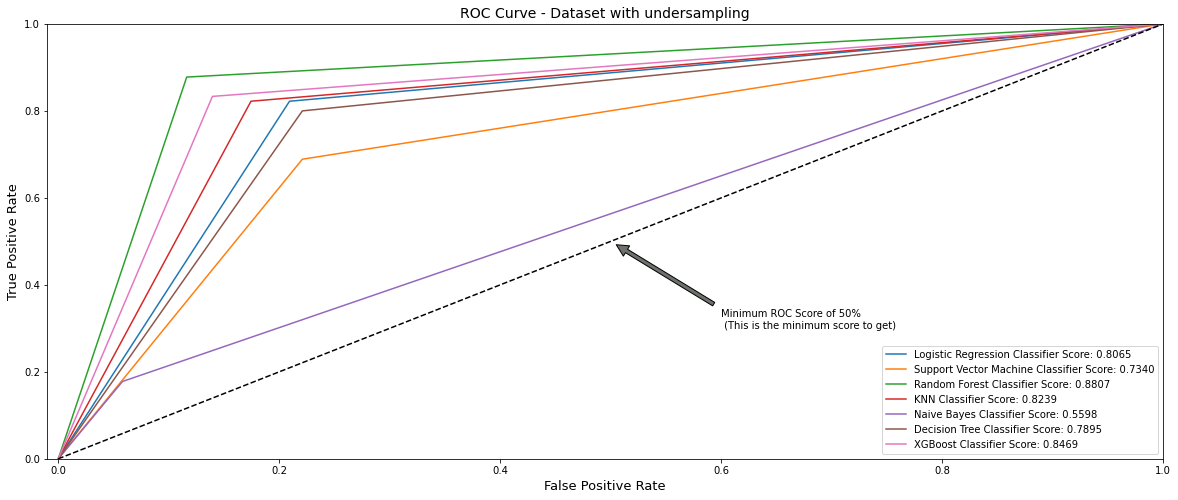

In [42]:
def graph_roc_curve_multiple1(fpr1_LR,tps1_LR,fpr1_SVM,tps1_SVM,fpr1_RF,tps1_RF,fpr1_KNN,tps1_KNN,fpr1_NB,tps1_NB,fpr1_DT,tps1_DT,fpr1_XGB,tps1_XGB):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve - Dataset with undersampling', fontsize=14)
    plt.plot(fpr1_LR,tps1_LR, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y1_test_LR, y1_pred_LR)))
    plt.plot(fpr1_SVM,tps1_SVM, label='Support Vector Machine Classifier Score: {:.4f}'.format(roc_auc_score(y1_test_SVM, y1_pred_SVM)))
    plt.plot(fpr1_RF,tps1_RF, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y1_test_RF, y1_pred_RF)))
    plt.plot(fpr1_KNN,tps1_KNN, label='KNN Classifier Score: {:.4f}'.format(roc_auc_score(y1_test_KNN, y1_pred_KNN)))
    plt.plot(fpr1_NB,tps1_NB, label='Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y1_test_NB, y1_pred_NB)))
    plt.plot(fpr1_DT,tps1_DT, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y1_test_DT, y1_pred_DT)))
    plt.plot(fpr1_XGB,tps1_XGB, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y1_test_XGB, y1_pred_XGB)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple1(fpr1_LR,tps1_LR,fpr1_SVM,tps1_SVM,fpr1_RF,tps1_RF,fpr1_KNN,tps1_KNN,fpr1_NB,tps1_NB,fpr1_DT,tps1_DT,fpr1_XGB,tps1_XGB)
plt.show()

## Oversampling SMOTE

In [43]:
X1_1=data.drop(labels=['Bankrupt?'], axis=1)
y1_1=data['Bankrupt?']

In [44]:
oversample = SMOTE()
X1_1,y1_1=oversample.fit_resample(X1_1,y1_1)

In [45]:
X1_1.shape

(13198, 95)

In [46]:
y1_1.shape

(13198,)

In [47]:
y1_1.value_counts()

1    6599
0    6599
Name: Bankrupt?, dtype: int64

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

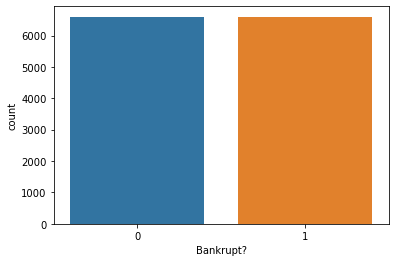

In [48]:
sns.countplot(y1_1)

### Standardization

In [49]:
sc1_1=StandardScaler()
scaler1_1 = sc1_1.fit(X1_1)
X1_1_scaled = scaler1_1.transform(X1_1)

### Logistic Regression

In [50]:
default_seed = 1

X1_1_LR = X1_1_scaled
y1_1_LR= y1_1

X1_1_train_LR, X1_1_test_LR, y1_1_train_LR, y1_1_test_LR = train_test_split(X1_1_LR, y1_1_LR, test_size=0.4,
                                                                  random_state=default_seed) 


model1_1_LR = LogisticRegression()
model1_1_LR.fit(X1_1_train_LR, y1_1_train_LR)
y1_1_pred_LR=model1_1_LR.predict(X1_1_test_LR)

r1_1_LR = classification_report(y1_1_test_LR, y1_1_pred_LR, output_dict=True) 
acc1_1_LR= r1_1_LR['accuracy']
weight1_1_precision_LR = r1_1_LR['weighted avg']['precision'] 
weight1_1_recall_LR = r1_1_LR['weighted avg']['recall'] 
weight1_1_f1_LR = r1_1_LR['weighted avg']['f1-score']
weight1_1_support_LR = r1_1_LR['weighted avg']['support']

roc1_1_LR=roc_auc_score(y1_1_test_LR, y1_1_pred_LR)
fpr1_1_LR,tps1_1_LR,thresold1_1_LR = roc_curve(y1_1_test_LR, y1_1_pred_LR)
gmean1_1_LR=geometric_mean_score(y1_1_test_LR, y1_1_pred_LR,average='weighted')

LR1_1={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Logistic Regression':[acc1_1_LR,weight1_1_precision_LR,weight1_1_recall_LR,weight1_1_f1_LR,weight1_1_support_LR]}

lr1_1=pd.DataFrame(LR1_1)
lr1_1=lr1_1.append({'':'AUC', 'Logistic Regression':roc1_1_LR}, ignore_index=True)
lr1_1=lr1_1.append({'':'G-Mean', 'Logistic Regression':gmean1_1_LR}, ignore_index=True)
lr1_1=lr1_1.set_index('')
lr1_1

,Logistic Regression
,
Accuracy,0.905492
Precision,0.905979
Recall,0.905492
F1-Score,0.905478
Support,5280.000000
AUC,0.905621
G-Mean,0.905621


### Support Vector Machine

In [51]:
default_seed = 1

X1_1_SVM = X1_1_scaled
y1_1_SVM= y1_1

X1_1_train_SVM, X1_1_test_SVM, y1_1_train_SVM, y1_1_test_SVM = train_test_split(X1_1_SVM, y1_1_SVM, test_size=0.4,
                                                                  random_state=default_seed) 

model1_1_SVM = svm.SVC(kernel='linear', C=100,gamma='scale')  
model1_1_SVM.fit(X1_1_train_SVM, y1_1_train_SVM)
y1_1_pred_SVM=model1_1_SVM.predict(X1_1_test_SVM)

r1_1_SVM = classification_report(y1_1_test_SVM, y1_1_pred_SVM, output_dict=True) 
acc1_1_SVM= r1_1_SVM['accuracy']
weight1_1_precision_SVM = r1_1_SVM['weighted avg']['precision'] 
weight1_1_recall_SVM = r1_1_SVM['weighted avg']['recall'] 
weight1_1_f1_SVM = r1_1_SVM['weighted avg']['f1-score']
weight1_1_support_SVM = r1_1_SVM['weighted avg']['support']


roc1_1_SVM=roc_auc_score(y1_1_test_SVM, y1_1_pred_SVM)
fpr1_1_SVM,tps1_1_SVM,thresold1_1_SVM = roc_curve(y1_1_test_SVM, y1_1_pred_SVM)
gmean1_1_SVM=geometric_mean_score(y1_1_test_SVM, y1_1_pred_SVM,average='weighted')

SVM1_1={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Support Vector Machine':[acc1_1_SVM,weight1_1_precision_SVM,weight1_1_recall_SVM,weight1_1_f1_SVM,weight1_1_support_SVM]}

svm1_1=pd.DataFrame(SVM1_1)
svm1_1=svm1_1.append({'':'AUC', 'Support Vector Machine':roc1_1_SVM}, ignore_index=True)
svm1_1=svm1_1.append({'':'G-Mean', 'Support Vector Machine':gmean1_1_SVM}, ignore_index=True)
svm1_1=svm1_1.set_index('')
svm1_1

,Support Vector Machine
,
Accuracy,0.909659
Precision,0.910737
Recall,0.909659
F1-Score,0.909620
Support,5280.000000
AUC,0.909854
G-Mean,0.909854


### Random Forest

In [52]:
default_seed = 1

X1_1_RF = X1_1_scaled
y1_1_RF= y1_1

X1_1_train_RF, X1_1_test_RF, y1_1_train_RF, y1_1_test_RF = train_test_split(X1_1_RF, y1_1_RF, test_size=0.4,
                                                                  random_state=default_seed) 

model1_1_RF = RandomForestClassifier(random_state=default_seed)
model1_1_RF.fit(X1_1_train_RF, y1_1_train_RF)
predictions1_1 = model1_1_RF.predict_proba(X1_1_test_RF)[:,1]
y1_1_pred_RF=model1_1_RF.predict(X1_1_test_RF)


r1_1_RF = classification_report(y1_1_test_RF, y1_1_pred_RF, output_dict=True) 
acc1_1_RF= r1_1_RF['accuracy']
weight1_1_precision_RF = r1_1_RF['weighted avg']['precision'] 
weight1_1_recall_RF = r1_1_RF['weighted avg']['recall'] 
weight1_1_f1_RF = r1_1_RF['weighted avg']['f1-score']
weight1_1_support_RF = r1_1_RF['weighted avg']['support']


roc1_1_RF=roc_auc_score(y1_1_test_RF, y1_1_pred_RF)
fpr1_1_RF,tps1_1_RF,thresold1_1_RF = roc_curve(y1_1_test_RF, y1_1_pred_RF)
gmean1_1_RF=geometric_mean_score(y1_1_test_RF, y1_1_pred_RF,average='weighted')

RF1_1={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Random Forest':[acc1_1_RF,weight1_1_precision_RF,weight1_1_recall_RF,weight1_1_f1_RF,weight1_1_support_RF]}

rf1_1=pd.DataFrame(RF1_1)
rf1_1=rf1_1.append({'':'AUC', 'Random Forest':roc1_1_RF}, ignore_index=True)
rf1_1=rf1_1.append({'':'G-Mean', 'Random Forest':gmean1_1_RF}, ignore_index=True)
rf1_1=rf1_1.set_index('')
rf1_1

,Random Forest
,
Accuracy,0.969318
Precision,0.970236
Recall,0.969318
F1-Score,0.969309
Support,5280.000000
AUC,0.969491
G-Mean,0.969491


### KNN

In [53]:
default_seed = 1

X1_1_KNN = X1_1_scaled
y1_1_KNN = y1_1

X1_1_train_KNN, X1_1_test_KNN, y1_1_train_KNN, y1_1_test_KNN = train_test_split(X1_1_KNN, y1_1_KNN, test_size=0.4,
                                                                  random_state=default_seed) 

model1_1_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model1_1_KNN.fit(X1_1_train_KNN, y1_1_train_KNN)
y1_1_pred_KNN=model1_1_KNN.predict(X1_1_test_KNN)


r1_1_KNN = classification_report(y1_1_test_KNN, y1_1_pred_KNN, output_dict=True) 
acc1_1_KNN= r1_1_KNN['accuracy']
weight1_1_precision_KNN = r1_1_KNN['weighted avg']['precision'] 
weight1_1_recall_KNN = r1_1_KNN['weighted avg']['recall'] 
weight1_1_f1_KNN = r1_1_KNN['weighted avg']['f1-score']
weight1_1_support_KNN = r1_1_KNN['weighted avg']['support']

roc1_1_KNN=roc_auc_score(y1_1_test_KNN, y1_1_pred_KNN)
fpr1_1_KNN,tps1_1_KNN,thresold1_1_KNN = roc_curve(y1_1_test_KNN, y1_1_pred_KNN)
gmean1_1_KNN=geometric_mean_score(y1_1_test_KNN, y1_1_pred_KNN,average='weighted')

KNN1_1={'':['Accuracy','Precision','Recall','F1-Score','Support'],'KNN':[acc1_1_KNN,weight1_1_precision_KNN,weight1_1_recall_KNN,weight1_1_f1_KNN,weight1_1_support_KNN]}

knn1_1=pd.DataFrame(KNN1_1)
knn1_1=knn1_1.append({'':'AUC', 'KNN':roc1_1_KNN}, ignore_index=True)
knn1_1=knn1_1.append({'':'G-Mean', 'KNN':roc1_1_KNN}, ignore_index=True)
knn1_1=knn1_1.set_index('')
knn1_1

,KNN
,
Accuracy,0.933902
Precision,0.941584
Recall,0.933902
F1-Score,0.933650
Support,5280.000000
AUC,0.934420
G-Mean,0.934420


### Naive Bayes

In [54]:
default_seed = 1

X1_1_NB = X1_1_scaled
y1_1_NB = y1_1

X1_1_train_NB, X1_1_test_NB, y1_1_train_NB, y1_1_test_NB = train_test_split(X1_1_NB, y1_1_NB, test_size=0.4,
                                                                  random_state=default_seed) 

model1_1_NB = GaussianNB()
model1_1_NB.fit(X1_1_train_NB, y1_1_train_NB)
y1_1_pred_NB=model1_1_NB.predict(X1_1_test_NB)


r1_1_NB = classification_report(y1_1_test_NB, y1_1_pred_NB, output_dict=True) 
acc1_1_NB= r1_1_NB['accuracy']
weight1_1_precision_NB = r1_1_NB['weighted avg']['precision'] 
weight1_1_recall_NB = r1_1_NB['weighted avg']['recall'] 
weight1_1_f1_NB = r1_1_NB['weighted avg']['f1-score']
weight1_1_support_NB = r1_1_NB['weighted avg']['support']

roc1_1_NB=roc_auc_score(y1_1_test_NB, y1_1_pred_NB)
fpr1_1_NB,tps1_1_NB,thresold1_1_NB = roc_curve(y1_1_test_NB, y1_1_pred_NB)
gmean1_1_NB=geometric_mean_score(y1_1_test_NB, y1_1_pred_NB,average='weighted')

NB1_1={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Naive Bayes':[acc1_1_NB,weight1_1_precision_NB,weight1_1_recall_NB,weight1_1_f1_NB,weight1_1_support_NB]}

nb1_1=pd.DataFrame(NB1_1)
nb1_1=nb1_1.append({'':'AUC', 'Naive Bayes':roc1_1_NB}, ignore_index=True)
nb1_1=nb1_1.append({'':'G-Mean', 'Naive Bayes':gmean1_1_NB}, ignore_index=True)
nb1_1=nb1_1.set_index('')
nb1_1

,Naive Bayes
,
Accuracy,0.690909
Precision,0.773953
Recall,0.690909
F1-Score,0.666614
Support,5280.000000
AUC,0.693071
G-Mean,0.693068


### Decision Tree

In [55]:
default_seed = 1

X1_1_DT = X1_1_scaled
y1_1_DT = y1_1

X1_1_train_DT, X1_1_test_DT, y1_1_train_DT, y1_1_test_DT = train_test_split(X1_1_DT, y1_1_DT, test_size=0.4,
                                                                  random_state=default_seed) 

model1_1_DT=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model1_1_DT.fit(X1_1_train_DT, y1_1_train_DT)
y1_1_pred_DT=model1_1_DT.predict(X1_1_test_DT)


r1_1_DT = classification_report(y1_1_test_DT, y1_1_pred_DT, output_dict=True) 
acc1_1_DT= r1_1_DT['accuracy']
weight1_1_precision_DT = r1_1_DT['weighted avg']['precision'] 
weight1_1_recall_DT = r1_1_DT['weighted avg']['recall'] 
weight1_1_f1_DT = r1_1_DT['weighted avg']['f1-score']
weight1_1_support_DT = r1_1_DT['weighted avg']['support']


roc1_1_DT=roc_auc_score(y1_1_test_DT, y1_1_pred_DT)
fpr1_1_DT,tps1_1_DT,thresold1_1_DT = roc_curve(y1_1_test_DT, y1_1_pred_DT)
gmean1_1_DT=geometric_mean_score(y1_1_test_DT, y1_1_pred_DT,average='weighted')

DT1_1={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Decision Tree':[acc1_1_DT,weight1_1_precision_DT,weight1_1_recall_DT,weight1_1_f1_DT,weight1_1_support_DT]}

dt1_1=pd.DataFrame(DT1_1)
dt1_1=dt1_1.append({'':'AUC', 'Decision Tree':roc1_1_DT}, ignore_index=True)
dt1_1=dt1_1.append({'':'G-Mean', 'Decision Tree':gmean1_1_DT}, ignore_index=True)
dt1_1=dt1_1.set_index('')
dt1_1

,Decision Tree
,
Accuracy,0.951515
Precision,0.952232
Recall,0.951515
F1-Score,0.951504
Support,5280.000000
AUC,0.951669
G-Mean,0.951669


### XGBoost

In [56]:
default_seed = 1

X1_1_XGB = X1_1_scaled
y1_1_XGB = y1_1

X1_1_train_XGB, X1_1_test_XGB, y1_1_train_XGB, y1_1_test_XGB = train_test_split(X1_1_XGB, y1_1_XGB, test_size=0.4,
                                                                  random_state=default_seed) 

model1_1_XGB = XGBClassifier()
model1_1_XGB.fit(X1_1_train_XGB, y1_1_train_XGB)
y1_1_pred_XGB=model1_1_XGB.predict(X1_1_test_XGB)


r1_1_XGB = classification_report(y1_1_test_XGB, y1_1_pred_XGB, output_dict=True) 
acc1_1_XGB= r1_1_XGB['accuracy']
weight1_1_precision_XGB = r1_1_XGB['weighted avg']['precision'] 
weight1_1_recall_XGB = r1_1_XGB['weighted avg']['recall'] 
weight1_1_f1_XGB = r1_1_XGB['weighted avg']['f1-score']
weight1_1_support_XGB = r1_1_XGB['weighted avg']['support']


roc1_1_XGB=roc_auc_score(y1_1_test_XGB, y1_1_pred_XGB)
fpr1_1_XGB,tps1_1_XGB,thresold1_1_XGB = roc_curve(y1_1_test_XGB, y1_1_pred_XGB)
gmean1_1_XGB=geometric_mean_score(y1_1_test_XGB, y1_1_pred_XGB,average='weighted')

XGB1_1={'':['Accuracy','Precision','Recall','F1-Score','Support'],'XGBoost':[acc1_1_XGB,weight1_1_precision_XGB,weight1_1_recall_XGB,weight1_1_f1_XGB,weight1_1_support_XGB]}

xgb1_1=pd.DataFrame(XGB1_1)
xgb1_1=xgb1_1.append({'':'AUC', 'XGBoost':roc1_1_XGB}, ignore_index=True)
xgb1_1=xgb1_1.append({'':'G-Mean', 'XGBoost':gmean1_1_XGB}, ignore_index=True)
xgb1_1=xgb1_1.set_index('')
xgb1_1

,XGBoost
,
Accuracy,0.980682
Precision,0.981221
Recall,0.980682
F1-Score,0.980679
Support,5280.000000
AUC,0.980813
G-Mean,0.980813


### Conclusion

In [57]:
Conclusion1_1= pd.concat([lr1_1,svm1_1,rf1_1,knn1_1,nb1_1,dt1_1,xgb1_1], axis=1)
Conclusion1_1= Conclusion1_1.transpose()
Conclusion1_1.index.name = 'Dataset with oversampling'
Conclusion1_1

,Accuracy,Precision,Recall,F1-Score,Support,AUC,G-Mean
Dataset with oversampling,,,,,,,
Logistic Regression,0.905492,0.905979,0.905492,0.905478,5280.0,0.905621,0.905621
Support Vector Machine,0.909659,0.910737,0.909659,0.909620,5280.0,0.909854,0.909854
Random Forest,0.969318,0.970236,0.969318,0.969309,5280.0,0.969491,0.969491
KNN,0.933902,0.941584,0.933902,0.933650,5280.0,0.934420,0.934420
Naive Bayes,0.690909,0.773953,0.690909,0.666614,5280.0,0.693071,0.693068
Decision Tree,0.951515,0.952232,0.951515,0.951504,5280.0,0.951669,0.951669
XGBoost,0.980682,0.981221,0.980682,0.980679,5280.0,0.980813,0.980813


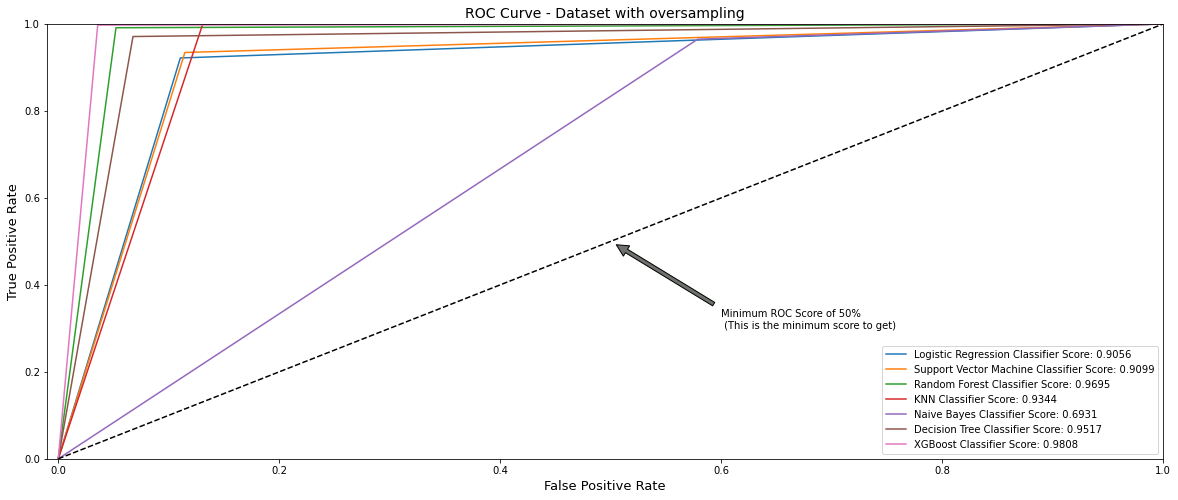

In [58]:
def graph_roc_curve_multiple1_1(fpr1_1_LR,tps1_1_LR,fpr1_1_SVM,tps1_1_SVM,fpr1_1_RF,tps1_1_RF,fpr1_1_KNN,tps1_1_KNN,fpr1_1_NB,tps1_1_NB,fpr1_1_DT,tps1_1_DT,fpr1_1_XGB,tps1_1_XGB):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve - Dataset with oversampling', fontsize=14)
    plt.plot(fpr1_1_LR,tps1_1_LR, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y1_1_test_LR, y1_1_pred_LR)))
    plt.plot(fpr1_1_SVM,tps1_1_SVM, label='Support Vector Machine Classifier Score: {:.4f}'.format(roc_auc_score(y1_1_test_SVM, y1_1_pred_SVM)))
    plt.plot(fpr1_1_RF,tps1_1_RF, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y1_1_test_RF, y1_1_pred_RF)))
    plt.plot(fpr1_1_KNN,tps1_1_KNN, label='KNN Classifier Score: {:.4f}'.format(roc_auc_score(y1_1_test_KNN, y1_1_pred_KNN)))
    plt.plot(fpr1_1_NB,tps1_1_NB, label='Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y1_1_test_NB, y1_1_pred_NB)))
    plt.plot(fpr1_1_DT,tps1_1_DT, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y1_1_test_DT, y1_1_pred_DT)))
    plt.plot(fpr1_1_XGB,tps1_1_XGB, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y1_1_test_XGB, y1_1_pred_XGB)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple1_1(fpr1_1_LR,tps1_1_LR,fpr1_1_SVM,tps1_1_SVM,fpr1_1_RF,tps1_1_RF,fpr1_1_KNN,tps1_1_KNN,fpr1_1_NB,tps1_1_NB,fpr1_1_DT,tps1_1_DT,fpr1_1_XGB,tps1_1_XGB)
plt.show()

# Features Selection

In [59]:
X=data.drop(labels=['Bankrupt?'], axis=1)
y=data['Bankrupt?']

In [60]:
# Set RandomForestClassifier as estimator for RFECV
cart = RandomForestClassifier(random_state=42)

# Minimum number of features to consider
min_features_to_select = 1  

# Set number of folds
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1) 

# Set cross-validation process
rfecv = RFECV(estimator=cart, step=1, cv=cv,
              scoring='accuracy',
              min_features_to_select=min_features_to_select, n_jobs=1)

# Fit the model
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 41


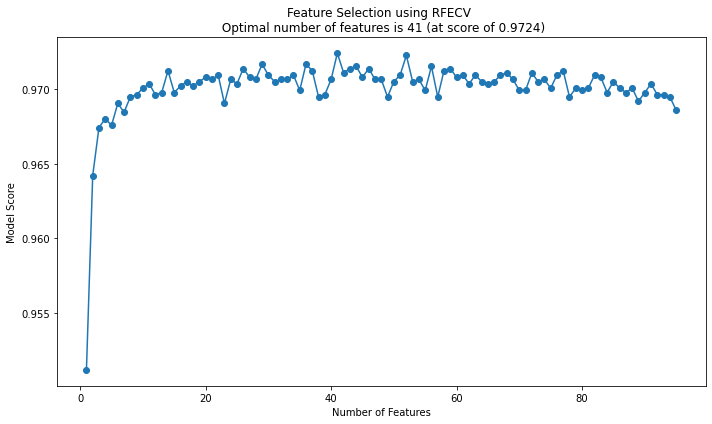

In [61]:
plt.rcParams["figure.figsize"] = (10,6)
plt.figure()
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFECV \n Optimal number of features is {rfecv.n_features_} (at score of {round(max(rfecv.cv_results_['mean_test_score']),4)})")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker = "o")
plt.tight_layout()
plt.show()

In [62]:
# Display features' names
most_relevent_cols = data.iloc[:, 1:].columns[np.where(rfecv.support_ == True)]
print("Most relevant features are: ")
print(most_relevent_cols)

Most relevant features are: 
Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(B) before interest and depreciation after tax',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
       ' Net Value Per Share (A)', ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Quick Ratio',
       ' Interest Expense Ratio', ' Total debt/Total net worth',
       ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Revenue per person', ' Operating profit pe

In [63]:
# Append target
most_relevent_cols = list(most_relevent_cols)
most_relevent_cols

[' ROA(C) before interest and depreciation before interest',
 ' ROA(B) before interest and depreciation after tax',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Interest-bearing debt interest rate',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Net Value Growth Rate',
 ' Total Asset Return Growth Rate Ratio',
 ' Quick Ratio',
 ' Interest Expense Ratio',
 ' Total debt/Total net worth',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Net profit before tax/Paid-in capital',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Revenue per person',
 ' Operating profit per person',
 ' Allocation rate per person',
 ' Working Capital to Total Assets',
 ' Cash/Total Assets',
 ' Ca

In [64]:
most_relevent_cols.append("Bankrupt?")
most_relevent_cols

[' ROA(C) before interest and depreciation before interest',
 ' ROA(B) before interest and depreciation after tax',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Interest-bearing debt interest rate',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Net Value Growth Rate',
 ' Total Asset Return Growth Rate Ratio',
 ' Quick Ratio',
 ' Interest Expense Ratio',
 ' Total debt/Total net worth',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Net profit before tax/Paid-in capital',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Revenue per person',
 ' Operating profit per person',
 ' Allocation rate per person',
 ' Working Capital to Total Assets',
 ' Cash/Total Assets',
 ' Ca

In [65]:
# Display df
rfecv_df0 = data[most_relevent_cols]
rfecv_df0

,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Interest-bearing debt interest rate,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,...,Total income/Total expense,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt?
0,0.370594,0.405750,0.302646,0.780985,1.256969e-04,7.250725e-04,0.147950,0.147950,0.147950,0.169141,...,0.002022,0.118250,0.716845,0.009219,0.622879,0.827890,0.026601,0.564050,0.016469,1
1,0.464291,0.516730,0.303556,0.781506,2.897851e-04,6.470647e-04,0.182251,0.182251,0.182251,0.208944,...,0.002226,0.047775,0.795297,0.008323,0.623652,0.839969,0.264577,0.570175,0.020794,1
2,0.426071,0.472295,0.302035,0.780284,2.361297e-04,7.900790e-04,0.177911,0.177911,0.193713,0.180581,...,0.002060,0.025346,0.774670,0.040003,0.623841,0.836774,0.026555,0.563706,0.016474,1
3,0.399844,0.457733,0.303350,0.781241,1.078888e-04,4.490449e-04,0.154187,0.154187,0.154187,0.193722,...,0.001831,0.067250,0.739555,0.003252,0.622929,0.834697,0.026697,0.564663,0.023982,1
4,0.465022,0.522298,0.303475,0.781550,7.890000e+09,6.860686e-04,0.167502,0.167502,0.167502,0.212537,...,0.002224,0.047725,0.795016,0.003878,0.623521,0.839973,0.024752,0.575617,0.035490,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.543230,0.303510,0.781588,1.510213e-04,1.790179e-04,0.175045,0.175045,0.175045,0.216602,...,0.002266,0.027951,0.799927,0.000466,0.623620,0.840359,0.027064,0.566193,0.029890,0
6815,0.475162,0.524172,0.303520,0.781586,5.220000e+09,2.370237e-04,0.181324,0.181324,0.181324,0.216697,...,0.002288,0.031470,0.799748,0.001959,0.623931,0.840306,0.027009,0.566018,0.038284,0
6816,0.472725,0.520638,0.303512,0.781546,2.509312e-04,0.000000e+00,0.269521,0.269521,0.269521,0.210929,...,0.002239,0.007542,0.797778,0.002840,0.624156,0.840138,0.026791,0.565158,0.097649,0
6817,0.506264,0.554045,0.303498,0.781663,1.236154e-04,2.110211e-04,0.213392,0.213392,0.213392,0.228326,...,0.002395,0.022916,0.811808,0.002837,0.623957,0.841084,0.026822,0.565302,0.044009,0


In [66]:
acc_RS_RF_0 = np.zeros(100)
weight_precision_RS_RF_0 = np.zeros(100)
weight_recall_RS_RF_0 = np.zeros(100)
weight_f1_RS_RF_0 = np.zeros(100)
weight_support_RS_RF_0 = np.zeros(100)
auc_RS_RF_0 = np.zeros(100)
gmean_RS_RF_0 =np.zeros(100)
Accuracy_RS_RF_0 = pd.DataFrame()
W_precision_RS_RF_0 = pd.DataFrame()
W_recall_RS_RF_0 = pd.DataFrame()
W_f1_RS_RF_0 = pd.DataFrame()
W_support_RS_RF_0 = pd.DataFrame()
AUC_RS_RF_0 = pd.DataFrame()
GMean_RS_RF_0 = pd.DataFrame()

f0_0=np.zeros(100)
f1_0=np.zeros(100)
f2_0=np.zeros(100)
f3_0=np.zeros(100)
f4_0=np.zeros(100)
f5_0=np.zeros(100)
f6_0=np.zeros(100)
f7_0=np.zeros(100)
f8_0=np.zeros(100)
f9_0=np.zeros(100)
f10_0=np.zeros(100)
f11_0=np.zeros(100)
f12_0=np.zeros(100)
f13_0=np.zeros(100)
f14_0=np.zeros(100)
f15_0=np.zeros(100)
f16_0=np.zeros(100)
f17_0=np.zeros(100)
f18_0=np.zeros(100)
f19_0=np.zeros(100)
f20_0=np.zeros(100)
f21_0=np.zeros(100)
f22_0=np.zeros(100)
f23_0=np.zeros(100)
f24_0=np.zeros(100)
f25_0=np.zeros(100)
f26_0=np.zeros(100)
f27_0=np.zeros(100)
f28_0=np.zeros(100)
f29_0=np.zeros(100)
f30_0=np.zeros(100)
f31_0=np.zeros(100)
f32_0=np.zeros(100)
f33_0=np.zeros(100)
f34_0=np.zeros(100)
f35_0=np.zeros(100)
f36_0=np.zeros(100)
f37_0=np.zeros(100)
f38_0=np.zeros(100)
f39_0=np.zeros(100)
f40_0=np.zeros(100)
F0_0=pd.DataFrame()
F1_0=pd.DataFrame()
F2_0=pd.DataFrame()
F3_0=pd.DataFrame()
F4_0=pd.DataFrame()
F5_0=pd.DataFrame()
F6_0=pd.DataFrame()
F7_0=pd.DataFrame()
F8_0=pd.DataFrame()
F9_0=pd.DataFrame()
F10_0=pd.DataFrame()
F11_0=pd.DataFrame()
F12_0=pd.DataFrame()
F13_0=pd.DataFrame()
F14_0=pd.DataFrame()
F15_0=pd.DataFrame()
F16_0=pd.DataFrame()
F17_0=pd.DataFrame()
F18_0=pd.DataFrame()
F19_0=pd.DataFrame()
F20_0=pd.DataFrame()
F21_0=pd.DataFrame()
F22_0=pd.DataFrame()
F23_0=pd.DataFrame()
F24_0=pd.DataFrame()
F25_0=pd.DataFrame()
F26_0=pd.DataFrame()
F27_0=pd.DataFrame()
F28_0=pd.DataFrame()
F29_0=pd.DataFrame()
F30_0=pd.DataFrame()
F31_0=pd.DataFrame()
F32_0=pd.DataFrame()
F33_0=pd.DataFrame()
F34_0=pd.DataFrame()
F35_0=pd.DataFrame()
F36_0=pd.DataFrame()
F37_0=pd.DataFrame()
F38_0=pd.DataFrame()
F39_0=pd.DataFrame()
F40_0=pd.DataFrame()
for i in range(0,100):
    Bankrupt_RS_RF_0=rfecv_df0[rfecv_df0['Bankrupt?']==1] 
    NonBankrupt_RS_RF_0= rfecv_df0[rfecv_df0['Bankrupt?']==0] 
    
    Random_RS_RF_0=NonBankrupt_RS_RF_0.sample(220) 
    Frames_RS_RF_0=[Bankrupt_RS_RF_0,Random_RS_RF_0]
    BalancedData_RS_RF_0= pd.concat(Frames_RS_RF_0) 
    
    X_RS_RF_0=BalancedData_RS_RF_0.drop(labels=['Bankrupt?'], axis=1) 
    y_RS_RF_0=BalancedData_RS_RF_0['Bankrupt?'] 
    
    sc_RS_RF_0=StandardScaler()
    scaler_RS_RF_0 = sc_RS_RF_0.fit(X_RS_RF_0) 
    X_scaled_RS_RF_0= scaler_RS_RF_0.transform(X_RS_RF_0)
    
    default_seed_RS_RF_0 = 1
    
    X_RS_RF_0 = X_scaled_RS_RF_0
    y_RS_RF_0 = y_RS_RF_0
    
    X_train_RS_RF_0, X_test_RS_RF_0, y_train_RS_RF_0, y_test_RS_RF_0 = train_test_split(X_RS_RF_0, y_RS_RF_0, test_size=0.4,
                                                                  random_state=default_seed_RS_RF_0) 
   
    model_RS_RF_0 = RandomForestClassifier(random_state=default_seed_RS_RF_0)
    model_RS_RF_0.fit(X_train_RS_RF_0, y_train_RS_RF_0)
    FI_0=model_RS_RF_0.feature_importances_
    y_pred_RS_RF_0=model_RS_RF_0.predict(X_test_RS_RF_0)
    report_RF_0 = classification_report(y_test_RS_RF_0, y_pred_RS_RF_0, output_dict=True) 
    auc_RS_RF_0[i]= roc_auc_score(y_test_RS_RF_0, y_pred_RS_RF_0)
    gmean_RS_RF_0[i]=geometric_mean_score(y_test_RS_RF_0, y_pred_RS_RF_0,average='weighted')

    acc_RS_RF_0[i]= report_RF_0['accuracy']
    weight_precision_RS_RF_0[i] = report_RF_0['weighted avg']['precision'] 
    weight_recall_RS_RF_0[i] = report_RF_0['weighted avg']['recall'] 
    weight_f1_RS_RF_0[i] = report_RF_0['weighted avg']['f1-score']
    weight_support_RS_RF_0[i] = report_RF_0['weighted avg']['support']
    
    Accuracy_RS_RF_0['Accuracy'+str(i)]= [acc_RS_RF_0[i]]
    W_precision_RS_RF_0['W Precision'+str(i)] = [weight_precision_RS_RF_0[i]]
    W_recall_RS_RF_0['W Recall'+str(i)] = [weight_recall_RS_RF_0[i]]
    W_f1_RS_RF_0['W F1'+str(i)] = [weight_f1_RS_RF_0[i]]
    W_support_RS_RF_0['W Support'+str(i)] = [weight_support_RS_RF_0[i]]
    AUC_RS_RF_0['AUC'+str(i)]= [auc_RS_RF_0[i]]
    GMean_RS_RF_0['G-Mean'+str(i)]=[gmean_RS_RF_0[i]] 
    
    f0_0[i]=FI_0[0]
    f1_0[i]=FI_0[1]
    f2_0[i]=FI_0[2]
    f3_0[i]=FI_0[3]
    f4_0[i]=FI_0[4]
    f5_0[i]=FI_0[5]
    f6_0[i]=FI_0[6]
    f7_0[i]=FI_0[7]
    f8_0[i]=FI_0[8]
    f9_0[i]=FI_0[9]
    f10_0[i]=FI_0[10]
    f11_0[i]=FI_0[11]
    f12_0[i]=FI_0[12]
    f13_0[i]=FI_0[13]
    f14_0[i]=FI_0[14]
    f15_0[i]=FI_0[15]
    f16_0[i]=FI_0[16]
    f17_0[i]=FI_0[17]
    f18_0[i]=FI_0[18]
    f19_0[i]=FI_0[19]
    f20_0[i]=FI_0[20]
    f21_0[i]=FI_0[21]
    f22_0[i]=FI_0[22]
    f23_0[i]=FI_0[23]
    f24_0[i]=FI_0[24]
    f25_0[i]=FI_0[25]
    f26_0[i]=FI_0[26]
    f27_0[i]=FI_0[27]
    f28_0[i]=FI_0[28]
    f29_0[i]=FI_0[29]
    f30_0[i]=FI_0[30]
    f31_0[i]=FI_0[31]
    f32_0[i]=FI_0[32]
    f33_0[i]=FI_0[33]
    f34_0[i]=FI_0[34]
    f35_0[i]=FI_0[35]
    f36_0[i]=FI_0[36]
    f37_0[i]=FI_0[37]
    f38_0[i]=FI_0[38]
    f39_0[i]=FI_0[39]
    f40_0[i]=FI_0[40]
    
    F0_0[str(i)]=[f0_0[i]]
    F1_0[str(i)]=[f1_0[i]]
    F2_0[str(i)]=[f2_0[i]]
    F3_0[str(i)]=[f3_0[i]]
    F4_0[str(i)]=[f4_0[i]]
    F5_0[str(i)]=[f5_0[i]]
    F6_0[str(i)]=[f6_0[i]]
    F7_0[str(i)]=[f7_0[i]]
    F8_0[str(i)]=[f8_0[i]]
    F9_0[str(i)]=[f9_0[i]]
    F10_0[str(i)]=[f10_0[i]]
    F11_0[str(i)]=[f11_0[i]]
    F12_0[str(i)]=[f12_0[i]]
    F13_0[str(i)]=[f13_0[i]]
    F14_0[str(i)]=[f14_0[i]]
    F15_0[str(i)]=[f15_0[i]]
    F16_0[str(i)]=[f16_0[i]]
    F17_0[str(i)]=[f17_0[i]]
    F18_0[str(i)]=[f18_0[i]]
    F19_0[str(i)]=[f19_0[i]]
    F20_0[str(i)]=[f20_0[i]]
    F21_0[str(i)]=[f21_0[i]]
    F22_0[str(i)]=[f22_0[i]]
    F23_0[str(i)]=[f23_0[i]]
    F24_0[str(i)]=[f24_0[i]]
    F25_0[str(i)]=[f25_0[i]]
    F26_0[str(i)]=[f26_0[i]]
    F27_0[str(i)]=[f27_0[i]]
    F28_0[str(i)]=[f28_0[i]]
    F29_0[str(i)]=[f29_0[i]]
    F30_0[str(i)]=[f30_0[i]]
    F31_0[str(i)]=[f31_0[i]]
    F32_0[str(i)]=[f32_0[i]]
    F33_0[str(i)]=[f33_0[i]]
    F34_0[str(i)]=[f34_0[i]]
    F35_0[str(i)]=[f35_0[i]]
    F36_0[str(i)]=[f36_0[i]]
    F37_0[str(i)]=[f37_0[i]]
    F38_0[str(i)]=[f38_0[i]]
    F39_0[str(i)]=[f39_0[i]]
    F40_0[str(i)]=[f40_0[i]]


In [67]:
def mean(x):
    y=x.transpose()
    return y.mean().to_string(index=False)

In [68]:
RS_ACC_RF_0=mean(Accuracy_RS_RF_0)
RS_W_Precision_RF_0=mean(W_precision_RS_RF_0)
RS_W_Recall_RF_0=mean(W_recall_RS_RF_0)
RS_W_F1_RF_0=mean(W_f1_RS_RF_0)
RS_W_Support_RF_0=mean(W_support_RS_RF_0)
RS_AUC_RF_0=mean(AUC_RS_RF_0)
RS_GMean_RF_0=mean(GMean_RS_RF_0)

In [69]:
RS_RF_0={'':['Accuracy','Precision','Recall','F1-Score','Support','AUC','G-Mean'],'Random Forest':[RS_ACC_RF_0,RS_W_Precision_RF_0,RS_W_Recall_RF_0,RS_W_F1_RF_0,RS_W_Support_RF_0,RS_AUC_RF_0,RS_GMean_RF_0]}

rs_RF_0=pd.DataFrame(RS_RF_0)
rs_RF_0= rs_RF_0.set_index('')
rs_RF_0

,Random Forest
,
Accuracy,0.845227
Precision,0.846223
Recall,0.845227
F1-Score,0.845101
Support,176.0
AUC,0.844982
G-Mean,0.844982


In [70]:
FeaturesImportance_0=pd.concat([F0_0,F1_0,F2_0,F3_0,F4_0,F5_0,F6_0,F7_0,F8_0,F9_0,F10_0,F11_0,F12_0,F13_0,F14_0,F15_0,F16_0,F17_0,F18_0,F19_0,F20_0,F21_0,F22_0,F23_0,F24_0,F25_0,F26_0,F27_0,F28_0,F29_0,F30_0,F31_0,F32_0,F33_0,F34_0,F35_0,F36_0,F37_0,F38_0,F39_0,F40_0], axis=0)
FeaturesImportance_0.reset_index(drop=True)
FinalFeaturesImportance_0=FeaturesImportance_0.transpose()

In [71]:
FinalFeaturesImportance_0.columns = [' ROA(C) before interest and depreciation before interest',
 ' ROA(B) before interest and depreciation after tax',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Interest-bearing debt interest rate',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Net Value Growth Rate',
 ' Total Asset Return Growth Rate Ratio',
 ' Quick Ratio',
 ' Interest Expense Ratio',
 ' Total debt/Total net worth',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Net profit before tax/Paid-in capital',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Revenue per person',
 ' Operating profit per person',
 ' Allocation rate per person',
 ' Working Capital to Total Assets',
 ' Cash/Total Assets',
 ' Cash/Current Liability',
 ' Inventory/Working Capital',
 ' Working Capital/Equity',
 ' Total income/Total expense',
 ' Current Liability to Current Assets',
 ' Net Income to Total Assets',
 ' Total assets to GNP price',
 ' No-credit Interval',
 " Net Income to Stockholder's Equity",
 ' Degree of Financial Leverage (DFL)',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Equity to Liability']

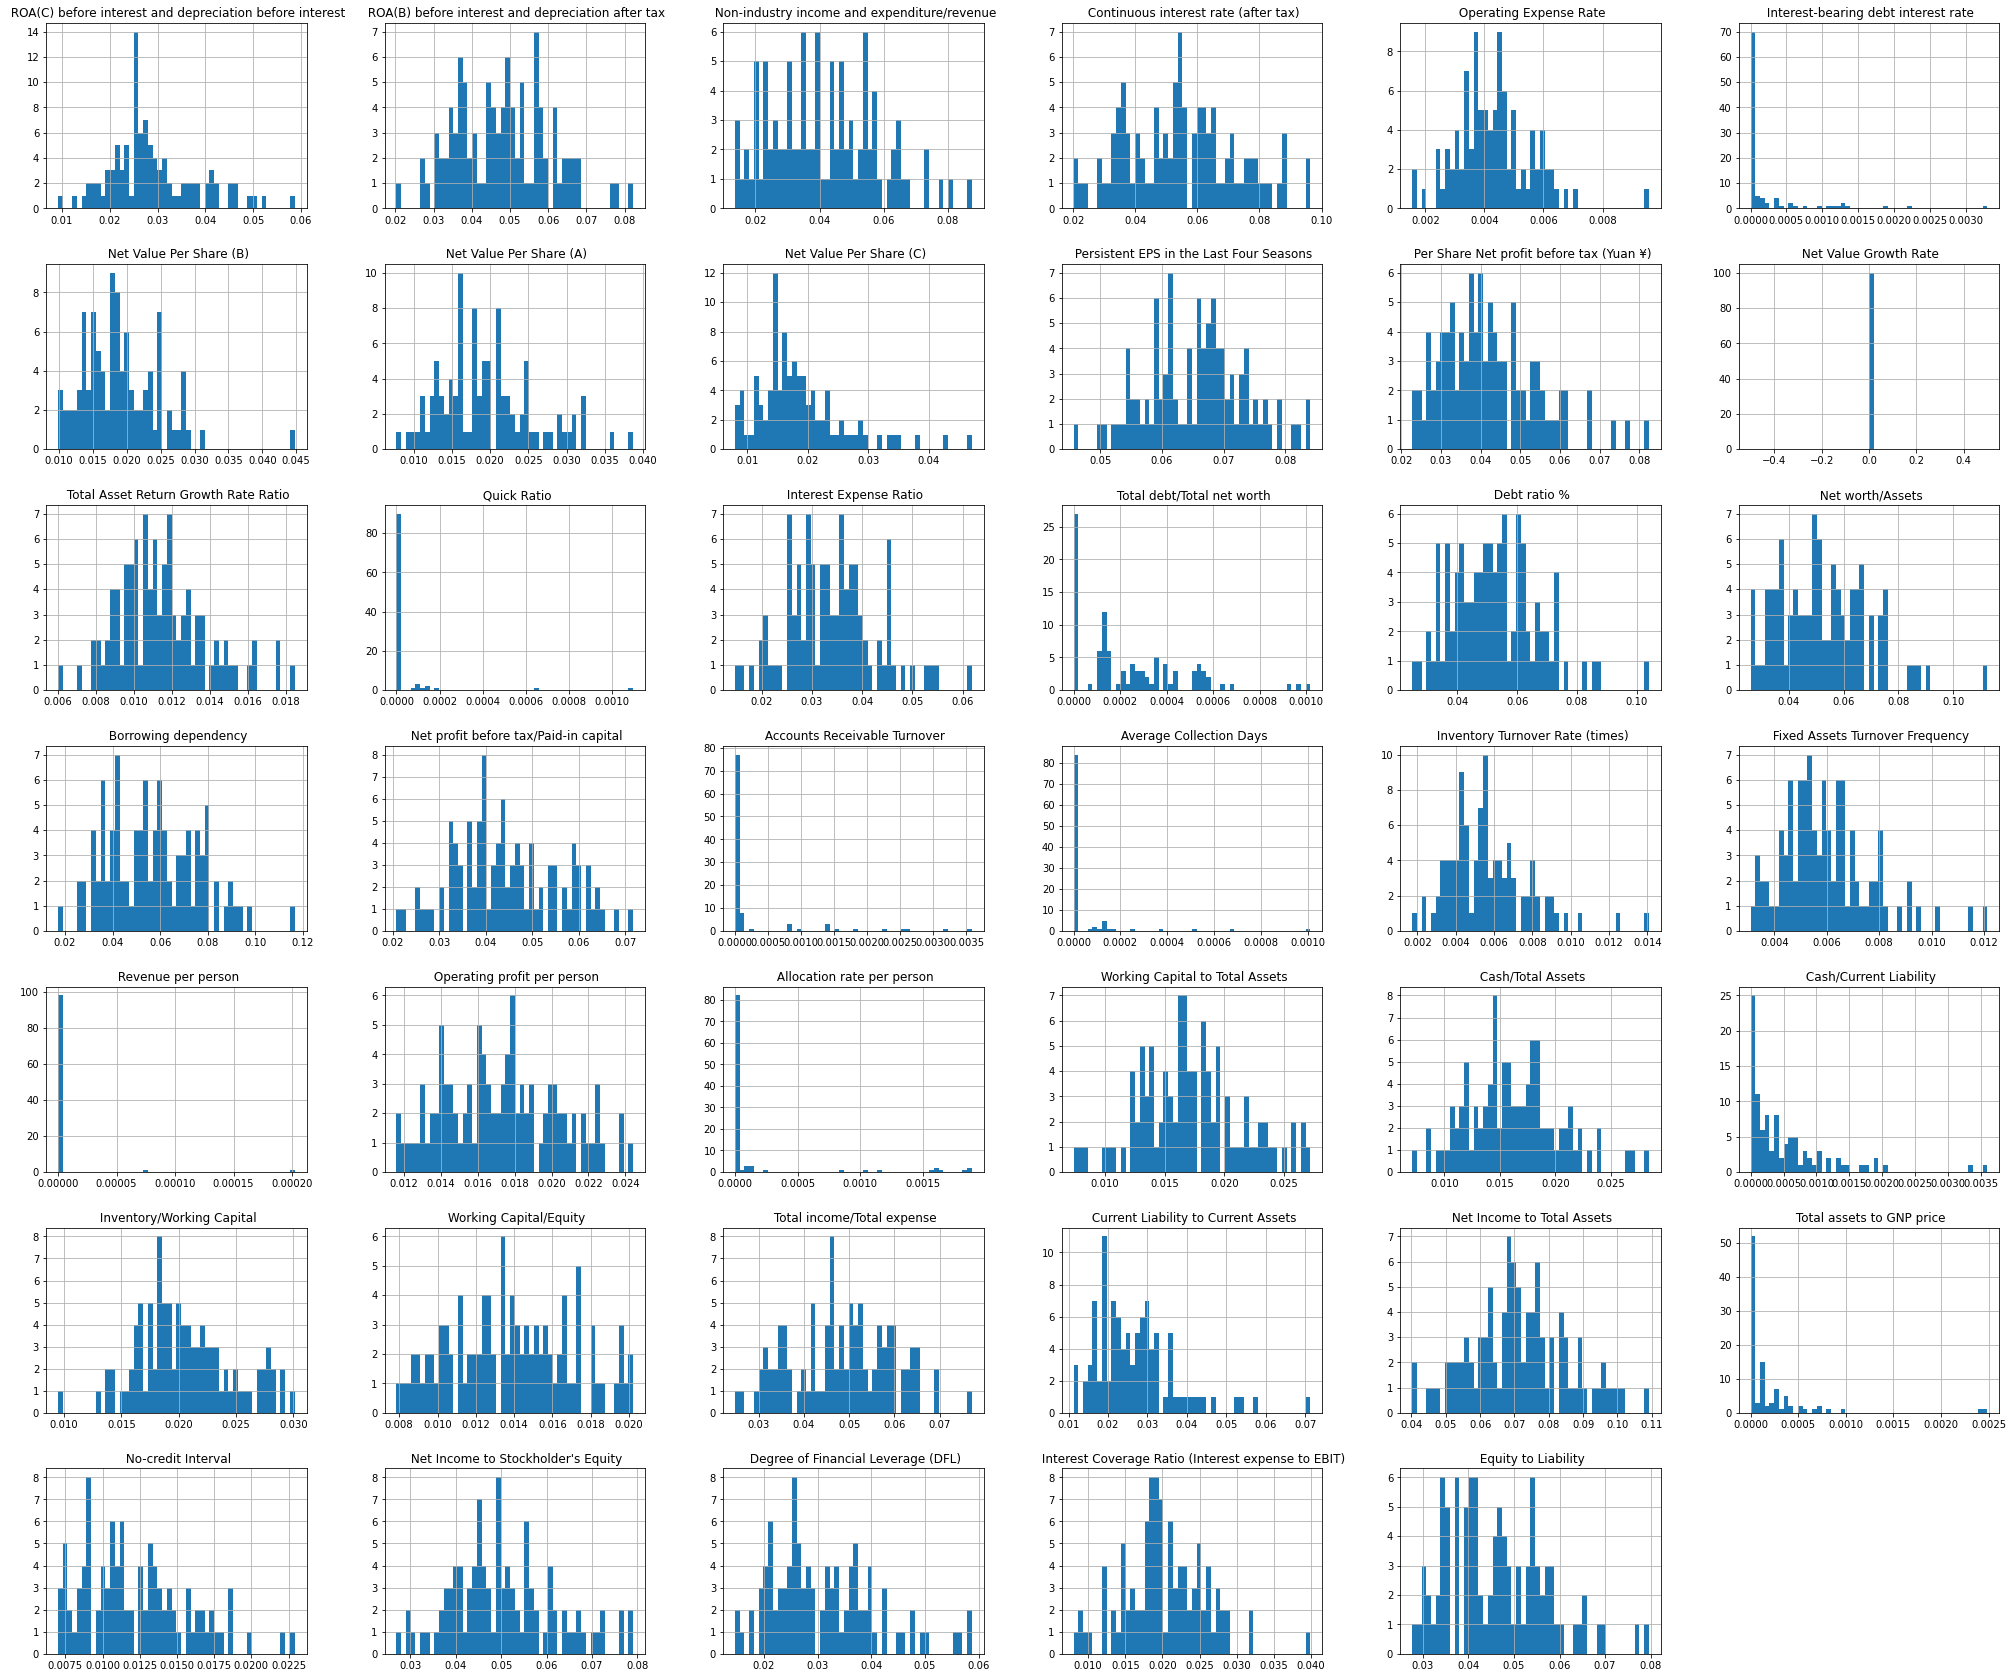

In [72]:
FinalFeaturesImportance_0
FinalFeaturesImportance_0.hist(figsize = (35,30), bins = 50)
plt.show()

In [73]:
rfecv_df1=rfecv_df0.drop(labels=[' Interest-bearing debt interest rate',' Net Value Growth Rate',' Quick Ratio',' Total debt/Total net worth',' Accounts Receivable Turnover',' Average Collection Days',' Revenue per person',' Allocation rate per person',' Cash/Current Liability',' Total assets to GNP price'], axis=1) 

In [74]:
rfecv_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 32 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 2    Non-industry income and expenditure/revenue              6819 non-null   float64
 3    Continuous interest rate (after tax)                     6819 non-null   float64
 4    Operating Expense Rate                                   6819 non-null   float64
 5    Net Value Per Share (B)                                  6819 non-null   float64
 6    Net Value Per Share (A)                                  6819 non-null   float64
 7    Net Value Per Share (C)                                  6819 non-null   float64
 8    Persistent EPS in

In [75]:
acc_RS_RF_1 = np.zeros(100)
weight_precision_RS_RF_1 = np.zeros(100)
weight_recall_RS_RF_1 = np.zeros(100)
weight_f1_RS_RF_1 = np.zeros(100)
weight_support_RS_RF_1 = np.zeros(100)
auc_RS_RF_1 = np.zeros(100)
gmean_RS_RF_1 =np.zeros(100)
Accuracy_RS_RF_1 = pd.DataFrame()
W_precision_RS_RF_1 = pd.DataFrame()
W_recall_RS_RF_1 = pd.DataFrame()
W_f1_RS_RF_1 = pd.DataFrame()
W_support_RS_RF_1 = pd.DataFrame()
AUC_RS_RF_1 = pd.DataFrame()
GMean_RS_RF_1 = pd.DataFrame()

f0_1=np.zeros(100)
f1_1=np.zeros(100)
f2_1=np.zeros(100)
f3_1=np.zeros(100)
f4_1=np.zeros(100)
f5_1=np.zeros(100)
f6_1=np.zeros(100)
f7_1=np.zeros(100)
f8_1=np.zeros(100)
f9_1=np.zeros(100)
f10_1=np.zeros(100)
f11_1=np.zeros(100)
f12_1=np.zeros(100)
f13_1=np.zeros(100)
f14_1=np.zeros(100)
f15_1=np.zeros(100)
f16_1=np.zeros(100)
f17_1=np.zeros(100)
f18_1=np.zeros(100)
f19_1=np.zeros(100)
f20_1=np.zeros(100)
f21_1=np.zeros(100)
f22_1=np.zeros(100)
f23_1=np.zeros(100)
f24_1=np.zeros(100)
f25_1=np.zeros(100)
f26_1=np.zeros(100)
f27_1=np.zeros(100)
f28_1=np.zeros(100)
f29_1=np.zeros(100)
f30_1=np.zeros(100)
F0_1=pd.DataFrame()
F1_1=pd.DataFrame()
F2_1=pd.DataFrame()
F3_1=pd.DataFrame()
F4_1=pd.DataFrame()
F5_1=pd.DataFrame()
F6_1=pd.DataFrame()
F7_1=pd.DataFrame()
F8_1=pd.DataFrame()
F9_1=pd.DataFrame()
F10_1=pd.DataFrame()
F11_1=pd.DataFrame()
F12_1=pd.DataFrame()
F13_1=pd.DataFrame()
F14_1=pd.DataFrame()
F15_1=pd.DataFrame()
F16_1=pd.DataFrame()
F17_1=pd.DataFrame()
F18_1=pd.DataFrame()
F19_1=pd.DataFrame()
F20_1=pd.DataFrame()
F21_1=pd.DataFrame()
F22_1=pd.DataFrame()
F23_1=pd.DataFrame()
F24_1=pd.DataFrame()
F25_1=pd.DataFrame()
F26_1=pd.DataFrame()
F27_1=pd.DataFrame()
F28_1=pd.DataFrame()
F29_1=pd.DataFrame()
F30_1=pd.DataFrame()

for i in range(0,100):
    Bankrupt_RS_RF_1=rfecv_df1[rfecv_df1['Bankrupt?']==1] 
    NonBankrupt_RS_RF_1= rfecv_df1[rfecv_df1['Bankrupt?']==0] 
    
    Random_RS_RF_1=NonBankrupt_RS_RF_1.sample(220) 
    Frames_RS_RF_1=[Bankrupt_RS_RF_1,Random_RS_RF_1]
    BalancedData_RS_RF_1= pd.concat(Frames_RS_RF_1) 
    
    X_RS_RF_1=BalancedData_RS_RF_1.drop(labels=['Bankrupt?'], axis=1) 
    y_RS_RF_1=BalancedData_RS_RF_1['Bankrupt?'] 
    
    sc_RS_RF_1=StandardScaler()
    scaler_RS_RF_1 = sc_RS_RF_1.fit(X_RS_RF_1) 
    X_scaled_RS_RF_1= scaler_RS_RF_1.transform(X_RS_RF_1)
    
    default_seed_RS_RF_1 = 1
    
    X_RS_RF_1 = X_scaled_RS_RF_1
    y_RS_RF_1 = y_RS_RF_1
    
    X_train_RS_RF_1, X_test_RS_RF_1, y_train_RS_RF_1, y_test_RS_RF_1 = train_test_split(X_RS_RF_1, y_RS_RF_1, test_size=0.4,
                                                                  random_state=default_seed_RS_RF_1) 
   
    model_RS_RF_1 = RandomForestClassifier(random_state=default_seed_RS_RF_1)
    model_RS_RF_1.fit(X_train_RS_RF_1, y_train_RS_RF_1)
    FI_1=model_RS_RF_1.feature_importances_
    y_pred_RS_RF_1=model_RS_RF_1.predict(X_test_RS_RF_1)
    report_RF_1 = classification_report(y_test_RS_RF_1, y_pred_RS_RF_1, output_dict=True) 
    auc_RS_RF_1[i]= roc_auc_score(y_test_RS_RF_1, y_pred_RS_RF_1)
    gmean_RS_RF_1[i]=geometric_mean_score(y_test_RS_RF_1, y_pred_RS_RF_1,average='weighted')

    acc_RS_RF_1[i]= report_RF_1['accuracy']
    weight_precision_RS_RF_1[i] = report_RF_1['weighted avg']['precision'] 
    weight_recall_RS_RF_1[i] = report_RF_1['weighted avg']['recall'] 
    weight_f1_RS_RF_1[i] = report_RF_1['weighted avg']['f1-score']
    weight_support_RS_RF_1[i] = report_RF_1['weighted avg']['support']
    
    Accuracy_RS_RF_1['Accuracy'+str(i)]= [acc_RS_RF_1[i]]
    W_precision_RS_RF_1['W Precision'+str(i)] = [weight_precision_RS_RF_1[i]]
    W_recall_RS_RF_1['W Recall'+str(i)] = [weight_recall_RS_RF_1[i]]
    W_f1_RS_RF_1['W F1'+str(i)] = [weight_f1_RS_RF_1[i]]
    W_support_RS_RF_1['W Support'+str(i)] = [weight_support_RS_RF_1[i]]
    AUC_RS_RF_1['AUC'+str(i)]= [auc_RS_RF_1[i]]
    GMean_RS_RF_1['G-Mean'+str(i)]=[gmean_RS_RF_1[i]] 
    
    f0_1[i]=FI_1[0]
    f1_1[i]=FI_1[1]
    f2_1[i]=FI_1[2]
    f3_1[i]=FI_1[3]
    f4_1[i]=FI_1[4]
    f5_1[i]=FI_1[5]
    f6_1[i]=FI_1[6]
    f7_1[i]=FI_1[7]
    f8_1[i]=FI_1[8]
    f9_1[i]=FI_1[9]
    f10_1[i]=FI_1[10]
    f11_1[i]=FI_1[11]
    f12_1[i]=FI_1[12]
    f13_1[i]=FI_1[13]
    f14_1[i]=FI_1[14]
    f15_1[i]=FI_1[15]
    f16_1[i]=FI_1[16]
    f17_1[i]=FI_1[17]
    f18_1[i]=FI_1[18]
    f19_1[i]=FI_1[19]
    f20_1[i]=FI_1[20]
    f21_1[i]=FI_1[21]
    f22_1[i]=FI_1[22]
    f23_1[i]=FI_1[23]
    f24_1[i]=FI_1[24]
    f25_1[i]=FI_1[25]
    f26_1[i]=FI_1[26]
    f27_1[i]=FI_1[27]
    f28_1[i]=FI_1[28]
    f29_1[i]=FI_1[29]
    f30_1[i]=FI_1[30]
    
    F0_1[str(i)]=[f0_1[i]]
    F1_1[str(i)]=[f1_1[i]]
    F2_1[str(i)]=[f2_1[i]]
    F3_1[str(i)]=[f3_1[i]]
    F4_1[str(i)]=[f4_1[i]]
    F5_1[str(i)]=[f5_1[i]]
    F6_1[str(i)]=[f6_1[i]]
    F7_1[str(i)]=[f7_1[i]]
    F8_1[str(i)]=[f8_1[i]]
    F9_1[str(i)]=[f9_1[i]]
    F10_1[str(i)]=[f10_1[i]]
    F11_1[str(i)]=[f11_1[i]]
    F12_1[str(i)]=[f12_1[i]]
    F13_1[str(i)]=[f13_1[i]]
    F14_1[str(i)]=[f14_1[i]]
    F15_1[str(i)]=[f15_1[i]]
    F16_1[str(i)]=[f16_1[i]]
    F17_1[str(i)]=[f17_1[i]]
    F18_1[str(i)]=[f18_1[i]]
    F19_1[str(i)]=[f19_1[i]]
    F20_1[str(i)]=[f20_1[i]]
    F21_1[str(i)]=[f21_1[i]]
    F22_1[str(i)]=[f22_1[i]]
    F23_1[str(i)]=[f23_1[i]]
    F24_1[str(i)]=[f24_1[i]]
    F25_1[str(i)]=[f25_1[i]]
    F26_1[str(i)]=[f26_1[i]]
    F27_1[str(i)]=[f27_1[i]]
    F28_1[str(i)]=[f28_1[i]]
    F29_1[str(i)]=[f29_1[i]]
    F30_1[str(i)]=[f30_1[i]]

In [76]:
RS_ACC_RF_1=mean(Accuracy_RS_RF_1)
RS_W_Precision_RF_1=mean(W_precision_RS_RF_1)
RS_W_Recall_RF_1=mean(W_recall_RS_RF_1)
RS_W_F1_RF_1=mean(W_f1_RS_RF_1)
RS_W_Support_RF_1=mean(W_support_RS_RF_1)
RS_AUC_RF_1=mean(AUC_RS_RF_1)
RS_GMean_RF_1=mean(GMean_RS_RF_1)

In [77]:
RS_RF_1={'':['Accuracy','Precision','Recall','F1-Score','Support','AUC','G-Mean'],'Random Forest':[RS_ACC_RF_1,RS_W_Precision_RF_1,RS_W_Recall_RF_1,RS_W_F1_RF_1,RS_W_Support_RF_1,RS_AUC_RF_1,RS_GMean_RF_1]}

rs_RF_1=pd.DataFrame(RS_RF_1)
rs_RF_1= rs_RF_1.set_index('')
rs_RF_1

,Random Forest
,
Accuracy,0.842784
Precision,0.844002
Recall,0.842784
F1-Score,0.842632
Support,176.0
AUC,0.84264
G-Mean,0.842639


In [78]:
FeaturesImportance_1=pd.concat([F0_1,F1_1,F2_1,F3_1,F4_1,F5_1,F6_1,F7_1,F8_1,F9_1,F10_1,F11_1,F12_1,F13_1,F14_1,F15_1,F16_1,F17_1,F18_1,F19_1,F20_1,F21_1,F22_1,F23_1,F24_1,F25_1,F26_1,F27_1,F28_1,F29_1,F30_1], axis=0)
FeaturesImportance_1.reset_index(drop=True)
FinalFeaturesImportance_1=FeaturesImportance_1.transpose()

In [79]:
FinalFeaturesImportance_1.columns = [' ROA(C) before interest and depreciation before interest',
 ' ROA(B) before interest and depreciation after tax',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Total Asset Return Growth Rate Ratio',
 ' Interest Expense Ratio',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Net profit before tax/Paid-in capital',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Operating profit per person',
 ' Working Capital to Total Assets',
 ' Cash/Total Assets',
 ' Inventory/Working Capital',
 ' Working Capital/Equity',
 ' Total income/Total expense',
 ' Current Liability to Current Assets',
 ' Net Income to Total Assets',
 ' No-credit Interval',
 " Net Income to Stockholder's Equity",
 ' Degree of Financial Leverage (DFL)',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Equity to Liability']

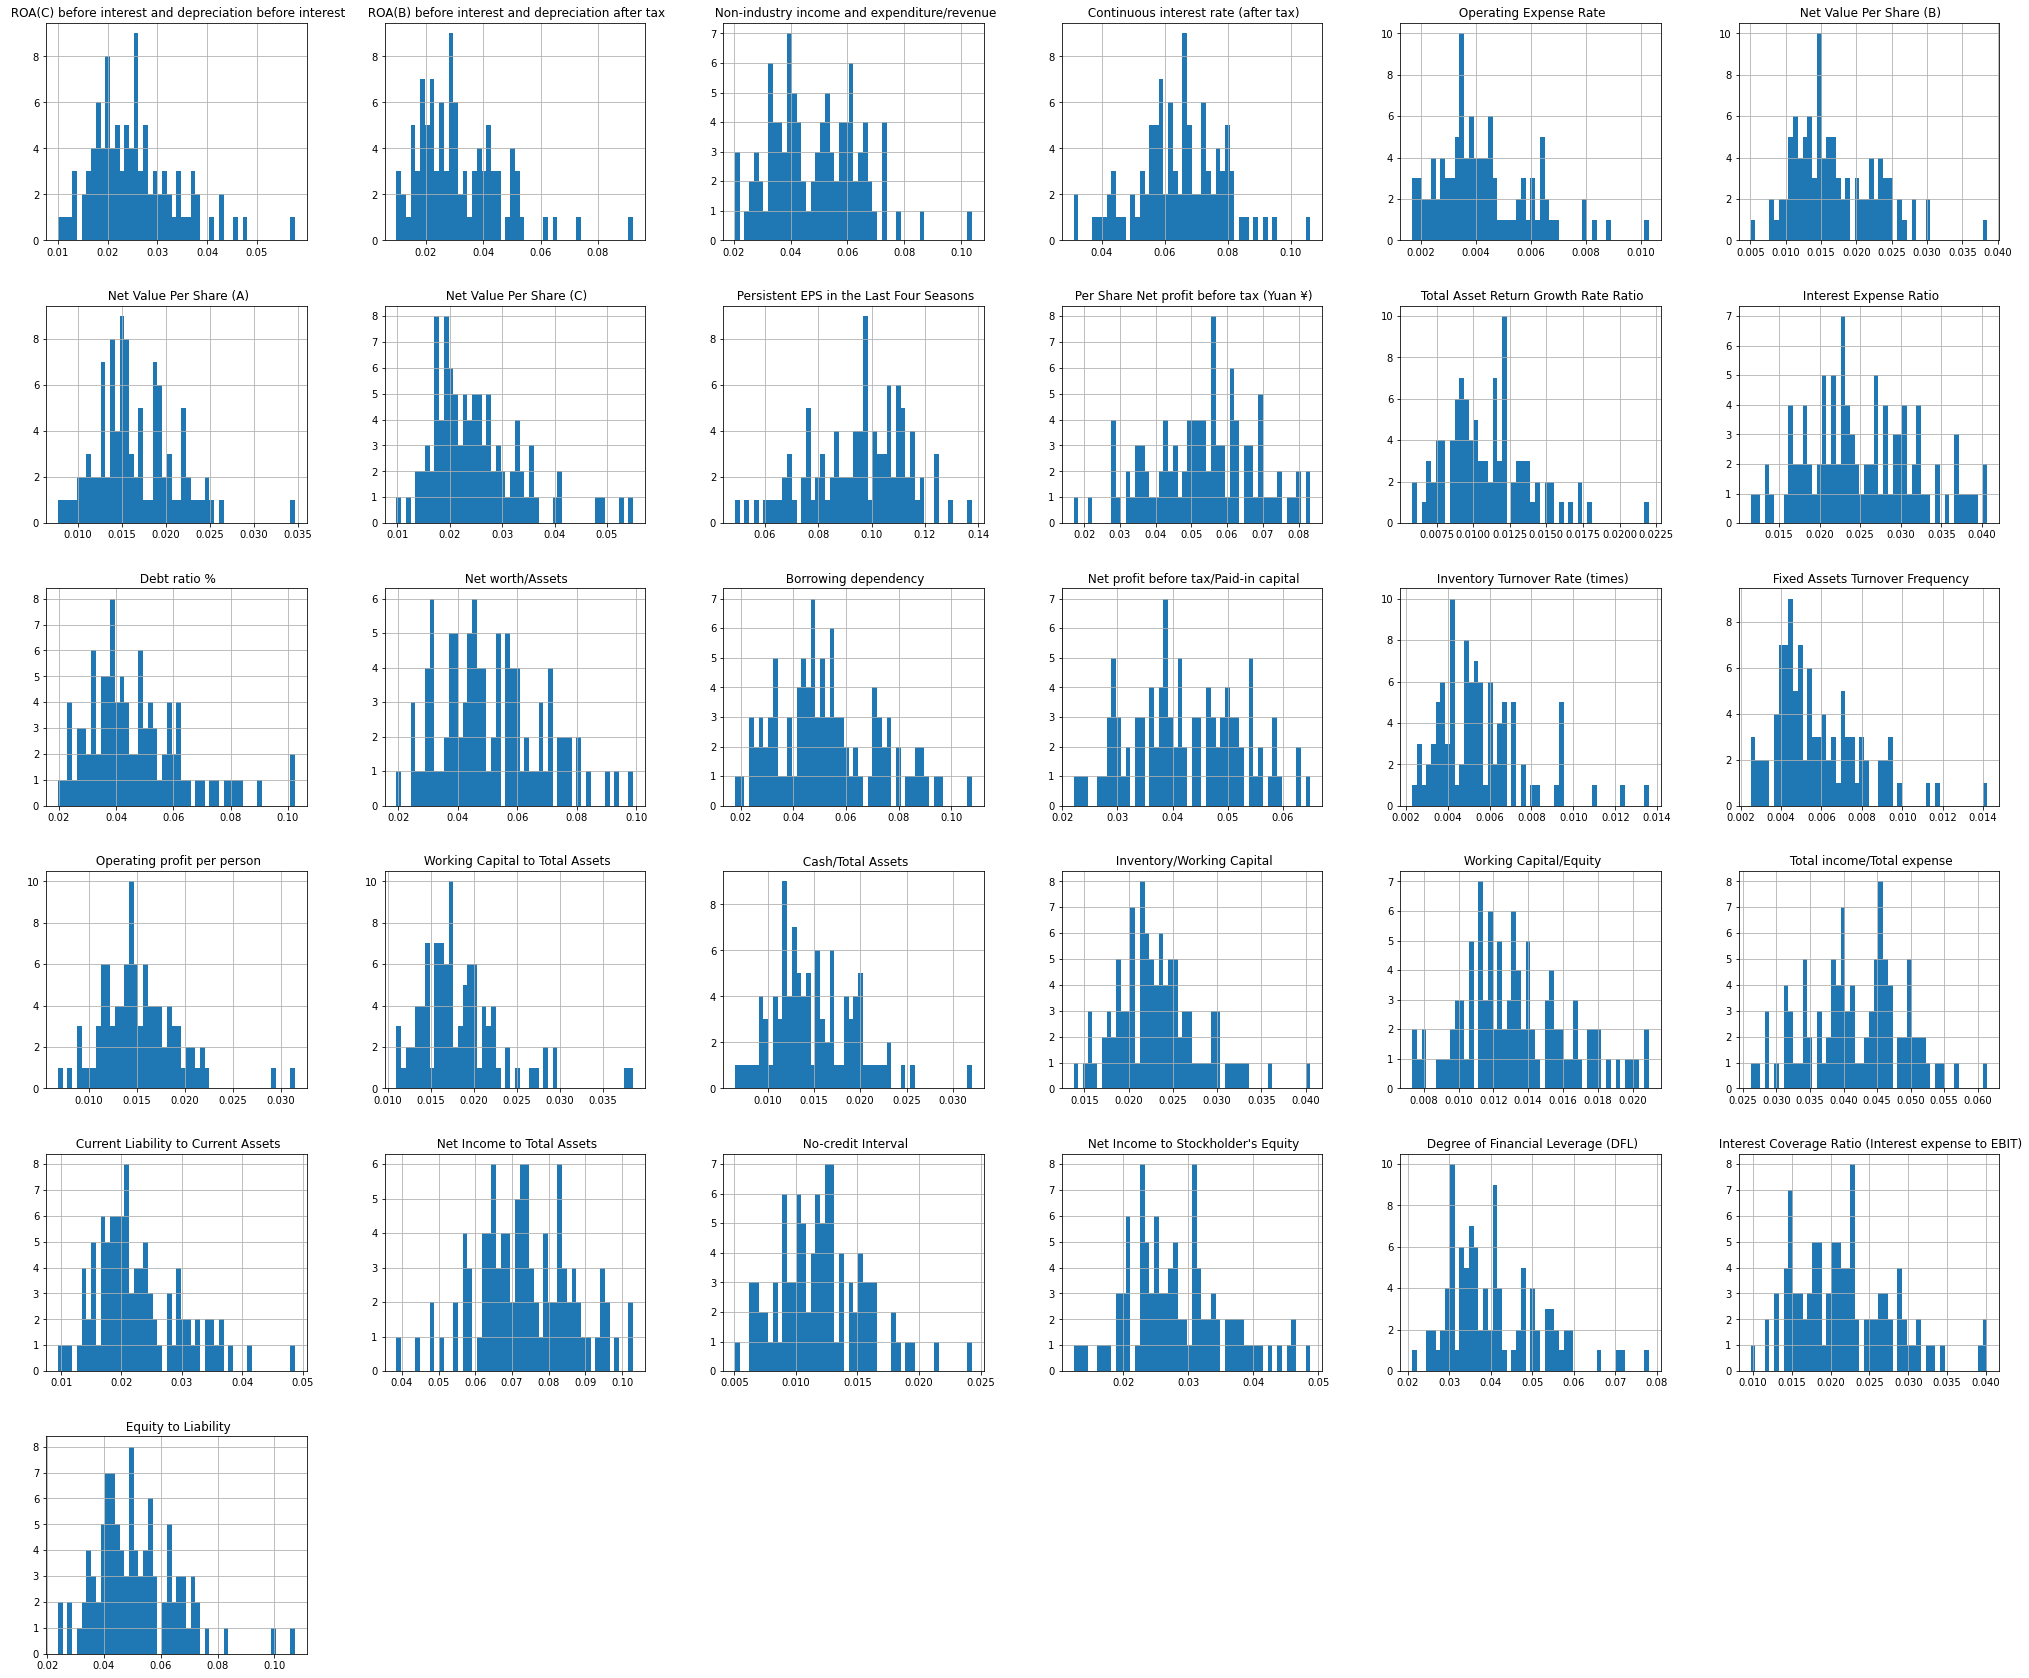

In [80]:
FinalFeaturesImportance_1
FinalFeaturesImportance_1.hist(figsize = (35,30), bins = 50)
plt.show()

In [81]:
rfecv_df=rfecv_df1

In [82]:
rfecv_df

,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),...,Working Capital/Equity,Total income/Total expense,Current Liability to Current Assets,Net Income to Total Assets,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt?
0,0.370594,0.405750,0.302646,0.780985,1.256969e-04,0.147950,0.147950,0.147950,0.169141,0.138736,...,0.721275,0.002022,0.118250,0.716845,0.622879,0.827890,0.026601,0.564050,0.016469,1
1,0.464291,0.516730,0.303556,0.781506,2.897851e-04,0.182251,0.182251,0.182251,0.208944,0.169918,...,0.731975,0.002226,0.047775,0.795297,0.623652,0.839969,0.264577,0.570175,0.020794,1
2,0.426071,0.472295,0.302035,0.780284,2.361297e-04,0.177911,0.177911,0.193713,0.180581,0.142803,...,0.742729,0.002060,0.025346,0.774670,0.623841,0.836774,0.026555,0.563706,0.016474,1
3,0.399844,0.457733,0.303350,0.781241,1.078888e-04,0.154187,0.154187,0.154187,0.193722,0.148603,...,0.729825,0.001831,0.067250,0.739555,0.622929,0.834697,0.026697,0.564663,0.023982,1
4,0.465022,0.522298,0.303475,0.781550,7.890000e+09,0.167502,0.167502,0.167502,0.212537,0.168412,...,0.732000,0.002224,0.047725,0.795016,0.623521,0.839973,0.024752,0.575617,0.035490,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.543230,0.303510,0.781588,1.510213e-04,0.175045,0.175045,0.175045,0.216602,0.172102,...,0.736716,0.002266,0.027951,0.799927,0.623620,0.840359,0.027064,0.566193,0.029890,0
6815,0.475162,0.524172,0.303520,0.781586,5.220000e+09,0.181324,0.181324,0.181324,0.216697,0.172780,...,0.734584,0.002288,0.031470,0.799748,0.623931,0.840306,0.027009,0.566018,0.038284,0
6816,0.472725,0.520638,0.303512,0.781546,2.509312e-04,0.269521,0.269521,0.269521,0.210929,0.173232,...,0.737432,0.002239,0.007542,0.797778,0.624156,0.840138,0.026791,0.565158,0.097649,0
6817,0.506264,0.554045,0.303498,0.781663,1.236154e-04,0.213392,0.213392,0.213392,0.228326,0.185584,...,0.736713,0.002395,0.022916,0.811808,0.623957,0.841084,0.026822,0.565302,0.044009,0


# The dataset with feature selection but no resampling

In [83]:
X2=rfecv_df.drop(labels=['Bankrupt?'], axis=1)
y2=rfecv_df['Bankrupt?']

### Standardization

In [84]:
sc2=StandardScaler()
scaler2 = sc2.fit(X2)
X2_scaled = scaler2.transform(X2)

### Logistic Regression

In [85]:
default_seed = 1

X2_LR = X2_scaled
y2_LR= y2

X2_train_LR, X2_test_LR, y2_train_LR, y2_test_LR = train_test_split(X2_LR, y2_LR, test_size=0.4,
                                                                  random_state=default_seed)  

model2_LR = LogisticRegression()
model2_LR.fit(X2_train_LR, y2_train_LR)
y2_pred_LR=model2_LR.predict(X2_test_LR)


r2_LR = classification_report(y2_test_LR, y2_pred_LR, output_dict=True) 
acc2_LR= r2_LR['accuracy']
weight2_precision_LR = r2_LR['weighted avg']['precision'] 
weight2_recall_LR = r2_LR['weighted avg']['recall'] 
weight2_f1_LR = r2_LR['weighted avg']['f1-score']
weight2_support_LR = r2_LR['weighted avg']['support']


roc2_LR=roc_auc_score(y2_test_LR, y2_pred_LR)
fpr2_LR,tps2_LR,thresold2_LR = roc_curve(y2_test_LR, y2_pred_LR)
gmean2_LR=geometric_mean_score(y2_test_LR, y2_pred_LR,average='weighted')

LR2={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Logistic Regression':[acc2_LR,weight2_precision_LR,weight2_recall_LR,weight2_f1_LR,weight2_support_LR]}

lr2=pd.DataFrame(LR2)
lr2=lr2.append({'':'AUC', 'Logistic Regression':roc2_LR}, ignore_index=True)
lr2=lr2.append({'':'G-Mean', 'Logistic Regression':gmean2_LR}, ignore_index=True)
lr2=lr2.set_index('')
lr2

,Logistic Regression
,
Accuracy,0.964076
Precision,0.953852
Recall,0.964076
F1-Score,0.957441
Support,2728.000000
AUC,0.588856
G-Mean,0.453829


### Support Vector Machine

In [86]:
default_seed = 1

X2_SVM = X2_scaled
y2_SVM= y2

X2_train_SVM, X2_test_SVM, y2_train_SVM, y2_test_SVM = train_test_split(X2_SVM, y2_SVM, test_size=0.4,
                                                                  random_state=default_seed) 

model2_SVM = svm.SVC(kernel='linear', C=100,gamma='scale')  
model2_SVM.fit(X2_train_SVM, y2_train_SVM)
y2_pred_SVM=model2_SVM.predict(X2_test_SVM)


r2_SVM = classification_report(y2_test_SVM, y2_pred_SVM, output_dict=True) 
acc2_SVM= r2_SVM['accuracy']
weight2_precision_SVM = r2_SVM['weighted avg']['precision'] 
weight2_recall_SVM = r2_SVM['weighted avg']['recall'] 
weight2_f1_SVM = r2_SVM['weighted avg']['f1-score']
weight2_support_SVM = r2_SVM['weighted avg']['support']


roc2_SVM=roc_auc_score(y2_test_SVM, y2_pred_SVM)
fpr2_SVM,tps2_SVM,thresold2_SVM = roc_curve(y2_test_SVM, y2_pred_SVM)
gmean2_SVM=geometric_mean_score(y2_test_SVM, y2_pred_SVM,average='weighted')

SVM2={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Support Vector Machine':[acc2_SVM,weight2_precision_SVM,weight2_recall_SVM,weight2_f1_SVM,weight2_support_SVM]}

svm2=pd.DataFrame(SVM2)
svm2=svm2.append({'':'AUC', 'Support Vector Machine':roc2_SVM}, ignore_index=True)
svm2=svm2.append({'':'G-Mean', 'Support Vector Machine':gmean2_SVM}, ignore_index=True)
svm2=svm2.set_index('')
svm2

,Support Vector Machine
,
Accuracy,0.966642
Precision,0.953403
Recall,0.966642
F1-Score,0.954651
Support,2728.000000
AUC,0.537134
G-Mean,0.322546


### Random Forest

In [87]:
default_seed = 1

X2_RF = X2_scaled
y2_RF= y2

X2_train_RF, X2_test_RF, y2_train_RF, y2_test_RF = train_test_split(X2_RF, y2_RF, test_size=0.4,
                                                                  random_state=default_seed) 

model2_RF = RandomForestClassifier(random_state=default_seed)
model2_RF.fit(X2_train_RF, y2_train_RF)
predictions2 = model2_RF.predict_proba(X2_test_RF)[:,1]
y2_pred_RF=model2_RF.predict(X2_test_RF)


r2_RF = classification_report(y2_test_RF, y2_pred_RF, output_dict=True) 
acc2_RF= r2_RF['accuracy']
weight2_precision_RF = r2_RF['weighted avg']['precision'] 
weight2_recall_RF = r2_RF['weighted avg']['recall'] 
weight2_f1_RF = r2_RF['weighted avg']['f1-score']
weight2_support_RF = r2_RF['weighted avg']['support']


roc2_RF=roc_auc_score(y2_test_RF, y2_pred_RF)
fpr2_RF,tps2_RF,thresold2_RF = roc_curve(y2_test_RF, y2_pred_RF)
gmean2_RF=geometric_mean_score(y2_test_RF, y2_pred_RF,average='weighted')

RF2={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Random Forest':[acc2_RF,weight2_precision_RF,weight2_recall_RF,weight2_f1_RF,weight2_support_RF]}

rf2=pd.DataFrame(RF2)
rf2=rf2.append({'':'AUC', 'Random Forest':roc2_RF}, ignore_index=True)
rf2=rf2.append({'':'G-Mean', 'Random Forest':gmean2_RF}, ignore_index=True)
rf2=rf2.set_index('')
rf2

,Random Forest
,
Accuracy,0.966276
Precision,0.956283
Recall,0.966276
F1-Score,0.958959
Support,2728.000000
AUC,0.589994
G-Mean,0.454427


### KNN

In [88]:
default_seed = 1

X2_KNN = X2_scaled
y2_KNN = y2

X2_train_KNN, X2_test_KNN, y2_train_KNN, y2_test_KNN = train_test_split(X2_KNN, y2_KNN, test_size=0.4,
                                                                  random_state=default_seed) 

model2_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model2_KNN.fit(X2_train_KNN, y2_train_KNN)
y2_pred_KNN=model2_KNN.predict(X2_test_KNN)


r2_KNN = classification_report(y2_test_KNN, y2_pred_KNN, output_dict=True) 
acc2_KNN= r2_KNN['accuracy']
weight2_precision_KNN = r2_KNN['weighted avg']['precision'] 
weight2_recall_KNN = r2_KNN['weighted avg']['recall'] 
weight2_f1_KNN = r2_KNN['weighted avg']['f1-score']
weight2_support_KNN = r2_KNN['weighted avg']['support']


roc2_KNN=roc_auc_score(y2_test_KNN, y2_pred_KNN)
fpr2_KNN,tps2_KNN,thresold2_KNN = roc_curve(y2_test_KNN, y2_pred_KNN)
gmean2_KNN=geometric_mean_score(y2_test_KNN, y2_pred_KNN,average='weighted')

KNN2={'':['Accuracy','Precision','Recall','F1-Score','Support'],'KNN':[acc2_KNN,weight2_precision_KNN,weight2_recall_KNN,weight2_f1_KNN,weight2_support_KNN]}

knn2=pd.DataFrame(KNN2)
knn2=knn2.append({'':'AUC', 'KNN':roc2_KNN}, ignore_index=True)
knn2=knn2.append({'':'G-Mean', 'KNN':gmean2_KNN}, ignore_index=True)
knn2=knn2.set_index('')
knn2

,KNN
,
Accuracy,0.965543
Precision,0.952710
Recall,0.965543
F1-Score,0.955953
Support,2728.000000
AUC,0.557785
G-Mean,0.380602


### Naive Bayes

In [89]:
default_seed = 1

X2_NB = X2_scaled
y2_NB = y2

X2_train_NB, X2_test_NB, y2_train_NB, y2_test_NB = train_test_split(X2_NB, y2_NB, test_size=0.4,
                                                                  random_state=default_seed) 

model2_NB = GaussianNB()
model2_NB.fit(X2_train_NB, y2_train_NB)
y2_pred_NB=model2_NB.predict(X2_test_NB)


r2_NB = classification_report(y2_test_NB, y2_pred_NB, output_dict=True) 
acc2_NB= r2_NB['accuracy']
weight2_precision_NB = r2_NB['weighted avg']['precision'] 
weight2_recall_NB = r2_NB['weighted avg']['recall'] 
weight2_f1_NB = r2_NB['weighted avg']['f1-score']
weight2_support_NB = r2_NB['weighted avg']['support']


roc2_NB=roc_auc_score(y2_test_NB, y2_pred_NB)
fpr2_NB,tps2_NB,thresold2_NB = roc_curve(y2_test_NB, y2_pred_NB)
gmean2_NB=geometric_mean_score(y2_test_NB, y2_pred_NB,average='weighted')

NB2={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Naive Bayes':[acc2_NB,weight2_precision_NB,weight2_recall_NB,weight2_f1_NB,weight2_support_NB]}

nb2=pd.DataFrame(NB2)
nb2=nb2.append({'':'AUC', 'Naive Bayes':roc2_NB}, ignore_index=True)
nb2=nb2.append({'':'G-Mean', 'Naive Bayes':gmean2_NB}, ignore_index=True)
nb2=nb2.set_index('')
nb2

,Naive Bayes
,
Accuracy,0.909457
Precision,0.960313
Recall,0.909457
F1-Score,0.930315
Support,2728.000000
AUC,0.772800
G-Mean,0.760621


### Decision Tree

In [90]:
default_seed = 1

X2_DT = X2_scaled
y2_DT = y2

X2_train_DT, X2_test_DT, y2_train_DT, y2_test_DT = train_test_split(X2_DT, y2_DT, test_size=0.4,
                                                                  random_state=default_seed) 


model2_DT=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model2_DT.fit(X2_train_DT, y2_train_DT)
y2_pred_DT=model2_DT.predict(X2_test_DT)


r2_DT = classification_report(y2_test_DT, y2_pred_DT, output_dict=True) 
acc2_DT= r2_DT['accuracy']
weight2_precision_DT = r2_DT['weighted avg']['precision'] 
weight2_recall_DT = r2_DT['weighted avg']['recall'] 
weight2_f1_DT = r2_DT['weighted avg']['f1-score']
weight2_support_DT = r2_DT['weighted avg']['support']

roc2_DT=roc_auc_score(y2_test_DT, y2_pred_DT)
fpr2_DT,tps2_DT,thresold2_DT = roc_curve(y2_test_DT, y2_pred_DT)
gmean2_DT=geometric_mean_score(y2_test_DT, y2_pred_DT,average='weighted')

DT2={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Decision Tree':[acc2_DT,weight2_precision_DT,weight2_recall_DT,weight2_f1_DT,weight2_support_DT]}

dt2=pd.DataFrame(DT2)
dt2=dt2.append({'':'AUC', 'Decision Tree':roc2_DT}, ignore_index=True)
dt2=dt2.append({'':'G-Mean', 'Decision Tree':gmean2_DT}, ignore_index=True)
dt2=dt2.set_index('')
dt2

,Decision Tree
,
Accuracy,0.957478
Precision,0.957025
Recall,0.957478
F1-Score,0.957250
Support,2728.000000
AUC,0.665016
G-Mean,0.597255


### XGBoost

In [91]:
default_seed = 1

X2_XGB = X2_scaled
y2_XGB = y2

X2_train_XGB, X2_test_XGB, y2_train_XGB, y2_test_XGB = train_test_split(X2_XGB, y2_XGB, test_size=0.4,
                                                                  random_state=default_seed) 

model2_XGB = XGBClassifier()
model2_XGB.fit(X2_train_XGB, y2_train_XGB)
y2_pred_XGB=model2_XGB.predict(X2_test_XGB)


r2_XGB = classification_report(y2_test_XGB, y2_pred_XGB, output_dict=True) 
acc2_XGB= r2_XGB['accuracy']
weight2_precision_XGB = r2_XGB['weighted avg']['precision'] 
weight2_recall_XGB = r2_XGB['weighted avg']['recall'] 
weight2_f1_XGB = r2_XGB['weighted avg']['f1-score']
weight2_support_XGB = r2_XGB['weighted avg']['support']


roc2_XGB=roc_auc_score(y2_test_XGB, y2_pred_XGB)
fpr2_XGB,tps2_XGB,thresold2_XGB = roc_curve(y2_test_XGB, y2_pred_XGB)
gmean2_XGB=geometric_mean_score(y2_test_XGB, y2_pred_XGB,average='weighted')

XGB2={'':['Accuracy','Precision','Recall','F1-Score','Support'],'XGBoost':[acc2_XGB,weight2_precision_XGB,weight2_recall_XGB,weight2_f1_XGB,weight2_support_XGB]}

xgb2=pd.DataFrame(XGB2)
xgb2=xgb2.append({'':'AUC', 'XGBoost':roc2_XGB}, ignore_index=True)
xgb2=xgb2.append({'':'G-Mean', 'XGBoost':gmean2_XGB}, ignore_index=True)
xgb2=xgb2.set_index('')
xgb2


,XGBoost
,
Accuracy,0.966642
Precision,0.958813
Recall,0.966642
F1-Score,0.961305
Support,2728.000000
AUC,0.622013
G-Mean,0.517813


### Conclusion

In [92]:
Conclusion2= pd.concat([lr2,svm2,rf2,knn2,nb2,dt2,xgb2], axis=1)
Conclusion2= Conclusion2.transpose()
Conclusion2.index.name = 'Dataset with feature selection'
Conclusion2

,Accuracy,Precision,Recall,F1-Score,Support,AUC,G-Mean
Dataset with feature selection,,,,,,,
Logistic Regression,0.964076,0.953852,0.964076,0.957441,2728.0,0.588856,0.453829
Support Vector Machine,0.966642,0.953403,0.966642,0.954651,2728.0,0.537134,0.322546
Random Forest,0.966276,0.956283,0.966276,0.958959,2728.0,0.589994,0.454427
KNN,0.965543,0.952710,0.965543,0.955953,2728.0,0.557785,0.380602
Naive Bayes,0.909457,0.960313,0.909457,0.930315,2728.0,0.772800,0.760621
Decision Tree,0.957478,0.957025,0.957478,0.957250,2728.0,0.665016,0.597255
XGBoost,0.966642,0.958813,0.966642,0.961305,2728.0,0.622013,0.517813


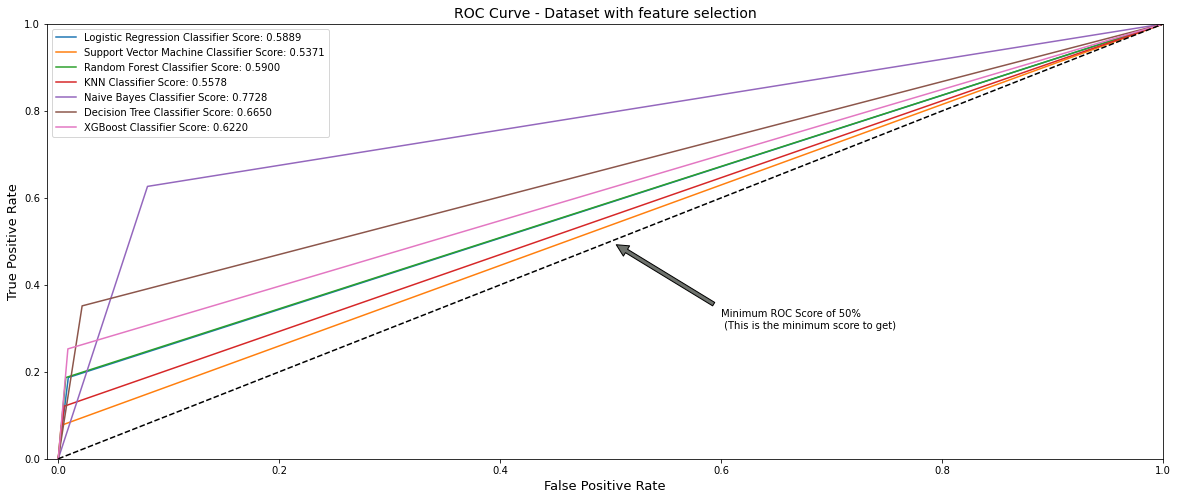

In [93]:
def graph_roc_curve_multiple2(fpr2_LR,tps2_LR,fpr2_SVM,tps2_SVM,fpr2_RF,tps2_RF,fpr2_KNN,tps2_KNN,fpr2_NB,tps2_NB,fpr2_DT,tps2_DT,fpr2_XGB,tps2_XGB):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve - Dataset with feature selection', fontsize=14)
    plt.plot(fpr2_LR,tps2_LR, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y2_test_LR, y2_pred_LR)))
    plt.plot(fpr2_SVM,tps2_SVM, label='Support Vector Machine Classifier Score: {:.4f}'.format(roc_auc_score(y2_test_SVM, y2_pred_SVM)))
    plt.plot(fpr2_RF,tps2_RF, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y2_test_RF, y2_pred_RF)))
    plt.plot(fpr2_KNN,tps2_KNN, label='KNN Classifier Score: {:.4f}'.format(roc_auc_score(y2_test_KNN, y2_pred_KNN)))
    plt.plot(fpr2_NB,tps2_NB, label='Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y2_test_NB, y2_pred_NB)))
    plt.plot(fpr2_DT,tps2_DT, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y2_test_DT, y2_pred_DT)))
    plt.plot(fpr2_XGB,tps2_XGB, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y2_test_XGB, y2_pred_XGB)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple2(fpr2_LR,tps2_LR,fpr2_SVM,tps2_SVM,fpr2_RF,tps2_RF,fpr2_KNN,tps2_KNN,fpr2_NB,tps2_NB,fpr2_DT,tps2_DT,fpr2_XGB,tps2_XGB)
plt.show()

# The dataset with feature selection and resampling

### Random Undersampling

In [94]:
X3=rfecv_df.drop(labels=['Bankrupt?'], axis=1)
y3=rfecv_df['Bankrupt?']

In [95]:
rus3 = RandomUnderSampler(random_state=0)
X3,y3=rus3.fit_resample(X3,y3)

In [96]:
X3.shape

(440, 31)

In [97]:
y3.shape

(440,)

In [98]:
y3.value_counts()

0    220
1    220
Name: Bankrupt?, dtype: int64

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

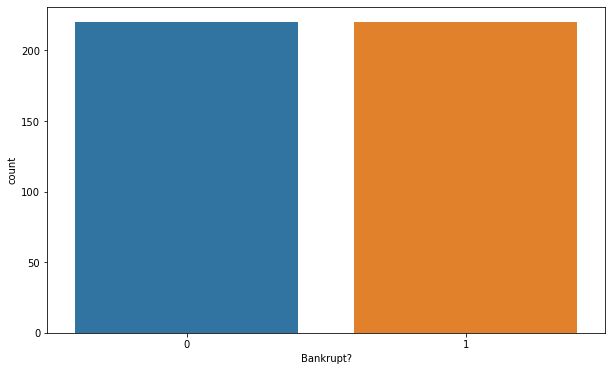

In [99]:
sns.countplot(y3)

### Standardization

In [100]:
sc3=StandardScaler()
scaler3 = sc3.fit(X3)
X3_scaled = scaler3.transform(X3)

### Logistic Regression

In [101]:
default_seed = 1

X3_LR = X3_scaled
y3_LR= y3

X3_train_LR, X3_test_LR, y3_train_LR, y3_test_LR = train_test_split(X3_LR, y3_LR, test_size=0.4,
                                                                  random_state=default_seed) 

model3_LR = LogisticRegression()
model3_LR.fit(X3_train_LR, y3_train_LR)
y3_pred_LR=model3_LR.predict(X3_test_LR)


r3_LR = classification_report(y3_test_LR, y3_pred_LR, output_dict=True) 
acc3_LR= r3_LR['accuracy']
weight3_precision_LR = r3_LR['weighted avg']['precision'] 
weight3_recall_LR = r3_LR['weighted avg']['recall'] 
weight3_f1_LR = r3_LR['weighted avg']['f1-score']
weight3_support_LR = r3_LR['weighted avg']['support']


roc3_LR=roc_auc_score(y3_test_LR, y3_pred_LR)
fpr3_LR,tps3_LR,thresold3_LR = roc_curve(y3_test_LR, y3_pred_LR)
gmean3_LR=geometric_mean_score(y3_test_LR, y3_pred_LR,average='weighted')

LR3={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Logistic Regression':[acc3_LR,weight3_precision_LR,weight3_recall_LR,weight3_f1_LR,weight3_support_LR]}

lr3=pd.DataFrame(LR3)
lr3=lr3.append({'':'AUC', 'Logistic Regression':roc3_LR}, ignore_index=True)
lr3=lr3.append({'':'G-Mean', 'Logistic Regression':gmean3_LR}, ignore_index=True)
lr3=lr3.set_index('')
lr3

,Logistic Regression
,
Accuracy,0.840909
Precision,0.841167
Recall,0.840909
F1-Score,0.840930
Support,176.000000
AUC,0.841085
G-Mean,0.841085


### Support Vector Machine

In [102]:
default_seed = 1

X3_SVM = X3_scaled
y3_SVM= y3

X3_train_SVM, X3_test_SVM, y3_train_SVM, y3_test_SVM = train_test_split(X3_SVM, y3_SVM, test_size=0.4,
                                                                  random_state=default_seed) 

model3_SVM = svm.SVC(kernel='linear', C=100,gamma='scale')  
model3_SVM.fit(X3_train_SVM, y3_train_SVM)
y3_pred_SVM=model3_SVM.predict(X3_test_SVM)


r3_SVM = classification_report(y3_test_SVM, y3_pred_SVM, output_dict=True) 
acc3_SVM= r3_SVM['accuracy']
weight3_precision_SVM = r3_SVM['weighted avg']['precision'] 
weight3_recall_SVM = r3_SVM['weighted avg']['recall'] 
weight3_f1_SVM = r3_SVM['weighted avg']['f1-score']
weight3_support_SVM = r3_SVM['weighted avg']['support']


roc3_SVM=roc_auc_score(y3_test_SVM, y3_pred_SVM)
fpr3_SVM,tps3_SVM,thresold3_SVM = roc_curve(y3_test_SVM, y3_pred_SVM)
gmean3_SVM=geometric_mean_score(y3_test_SVM, y3_pred_SVM,average='weighted')

SVM3={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Support Vector Machine':[acc3_SVM,weight3_precision_SVM,weight3_recall_SVM,weight3_f1_SVM,weight3_support_SVM]}

svm3=pd.DataFrame(SVM3)
svm3=svm3.append({'':'AUC', 'Support Vector Machine':roc3_SVM}, ignore_index=True)
svm3=svm3.append({'':'G-Mean', 'Support Vector Machine':gmean3_SVM}, ignore_index=True)
svm3=svm3.set_index('')
svm3

,Support Vector Machine
,
Accuracy,0.823864
Precision,0.826239
Recall,0.823864
F1-Score,0.823744
Support,176.000000
AUC,0.824677
G-Mean,0.824677


### Random Forest

In [103]:
default_seed = 1

X3_RF = X3_scaled
y3_RF= y3

X3_train_RF, X3_test_RF, y3_train_RF, y3_test_RF = train_test_split(X3_RF, y3_RF, test_size=0.4,
                                                                  random_state=default_seed) 

model3_RF = RandomForestClassifier(random_state=default_seed)
model3_RF.fit(X3_train_RF, y3_train_RF)
predictions3 = model3_RF.predict_proba(X3_test_RF)[:,1]
y3_pred_RF=model3_RF.predict(X3_test_RF)


r3_RF = classification_report(y3_test_RF, y3_pred_RF, output_dict=True) 
acc3_RF= r3_RF['accuracy']
weight3_precision_RF = r3_RF['weighted avg']['precision'] 
weight3_recall_RF = r3_RF['weighted avg']['recall'] 
weight3_f1_RF = r3_RF['weighted avg']['f1-score']
weight3_support_RF = r3_RF['weighted avg']['support']


roc3_RF=roc_auc_score(y3_test_RF, y3_pred_RF)
fpr3_RF,tps3_RF,thresold3_RF = roc_curve(y3_test_RF, y3_pred_RF)
gmean3_RF=geometric_mean_score(y3_test_RF, y3_pred_RF,average='weighted')

RF3={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Random Forest':[acc3_RF,weight3_precision_RF,weight3_recall_RF,weight3_f1_RF,weight3_support_RF]}

rf3=pd.DataFrame(RF3)
rf3=rf3.append({'':'AUC', 'Random Forest':roc3_RF}, ignore_index=True)
rf3=rf3.append({'':'G-Mean', 'Random Forest':gmean3_RF}, ignore_index=True)
rf3=rf3.set_index('')
rf3

,Random Forest
,
Accuracy,0.875000
Precision,0.875258
Recall,0.875000
F1-Score,0.875016
Support,176.000000
AUC,0.875194
G-Mean,0.875194


### KNN

In [104]:
default_seed = 1

X3_KNN = X3_scaled
y3_KNN = y3

X3_train_KNN, X3_test_KNN, y3_train_KNN, y3_test_KNN = train_test_split(X3_KNN, y3_KNN, test_size=0.4,
                                                                  random_state=default_seed) 


model3_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model3_KNN.fit(X3_train_KNN, y3_train_KNN)
y3_pred_KNN=model3_KNN.predict(X3_test_KNN)


r3_KNN = classification_report(y3_test_KNN, y3_pred_KNN, output_dict=True) 
acc3_KNN= r3_KNN['accuracy']
weight3_precision_KNN = r3_KNN['weighted avg']['precision'] 
weight3_recall_KNN = r3_KNN['weighted avg']['recall'] 
weight3_f1_KNN = r3_KNN['weighted avg']['f1-score']
weight3_support_KNN = r3_KNN['weighted avg']['support']


roc3_KNN=roc_auc_score(y3_test_KNN, y3_pred_KNN)
fpr3_KNN,tps3_KNN,thresold3_KNN = roc_curve(y3_test_KNN, y3_pred_KNN)
gmean3_KNN=geometric_mean_score(y3_test_KNN, y3_pred_KNN,average='weighted')

KNN3={'':['Accuracy','Precision','Recall','F1-Score','Support'],'KNN':[acc3_KNN,weight3_precision_KNN,weight3_recall_KNN,weight3_f1_KNN,weight3_support_KNN]}

knn3=pd.DataFrame(KNN3)
knn3=knn3.append({'':'AUC', 'KNN':roc3_KNN}, ignore_index=True)
knn3=knn3.append({'':'G-Mean', 'KNN':gmean3_KNN}, ignore_index=True)
knn3=knn3.set_index('')
knn3

,KNN
,
Accuracy,0.823864
Precision,0.823951
Recall,0.823864
F1-Score,0.823881
Support,176.000000
AUC,0.823902
G-Mean,0.823902


### Naive Bayes

In [105]:
default_seed = 1

X3_NB = X3_scaled
y3_NB = y3

X3_train_NB, X3_test_NB, y3_train_NB, y3_test_NB = train_test_split(X3_NB, y3_NB, test_size=0.4,
                                                                  random_state=default_seed) 

model3_NB = GaussianNB()
model3_NB.fit(X3_train_NB, y3_train_NB)
y3_pred_NB=model3_NB.predict(X3_test_NB)


r3_NB = classification_report(y3_test_NB, y3_pred_NB, output_dict=True) 
acc3_NB= r3_NB['accuracy']
weight3_precision_NB = r3_NB['weighted avg']['precision'] 
weight3_recall_NB = r3_NB['weighted avg']['recall'] 
weight3_f1_NB = r3_NB['weighted avg']['f1-score']
weight3_support_NB = r3_NB['weighted avg']['support']


roc3_NB=roc_auc_score(y3_test_NB, y3_pred_NB)
fpr3_NB,tps3_NB,thresold3_NB = roc_curve(y3_test_NB, y3_pred_NB)
gmean3_NB=geometric_mean_score(y3_test_NB, y3_pred_NB,average='weighted')

NB3={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Naive Bayes':[acc3_NB,weight3_precision_NB,weight3_recall_NB,weight3_f1_NB,weight3_support_NB]}

nb3=pd.DataFrame(NB3)
nb3=nb3.append({'':'AUC', 'Naive Bayes':roc3_NB}, ignore_index=True)
nb3=nb3.append({'':'G-Mean', 'Naive Bayes':gmean3_NB}, ignore_index=True)
nb3=nb3.set_index('')
nb3

,Naive Bayes
,
Accuracy,0.784091
Precision,0.800570
Recall,0.784091
F1-Score,0.781842
Support,176.000000
AUC,0.786563
G-Mean,0.786559


### Decision Tree

In [106]:
default_seed = 1

X3_DT = X3_scaled
y3_DT = y3

X3_train_DT, X3_test_DT, y3_train_DT, y3_test_DT = train_test_split(X3_DT, y3_DT, test_size=0.4,
                                                                  random_state=default_seed) 

model3_DT=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model3_DT.fit(X3_train_DT, y3_train_DT)
y3_pred_DT=model3_DT.predict(X3_test_DT)


r3_DT = classification_report(y3_test_DT, y3_pred_DT, output_dict=True) 
acc3_DT= r3_DT['accuracy']
weight3_precision_DT = r3_DT['weighted avg']['precision'] 
weight3_recall_DT = r3_DT['weighted avg']['recall'] 
weight3_f1_DT = r3_DT['weighted avg']['f1-score']
weight3_support_DT = r3_DT['weighted avg']['support']


roc3_DT=roc_auc_score(y3_test_DT, y3_pred_DT)
fpr3_DT,tps3_DT,thresold3_DT = roc_curve(y3_test_DT, y3_pred_DT)
gmean3_DT=geometric_mean_score(y3_test_DT, y3_pred_DT,average='weighted')

DT3={'':['Accuracy','Precision','Recall','F1-Score','Support'],'Decision Tree':[acc3_DT,weight3_precision_DT,weight3_recall_DT,weight3_f1_DT,weight3_support_DT]}

dt3=pd.DataFrame(DT3)
dt3=dt3.append({'':'AUC', 'Decision Tree':roc3_DT}, ignore_index=True)
dt3=dt3.append({'':'G-Mean', 'Decision Tree':gmean3_DT}, ignore_index=True)
dt3=dt3.set_index('')
dt3

,Decision Tree
,
Accuracy,0.801136
Precision,0.801640
Recall,0.801136
F1-Score,0.801156
Support,176.000000
AUC,0.801421
G-Mean,0.801421


### XGBoost

In [107]:
default_seed = 1

X3_XGB = X3_scaled
y3_XGB = y3

X3_train_XGB, X3_test_XGB, y3_train_XGB, y3_test_XGB = train_test_split(X3_XGB, y3_XGB, test_size=0.4,
                                                                  random_state=default_seed) 

model3_XGB = XGBClassifier()
model3_XGB.fit(X3_train_XGB, y3_train_XGB)
y3_pred_XGB=model3_XGB.predict(X3_test_XGB)


r3_XGB = classification_report(y3_test_XGB, y3_pred_XGB, output_dict=True) 
acc3_XGB= r3_XGB['accuracy']
weight3_precision_XGB = r3_XGB['weighted avg']['precision'] 
weight3_recall_XGB = r3_XGB['weighted avg']['recall'] 
weight3_f1_XGB = r3_XGB['weighted avg']['f1-score']
weight3_support_XGB = r3_XGB['weighted avg']['support']


roc3_XGB=roc_auc_score(y3_test_XGB, y3_pred_XGB)
fpr3_XGB,tps3_XGB,thresold3_XGB = roc_curve(y3_test_XGB, y3_pred_XGB)
gmean3_XGB=geometric_mean_score(y3_test_XGB, y3_pred_XGB,average='weighted')

XGB3={'':['Accuracy','Precision','Recall','F1-Score','Support'],'XGBoost':[acc3_XGB,weight3_precision_XGB,weight3_recall_XGB,weight3_f1_XGB,weight3_support_XGB]}

xgb3=pd.DataFrame(XGB3)
xgb3=xgb3.append({'':'AUC', 'XGBoost':roc3_XGB}, ignore_index=True)
xgb3=xgb3.append({'':'G-Mean', 'XGBoost':gmean3_XGB}, ignore_index=True)
xgb3=xgb3.set_index('')
xgb3


,XGBoost
,
Accuracy,0.840909
Precision,0.840909
Recall,0.840909
F1-Score,0.840909
Support,176.000000
AUC,0.840827
G-Mean,0.840827


### Conclusion

In [108]:
Conclusion3= pd.concat([lr3,svm3,rf3,knn3,nb3,dt3,xgb3], axis=1)
Conclusion3= Conclusion3.transpose()
Conclusion3.index.name = 'Dataset with feature selection and undersampling'
Conclusion3

,Accuracy,Precision,Recall,F1-Score,Support,AUC,G-Mean
Dataset with feature selection and undersampling,,,,,,,
Logistic Regression,0.840909,0.841167,0.840909,0.840930,176.0,0.841085,0.841085
Support Vector Machine,0.823864,0.826239,0.823864,0.823744,176.0,0.824677,0.824677
Random Forest,0.875000,0.875258,0.875000,0.875016,176.0,0.875194,0.875194
KNN,0.823864,0.823951,0.823864,0.823881,176.0,0.823902,0.823902
Naive Bayes,0.784091,0.800570,0.784091,0.781842,176.0,0.786563,0.786559
Decision Tree,0.801136,0.801640,0.801136,0.801156,176.0,0.801421,0.801421
XGBoost,0.840909,0.840909,0.840909,0.840909,176.0,0.840827,0.840827


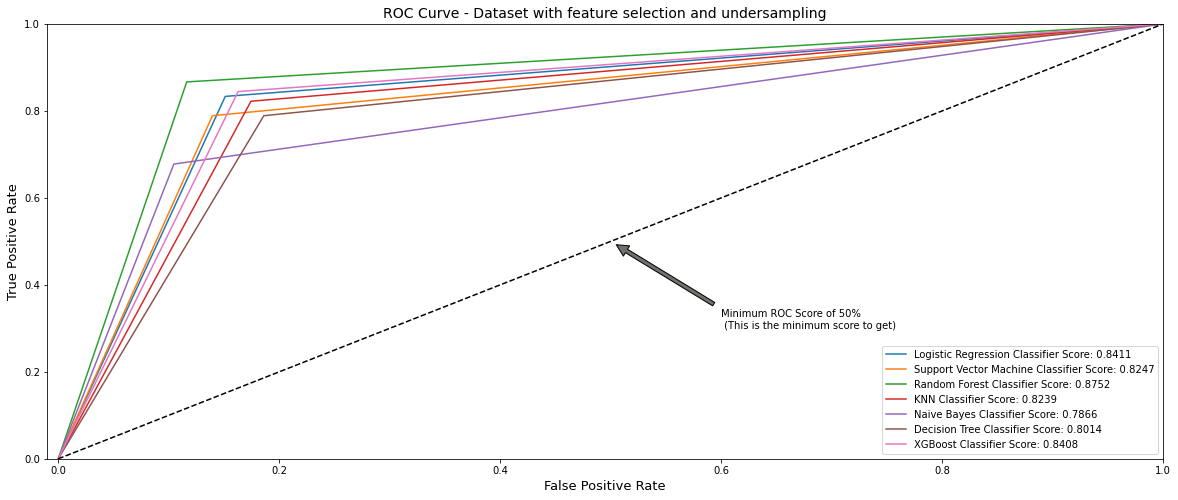

In [109]:
def graph_roc_curve_multiple3(fpr3_LR,tps3_LR,fpr3_SVM,tps3_SVM,fpr3_RF,tps3_RF,fpr3_KNN,tps3_KNN,fpr3_NB,tps3_NB,fpr3_DT,tps3_DT,fpr3_XGB,tps3_XGB):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve - Dataset with feature selection and undersampling', fontsize=14)
    plt.plot(fpr3_LR,tps3_LR, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y3_test_LR, y3_pred_LR)))
    plt.plot(fpr3_SVM,tps3_SVM, label='Support Vector Machine Classifier Score: {:.4f}'.format(roc_auc_score(y3_test_SVM, y3_pred_SVM)))
    plt.plot(fpr3_RF,tps3_RF, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y3_test_RF, y3_pred_RF)))
    plt.plot(fpr3_KNN,tps3_KNN, label='KNN Classifier Score: {:.4f}'.format(roc_auc_score(y3_test_KNN, y3_pred_KNN)))
    plt.plot(fpr3_NB,tps3_NB, label='Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y3_test_NB, y3_pred_NB)))
    plt.plot(fpr3_DT,tps3_DT, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y3_test_DT, y3_pred_DT)))
    plt.plot(fpr3_XGB,tps3_XGB, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y3_test_XGB, y3_pred_XGB)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple3(fpr3_LR,tps3_LR,fpr3_SVM,tps3_SVM,fpr3_RF,tps3_RF,fpr3_KNN,tps3_KNN,fpr3_NB,tps3_NB,fpr3_DT,tps3_DT,fpr3_XGB,tps3_XGB)
plt.show()

# Bagging Methods - The dataset with feature selection and resampling

### Logistic Regression

In [126]:
acc_RS_LR = np.zeros(100)
weight_precision_RS_LR = np.zeros(100)
weight_recall_RS_LR = np.zeros(100)
weight_f1_RS_LR = np.zeros(100)
weight_support_RS_LR = np.zeros(100)
auc_RS_LR = np.zeros(100)
gmean_RS_LR =np.zeros(100)
fpr_RS_LR =np.zeros(100)
tps_RS_LR =np.zeros(100)
Accuracy_RS_LR = pd.DataFrame()
W_precision_RS_LR = pd.DataFrame()
W_recall_RS_LR = pd.DataFrame()
W_f1_RS_LR = pd.DataFrame()
W_support_RS_LR = pd.DataFrame()
AUC_RS_LR = pd.DataFrame()
GMean_RS_LR = pd.DataFrame()
Fpr_RS_LR =pd.DataFrame()
Tps_RS_LR =pd.DataFrame()

for i in range(0,100):
    Bankrupt_RS_LR=rfecv_df[rfecv_df['Bankrupt?']==1] 
    NonBankrupt_RS_LR= rfecv_df[rfecv_df['Bankrupt?']==0] 
    
    Random_RS_LR=NonBankrupt_RS_LR.sample(220) 
    
    Frames_RS_LR=[Bankrupt_RS_LR,Random_RS_LR]
    BalancedData_RS_LR= pd.concat(Frames_RS_LR) 
    
    X_RS_LR=BalancedData_RS_LR.drop(labels=['Bankrupt?'], axis=1) 
    y_RS_LR=BalancedData_RS_LR['Bankrupt?'] 
    
    sc_RS_LR=StandardScaler()
    scaler_RS_LR = sc_RS_LR.fit(X_RS_LR) 
    X_scaled_RS_LR= scaler_RS_LR.transform(X_RS_LR) 
    
    default_seed_RS_LR = 1
    X_RS_LR = X_scaled_RS_LR 
    y_RS_LR = y_RS_LR 
    
    X_train_RS_LR, X_test_RS_LR, y_train_RS_LR, y_test_RS_LR = train_test_split(X_RS_LR, y_RS_LR, test_size=0.4,
                                                                  random_state=default_seed_RS_LR) 
    
    model_RS_LR = LogisticRegression()
    model_RS_LR.fit(X_train_RS_LR, y_train_RS_LR)
    y_pred_RS_LR=model_RS_LR.predict(X_test_RS_LR)
    report_LR = classification_report(y_test_RS_LR, y_pred_RS_LR, output_dict=True) 
    auc_RS_LR[i]= roc_auc_score(y_test_RS_LR, y_pred_RS_LR)
    fpr_LR,tps_LR,thresold_LR = roc_curve(y_test_RS_LR, y_pred_RS_LR)
    gmean_RS_LR[i]=geometric_mean_score(y_test_RS_LR, y_pred_RS_LR,average='weighted')
    
    acc_RS_LR[i]= report_LR['accuracy']
    weight_precision_RS_LR[i] = report_LR['weighted avg']['precision'] 
    weight_recall_RS_LR[i] = report_LR['weighted avg']['recall'] 
    weight_f1_RS_LR[i] = report_LR['weighted avg']['f1-score']
    weight_support_RS_LR[i] = report_LR['weighted avg']['support']
    fpr_RS_LR[i]=fpr_LR[1]
    tps_RS_LR[i]=tps_LR[1]
    
    Accuracy_RS_LR['Accuracy'+str(i)]= [acc_RS_LR[i]]
    W_precision_RS_LR['W Precision'+str(i)] = [weight_precision_RS_LR[i]]
    W_recall_RS_LR['W Recall'+str(i)] = [weight_recall_RS_LR[i]]
    W_f1_RS_LR['W F1'+str(i)] = [weight_f1_RS_LR[i]]
    W_support_RS_LR['W Support'+str(i)] = [weight_support_RS_LR[i]]
    AUC_RS_LR['AUC'+str(i)]= [auc_RS_LR[i]]
    GMean_RS_LR['G-Mean'+str(i)]=[gmean_RS_LR[i]]
    Fpr_RS_LR['FPR'+str(i)]=[fpr_RS_LR[i]]
    Tps_RS_LR['TPR'+str(i)]=[tps_RS_LR[i]]
    
    
Accuracy_RS_LR

,Accuracy0,Accuracy1,Accuracy2,Accuracy3,Accuracy4,Accuracy5,Accuracy6,Accuracy7,Accuracy8,Accuracy9,...,Accuracy90,Accuracy91,Accuracy92,Accuracy93,Accuracy94,Accuracy95,Accuracy96,Accuracy97,Accuracy98,Accuracy99
0,0.8125,0.852273,0.835227,0.863636,0.829545,0.846591,0.852273,0.846591,0.852273,0.875,...,0.840909,0.846591,0.829545,0.840909,0.840909,0.869318,0.823864,0.823864,0.755682,0.823864


In [127]:
RS_ACC_LR=mean(Accuracy_RS_LR)
RS_W_Precision_LR=mean(W_precision_RS_LR)
RS_W_Recall_LR=mean(W_recall_RS_LR)
RS_W_F1_LR=mean(W_f1_RS_LR)
RS_W_Support_LR=mean(W_support_RS_LR)
RS_AUC_LR=mean(AUC_RS_LR)
RS_GMean_LR=mean(GMean_RS_LR)
RS_Fpr_LR=mean(Fpr_RS_LR)
RS_Tps_LR=mean(Tps_RS_LR)

In [128]:
RS_LR={'':['Accuracy','Precision','Recall','F1-Score','Support','AUC','G-Mean'],'Logistic Regression':[RS_ACC_LR,RS_W_Precision_LR,RS_W_Recall_LR,RS_W_F1_LR,RS_W_Support_LR,RS_AUC_LR,RS_GMean_LR]}

rs_LR=pd.DataFrame(RS_LR)
rs_LR= rs_LR.set_index('')
rs_LR

,Logistic Regression
,
Accuracy,0.838295
Precision,0.839277
Recall,0.838295
F1-Score,0.838131
Support,176.0
AUC,0.837938
G-Mean,0.837938


In [129]:
RS_Fpr_LR

'0.146333'

In [130]:
Fpr_LR=np.array([0.,0.146333,1.])
Fpr_LR

array([0.      , 0.146333, 1.      ])

In [131]:
RS_Tps_LR

'0.822209'

In [132]:
Tps_LR=np.array([0.,0.822209,1.])
Tps_LR

array([0.      , 0.822209, 1.      ])

In [133]:
Threshold_LR=np.array([2,1,0])
Threshold_LR

array([2, 1, 0])

### Support Vector Machine

In [134]:
acc_RS_SVM = np.zeros(100)
weight_precision_RS_SVM = np.zeros(100)
weight_recall_RS_SVM = np.zeros(100)
weight_f1_RS_SVM = np.zeros(100)
weight_support_RS_SVM = np.zeros(100)
auc_RS_SVM = np.zeros(100)
gmean_RS_SVM =np.zeros(100)
fpr_RS_SVM =np.zeros(100)
tps_RS_SVM =np.zeros(100)
Accuracy_RS_SVM = pd.DataFrame()
W_precision_RS_SVM = pd.DataFrame()
W_recall_RS_SVM = pd.DataFrame()
W_f1_RS_SVM = pd.DataFrame()
W_support_RS_SVM = pd.DataFrame()
AUC_RS_SVM = pd.DataFrame()
GMean_RS_SVM = pd.DataFrame()
Fpr_RS_SVM =pd.DataFrame()
Tps_RS_SVM =pd.DataFrame()

for i in range(0,100):
    Bankrupt_RS_SVM=rfecv_df[rfecv_df['Bankrupt?']==1] 
    NonBankrupt_RS_SVM= rfecv_df[rfecv_df['Bankrupt?']==0] 
    
    Random_RS_SVM=NonBankrupt_RS_SVM.sample(220) 
    
    Frames_RS_SVM=[Bankrupt_RS_SVM,Random_RS_SVM]
    BalancedData_RS_SVM= pd.concat(Frames_RS_SVM)
    
    X_RS_SVM=BalancedData_RS_SVM.drop(labels=['Bankrupt?'], axis=1) 
    y_RS_SVM=BalancedData_RS_SVM['Bankrupt?'] 
    
    sc_RS_SVM=StandardScaler()
    scaler_RS_SVM = sc_RS_SVM.fit(X_RS_SVM) 
    X_scaled_RS_SVM= scaler_RS_SVM.transform(X_RS_SVM) 
    
    default_seed_RS_SVM = 1
    X_RS_SVM = X_scaled_RS_SVM
    y_RS_SVM = y_RS_SVM
    
    X_train_RS_SVM, X_test_RS_SVM, y_train_RS_SVM, y_test_RS_SVM = train_test_split(X_RS_SVM, y_RS_SVM, test_size=0.4,
                                                                  random_state=default_seed_RS_SVM) 

    model_RS_SVM = svm.SVC(kernel='linear', C=100,gamma='scale')  
    model_RS_SVM.fit(X_train_RS_SVM, y_train_RS_SVM)
    y_pred_RS_SVM=model_RS_SVM.predict(X_test_RS_SVM)
    report_SVM = classification_report(y_test_RS_SVM, y_pred_RS_SVM, output_dict=True) 
    auc_RS_SVM[i]= roc_auc_score(y_test_RS_SVM, y_pred_RS_SVM)
    fpr_SVM,tps_SVM,thresold_SVM = roc_curve(y_test_RS_SVM, y_pred_RS_SVM)
    gmean_RS_SVM[i]=geometric_mean_score(y_test_RS_SVM, y_pred_RS_SVM,average='weighted')
    
    acc_RS_SVM[i]= report_SVM['accuracy']
    weight_precision_RS_SVM[i] = report_SVM['weighted avg']['precision'] 
    weight_recall_RS_SVM[i] = report_SVM['weighted avg']['recall'] 
    weight_f1_RS_SVM[i] = report_SVM['weighted avg']['f1-score']
    weight_support_RS_SVM[i] = report_SVM['weighted avg']['support']
    fpr_RS_SVM[i]=fpr_SVM[1]
    tps_RS_SVM[i]=tps_SVM[1]
    
    Accuracy_RS_SVM['Accuracy'+str(i)]= [acc_RS_SVM[i]]
    W_precision_RS_SVM['W Precision'+str(i)] = [weight_precision_RS_SVM[i]]
    W_recall_RS_SVM['W Recall'+str(i)] = [weight_recall_RS_SVM[i]]
    W_f1_RS_SVM['W F1'+str(i)] = [weight_f1_RS_SVM[i]]
    W_support_RS_SVM['W Support'+str(i)] = [weight_support_RS_SVM[i]]
    AUC_RS_SVM['AUC'+str(i)]= [auc_RS_SVM[i]]
    GMean_RS_SVM['G-Mean'+str(i)]=[gmean_RS_SVM[i]]
    Fpr_RS_SVM['FPR'+str(i)]=[fpr_RS_SVM[i]]
    Tps_RS_SVM['TPR'+str(i)]=[tps_RS_SVM[i]]
    
Accuracy_RS_SVM

,Accuracy0,Accuracy1,Accuracy2,Accuracy3,Accuracy4,Accuracy5,Accuracy6,Accuracy7,Accuracy8,Accuracy9,...,Accuracy90,Accuracy91,Accuracy92,Accuracy93,Accuracy94,Accuracy95,Accuracy96,Accuracy97,Accuracy98,Accuracy99
0,0.778409,0.795455,0.784091,0.801136,0.875,0.806818,0.869318,0.846591,0.818182,0.806818,...,0.846591,0.835227,0.823864,0.829545,0.801136,0.818182,0.835227,0.8125,0.806818,0.835227


In [135]:
RS_ACC_SVM=mean(Accuracy_RS_SVM)
RS_W_Precision_SVM=mean(W_precision_RS_SVM)
RS_W_Recall_SVM=mean(W_recall_RS_SVM)
RS_W_F1_SVM=mean(W_f1_RS_SVM)
RS_W_Support_SVM=mean(W_support_RS_SVM)
RS_AUC_SVM=mean(AUC_RS_SVM)
RS_GMean_SVM=mean(GMean_RS_SVM)  
RS_Fpr_SVM=mean(Fpr_RS_SVM)
RS_Tps_SVM=mean(Tps_RS_SVM) 

In [136]:
RS_SVM={'':['Accuracy','Precision','Recall','F1-Score','Support','AUC','G-Mean'],'Support Vector Machine':[RS_ACC_SVM,RS_W_Precision_SVM,RS_W_Recall_SVM,RS_W_F1_SVM,RS_W_Support_SVM,RS_AUC_SVM,RS_GMean_SVM]}

rs_SVM=pd.DataFrame(RS_SVM)
rs_SVM= rs_SVM.set_index('')
rs_SVM

,Support Vector Machine
,
Accuracy,0.821023
Precision,0.822458
Recall,0.821023
F1-Score,0.820747
Support,176.0
AUC,0.820561
G-Mean,0.82056


In [137]:
RS_Fpr_SVM

'0.159111'

In [138]:
Fpr_SVM=np.array([0.,0.159111,1.])
Fpr_SVM

array([0.      , 0.159111, 1.      ])

In [139]:
RS_Tps_SVM

'0.800233'

In [140]:
Tps_SVM=np.array([0.,0.800233,1.])
Tps_SVM

array([0.      , 0.800233, 1.      ])

In [141]:
Threshold_SVM=np.array([2,1,0])
Threshold_SVM

array([2, 1, 0])

### Random Forest

In [142]:
acc_RS_RF = np.zeros(100)
weight_precision_RS_RF = np.zeros(100)
weight_recall_RS_RF = np.zeros(100)
weight_f1_RS_RF = np.zeros(100)
weight_support_RS_RF = np.zeros(100)
auc_RS_RF = np.zeros(100)
gmean_RS_RF =np.zeros(100)
fpr_RS_RF =np.zeros(100)
tps_RS_RF =np.zeros(100)
Accuracy_RS_RF = pd.DataFrame()
W_precision_RS_RF = pd.DataFrame()
W_recall_RS_RF = pd.DataFrame()
W_f1_RS_RF = pd.DataFrame()
W_support_RS_RF = pd.DataFrame()
AUC_RS_RF = pd.DataFrame()
GMean_RS_RF = pd.DataFrame()
Fpr_RS_RF =pd.DataFrame()
Tps_RS_RF =pd.DataFrame()

for i in range(0,100):
    Bankrupt_RS_RF=rfecv_df[rfecv_df['Bankrupt?']==1] 
    NonBankrupt_RS_RF= rfecv_df[rfecv_df['Bankrupt?']==0] 
    
    Random_RS_RF=NonBankrupt_RS_RF.sample(220) 
    Frames_RS_RF=[Bankrupt_RS_RF,Random_RS_RF]
    BalancedData_RS_RF= pd.concat(Frames_RS_RF) 
    
    X_RS_RF=BalancedData_RS_RF.drop(labels=['Bankrupt?'], axis=1) 
    y_RS_RF=BalancedData_RS_RF['Bankrupt?'] 
    
    sc_RS_RF=StandardScaler()
    scaler_RS_RF = sc_RS_RF.fit(X_RS_RF) 
    X_scaled_RS_RF= scaler_RS_RF.transform(X_RS_RF)
    
    default_seed_RS_RF = 1
    
    X_RS_RF = X_scaled_RS_RF
    y_RS_RF = y_RS_RF
    
    X_train_RS_RF, X_test_RS_RF, y_train_RS_RF, y_test_RS_RF = train_test_split(X_RS_RF, y_RS_RF, test_size=0.4,
                                                                  random_state=default_seed_RS_RF) 
   
    model_RS_RF = RandomForestClassifier(random_state=default_seed_RS_RF)
    model_RS_RF.fit(X_train_RS_RF, y_train_RS_RF)
    FI=model_RS_RF.feature_importances_
    y_pred_RS_RF=model_RS_RF.predict(X_test_RS_RF)
    report_RF = classification_report(y_test_RS_RF, y_pred_RS_RF, output_dict=True) 
    auc_RS_RF[i]= roc_auc_score(y_test_RS_RF, y_pred_RS_RF)
    fpr_RF,tps_RF,thresold_RF = roc_curve(y_test_RS_RF, y_pred_RS_RF)
    gmean_RS_RF[i]=geometric_mean_score(y_test_RS_RF, y_pred_RS_RF,average='weighted')
    
    acc_RS_RF[i]= report_RF['accuracy']
    weight_precision_RS_RF[i] = report_RF['weighted avg']['precision'] 
    weight_recall_RS_RF[i] = report_RF['weighted avg']['recall'] 
    weight_f1_RS_RF[i] = report_RF['weighted avg']['f1-score']
    weight_support_RS_RF[i] = report_RF['weighted avg']['support']
    fpr_RS_RF[i]=fpr_RF[1]
    tps_RS_RF[i]=tps_RF[1]
    
    Accuracy_RS_RF['Accuracy'+str(i)]= [acc_RS_RF[i]]
    W_precision_RS_RF['W Precision'+str(i)] = [weight_precision_RS_RF[i]]
    W_recall_RS_RF['W Recall'+str(i)] = [weight_recall_RS_RF[i]]
    W_f1_RS_RF['W F1'+str(i)] = [weight_f1_RS_RF[i]]
    W_support_RS_RF['W Support'+str(i)] = [weight_support_RS_RF[i]]
    AUC_RS_RF['AUC'+str(i)]= [auc_RS_RF[i]]
    GMean_RS_RF['G-Mean'+str(i)]=[gmean_RS_RF[i]] 
    Fpr_RS_RF['FPR'+str(i)]=[fpr_RS_RF[i]]
    Tps_RS_RF['TPR'+str(i)]=[tps_RS_RF[i]]
    
Accuracy_RS_RF

,Accuracy0,Accuracy1,Accuracy2,Accuracy3,Accuracy4,Accuracy5,Accuracy6,Accuracy7,Accuracy8,Accuracy9,...,Accuracy90,Accuracy91,Accuracy92,Accuracy93,Accuracy94,Accuracy95,Accuracy96,Accuracy97,Accuracy98,Accuracy99
0,0.852273,0.8125,0.840909,0.8125,0.818182,0.869318,0.852273,0.846591,0.840909,0.857955,...,0.823864,0.857955,0.806818,0.829545,0.869318,0.801136,0.846591,0.801136,0.801136,0.829545


In [143]:
RS_ACC_RF=mean(Accuracy_RS_RF)
RS_W_Precision_RF=mean(W_precision_RS_RF)
RS_W_Recall_RF=mean(W_recall_RS_RF)
RS_W_F1_RF=mean(W_f1_RS_RF)
RS_W_Support_RF=mean(W_support_RS_RF)
RS_AUC_RF=mean(AUC_RS_RF)
RS_GMean_RF=mean(GMean_RS_RF)
RS_Fpr_RF=mean(Fpr_RS_RF)
RS_Tps_RF=mean(Tps_RS_RF)

In [144]:
RS_RF={'':['Accuracy','Precision','Recall','F1-Score','Support','AUC','G-Mean'],'Random Forest':[RS_ACC_RF,RS_W_Precision_RF,RS_W_Recall_RF,RS_W_F1_RF,RS_W_Support_RF,RS_AUC_RF,RS_GMean_RF]}

rs_RF=pd.DataFrame(RS_RF)
rs_RF= rs_RF.set_index('')
rs_RF

,Random Forest
,
Accuracy,0.846364
Precision,0.847329
Recall,0.846364
F1-Score,0.846239
Support,176.0
AUC,0.846158
G-Mean,0.846157


In [145]:
RS_Fpr_SVM

'0.159111'

In [147]:
Fpr_RF=np.array([0.,0.159111,1.])
Fpr_RF

array([0.      , 0.159111, 1.      ])

In [148]:
RS_Tps_RF

'0.837093'

In [150]:
Tps_RF=np.array([0.,0.837093,1.])
Tps_RF

array([0.      , 0.837093, 1.      ])

In [151]:
Threshold_RF=np.array([2,1,0])
Threshold_RF

array([2, 1, 0])

### KNN

In [152]:
acc_RS_KNN = np.zeros(100)
weight_precision_RS_KNN = np.zeros(100)
weight_recall_RS_KNN = np.zeros(100)
weight_f1_RS_KNN = np.zeros(100)
weight_support_RS_KNN = np.zeros(100)
auc_RS_KNN = np.zeros(100)
gmean_RS_KNN =np.zeros(100)
fpr_RS_KNN =np.zeros(100)
tps_RS_KNN=np.zeros(100)
Accuracy_RS_KNN = pd.DataFrame()
W_precision_RS_KNN = pd.DataFrame()
W_recall_RS_KNN = pd.DataFrame()
W_f1_RS_KNN = pd.DataFrame()
W_support_RS_KNN = pd.DataFrame()
AUC_RS_KNN = pd.DataFrame()
GMean_RS_KNN = pd.DataFrame()
Fpr_RS_KNN=pd.DataFrame()
Tps_RS_KNN=pd.DataFrame()

for i in range(0,100):
    Bankrupt_RS_KNN=rfecv_df[rfecv_df['Bankrupt?']==1] 
    NonBankrupt_RS_KNN= rfecv_df[rfecv_df['Bankrupt?']==0] 
    
    Random_RS_KNN=NonBankrupt_RS_KNN.sample(220) 
    Frames_RS_KNN=[Bankrupt_RS_KNN,Random_RS_KNN]
    BalancedData_RS_KNN= pd.concat(Frames_RS_KNN) 
    
    X_RS_KNN=BalancedData_RS_KNN.drop(labels=['Bankrupt?'], axis=1) 
    y_RS_KNN=BalancedData_RS_KNN['Bankrupt?'] 
    
    sc_RS_KNN=StandardScaler()
    scaler_RS_KNN = sc_RS_KNN.fit(X_RS_KNN) 
    X_scaled_RS_KNN= scaler_RS_KNN.transform(X_RS_KNN) 
    
    default_seed_RS_KNN = 1
    X_RS_KNN = X_scaled_RS_KNN
    y_RS_KNN = y_RS_KNN
    
    X_train_RS_KNN, X_test_RS_KNN, y_train_RS_KNN, y_test_RS_KNN = train_test_split(X_RS_KNN, y_RS_KNN, test_size=0.4,
                                                                  random_state=default_seed_RS_KNN) 
  
    model_RS_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    model_RS_KNN.fit(X_train_RS_KNN, y_train_RS_KNN)
    y_pred_RS_KNN=model_RS_KNN.predict(X_test_RS_KNN)
    report_KNN = classification_report(y_test_RS_KNN, y_pred_RS_KNN, output_dict=True) 
    auc_RS_KNN[i]= roc_auc_score(y_test_RS_KNN, y_pred_RS_KNN)
    fpr_KNN,tps_KNN,thresold_KNN = roc_curve(y_test_RS_KNN, y_pred_RS_KNN)
    gmean_RS_KNN[i]=geometric_mean_score(y_test_RS_KNN, y_pred_RS_KNN,average='weighted')
    
    acc_RS_KNN[i]= report_KNN['accuracy']
    weight_precision_RS_KNN[i] = report_KNN['weighted avg']['precision'] 
    weight_recall_RS_KNN[i] = report_KNN['weighted avg']['recall'] 
    weight_f1_RS_KNN[i] = report_KNN['weighted avg']['f1-score']
    weight_support_RS_KNN[i] = report_KNN['weighted avg']['support']
    fpr_RS_KNN[i]=fpr_KNN[1]
    tps_RS_KNN[i]=tps_KNN[1]
    
    Accuracy_RS_KNN['Accuracy'+str(i)]= [acc_RS_KNN[i]]
    W_precision_RS_KNN['W Precision'+str(i)] = [weight_precision_RS_KNN[i]]
    W_recall_RS_KNN['W Recall'+str(i)] = [weight_recall_RS_KNN[i]]
    W_f1_RS_KNN['W F1'+str(i)] = [weight_f1_RS_KNN[i]]
    W_support_RS_KNN['W Support'+str(i)] = [weight_support_RS_KNN[i]]
    AUC_RS_KNN['AUC'+str(i)]= [auc_RS_KNN[i]]
    GMean_RS_KNN['G-Mean'+str(i)]=[gmean_RS_KNN[i]]
    Fpr_RS_KNN['FPR'+str(i)]=[fpr_RS_KNN[i]]
    Tps_RS_KNN['TPR'+str(i)]=[tps_RS_KNN[i]]
    
Accuracy_RS_KNN

,Accuracy0,Accuracy1,Accuracy2,Accuracy3,Accuracy4,Accuracy5,Accuracy6,Accuracy7,Accuracy8,Accuracy9,...,Accuracy90,Accuracy91,Accuracy92,Accuracy93,Accuracy94,Accuracy95,Accuracy96,Accuracy97,Accuracy98,Accuracy99
0,0.806818,0.835227,0.823864,0.835227,0.806818,0.806818,0.795455,0.818182,0.840909,0.852273,...,0.829545,0.818182,0.784091,0.8125,0.863636,0.823864,0.789773,0.823864,0.857955,0.806818


In [153]:
RS_ACC_KNN=mean(Accuracy_RS_KNN)
RS_W_Precision_KNN=mean(W_precision_RS_KNN)
RS_W_Recall_KNN=mean(W_recall_RS_KNN)
RS_W_F1_KNN=mean(W_f1_RS_KNN)
RS_W_Support_KNN=mean(W_support_RS_KNN)
RS_AUC_KNN=mean(AUC_RS_KNN)
RS_GMean_KNN=mean(GMean_RS_KNN)
RS_Fpr_KNN=mean(Fpr_RS_KNN)
RS_Tps_KNN=mean(Tps_RS_KNN)

In [154]:
RS_KNN={'':['Accuracy','Precision','Recall','F1-Score','Support','AUC','G-Mean'],'KNN':[RS_ACC_KNN,RS_W_Precision_KNN,RS_W_Recall_KNN,RS_W_F1_KNN,RS_W_Support_KNN,RS_AUC_KNN,RS_GMean_KNN]}

rs_KNN=pd.DataFrame(RS_KNN)
rs_KNN= rs_KNN.set_index('')
rs_KNN

,KNN
,
Accuracy,0.817102
Precision,0.819447
Recall,0.817102
F1-Score,0.816612
Support,176.0
AUC,0.816252
G-Mean,0.816251


In [155]:
RS_Fpr_KNN

'0.146333'

In [156]:
Fpr_KNN=np.array([0.,0.146333,1.])
Fpr_KNN

array([0.      , 0.146333, 1.      ])

In [157]:
RS_Tps_KNN

'0.778837'

In [158]:
Tps_KNN=np.array([0.,0.778837,1.])
Tps_KNN

array([0.      , 0.778837, 1.      ])

In [159]:
Threshold_KNN=np.array([2,1,0])
Threshold_KNN

array([2, 1, 0])

### Naive Bayes

In [160]:
acc_RS_NB = np.zeros(100)
weight_precision_RS_NB = np.zeros(100)
weight_recall_RS_NB = np.zeros(100)
weight_f1_RS_NB = np.zeros(100)
weight_support_RS_NB = np.zeros(100)
auc_RS_NB = np.zeros(100)
gmean_RS_NB =np.zeros(100)
fpr_RS_NB =np.zeros(100)
tps_RS_NB =np.zeros(100)
Accuracy_RS_NB = pd.DataFrame()
W_precision_RS_NB = pd.DataFrame()
W_recall_RS_NB = pd.DataFrame()
W_f1_RS_NB = pd.DataFrame()
W_support_RS_NB = pd.DataFrame()
AUC_RS_NB = pd.DataFrame()
GMean_RS_NB = pd.DataFrame()
Fpr_RS_NB =pd.DataFrame()
Tps_RS_NB =pd.DataFrame()

for i in range(0,100):
    Bankrupt_RS_NB=rfecv_df[rfecv_df['Bankrupt?']==1] 
    NonBankrupt_RS_NB= rfecv_df[rfecv_df['Bankrupt?']==0] 
    
    Random_RS_NB=NonBankrupt_RS_NB.sample(220) 
    Frames_RS_NB=[Bankrupt_RS_NB,Random_RS_NB]
    BalancedData_RS_NB= pd.concat(Frames_RS_NB) 
    
    X_RS_NB=BalancedData_RS_NB.drop(labels=['Bankrupt?'], axis=1) 
    y_RS_NB=BalancedData_RS_NB['Bankrupt?'] 
    
    sc_RS_NB=StandardScaler()
    scaler_RS_NB = sc_RS_NB.fit(X_RS_NB) 
    X_scaled_RS_NB= scaler_RS_NB.transform(X_RS_NB) 
    
    default_seed_RS_NB = 1
    X_RS_NB = X_scaled_RS_NB
    y_RS_NB = y_RS_NB
    
    X_train_RS_NB, X_test_RS_NB, y_train_RS_NB, y_test_RS_NB = train_test_split(X_RS_NB, y_RS_NB, test_size=0.4,
                                                                  random_state=default_seed_RS_NB) 

    model_RS_NB = GaussianNB()
    model_RS_NB.fit(X_train_RS_NB, y_train_RS_NB)
    y_pred_RS_NB=model_RS_NB.predict(X_test_RS_NB)
    report_NB = classification_report(y_test_RS_NB, y_pred_RS_NB, output_dict=True)
    auc_RS_NB[i]= roc_auc_score(y_test_RS_NB, y_pred_RS_NB)
    fpr_NB,tps_NB,thresold_NB = roc_curve(y_test_RS_NB, y_pred_RS_NB)
    gmean_RS_NB[i]=geometric_mean_score(y_test_RS_NB, y_pred_RS_NB,average='weighted')
    
    acc_RS_NB[i]= report_NB['accuracy']
    weight_precision_RS_NB[i] = report_NB['weighted avg']['precision'] 
    weight_recall_RS_NB[i] = report_NB['weighted avg']['recall'] 
    weight_f1_RS_NB[i] = report_NB['weighted avg']['f1-score']
    weight_support_RS_NB[i] = report_NB['weighted avg']['support']
    fpr_RS_NB[i]=fpr_NB[1]
    tps_RS_NB[i]=tps_NB[1]
    
    Accuracy_RS_NB['Accuracy'+str(i)]= [acc_RS_NB[i]]
    W_precision_RS_NB['W Precision'+str(i)] = [weight_precision_RS_NB[i]]
    W_recall_RS_NB['W Recall'+str(i)] = [weight_recall_RS_NB[i]]
    W_f1_RS_NB['W F1'+str(i)] = [weight_f1_RS_NB[i]]
    W_support_RS_NB['W Support'+str(i)] = [weight_support_RS_NB[i]]
    AUC_RS_NB['AUC'+str(i)]= [auc_RS_NB[i]]
    GMean_RS_NB['G-Mean'+str(i)]=[gmean_RS_NB[i]]
    Fpr_RS_NB['FPR'+str(i)]=[fpr_RS_NB[i]]
    Tps_RS_NB['TPR'+str(i)]=[tps_RS_NB[i]]
    
Accuracy_RS_NB

,Accuracy0,Accuracy1,Accuracy2,Accuracy3,Accuracy4,Accuracy5,Accuracy6,Accuracy7,Accuracy8,Accuracy9,...,Accuracy90,Accuracy91,Accuracy92,Accuracy93,Accuracy94,Accuracy95,Accuracy96,Accuracy97,Accuracy98,Accuracy99
0,0.772727,0.738636,0.806818,0.789773,0.806818,0.840909,0.784091,0.795455,0.784091,0.801136,...,0.789773,0.761364,0.806818,0.801136,0.715909,0.738636,0.767045,0.755682,0.761364,0.806818


In [161]:
RS_ACC_NB=mean(Accuracy_RS_NB)
RS_W_Precision_NB=mean(W_precision_RS_NB)
RS_W_Recall_NB=mean(W_recall_RS_NB)
RS_W_F1_NB=mean(W_f1_RS_NB)
RS_W_Support_NB=mean(W_support_RS_NB)
RS_AUC_NB=mean(AUC_RS_NB)
RS_GMean_NB=mean(GMean_RS_NB) 
RS_Fpr_NB=mean(Fpr_RS_NB)
RS_Tps_NB=mean(Tps_RS_NB)

In [162]:
RS_NB={'':['Accuracy','Precision','Recall','F1-Score','Support','AUC','G-Mean'],'Naive Bayes':[RS_ACC_NB,RS_W_Precision_NB,RS_W_Recall_NB,RS_W_F1_NB,RS_W_Support_NB,RS_AUC_NB,RS_GMean_NB]}

rs_NB=pd.DataFrame(RS_NB)
rs_NB= rs_NB.set_index('')
rs_NB

,Naive Bayes
,
Accuracy,0.787557
Precision,0.802618
Recall,0.787557
F1-Score,0.784164
Support,176.0
AUC,0.784957
G-Mean,0.784953


In [163]:
RS_Fpr_NB

'0.100667'

In [164]:
Fpr_NB=np.array([0.,0.100667,1.])
Fpr_NB

array([0.      , 0.100667, 1.      ])

In [165]:
RS_Tps_NB

'0.670581'

In [166]:
Tps_NB=np.array([0.,0.670581,1.])
Tps_NB

array([0.      , 0.670581, 1.      ])

In [167]:
Threshold_NB=np.array([2,1,0])
Threshold_NB

array([2, 1, 0])

### Decision Tree

In [168]:
acc_RS_DT = np.zeros(100)
weight_precision_RS_DT = np.zeros(100)
weight_recall_RS_DT = np.zeros(100)
weight_f1_RS_DT = np.zeros(100)
weight_support_RS_DT = np.zeros(100)
auc_RS_DT = np.zeros(100)
gmean_RS_DT =np.zeros(100)
fpr_RS_DT =np.zeros(100)
tps_RS_DT =np.zeros(100)
Accuracy_RS_DT = pd.DataFrame()
W_precision_RS_DT = pd.DataFrame()
W_recall_RS_DT = pd.DataFrame()
W_f1_RS_DT = pd.DataFrame()
W_support_RS_DT = pd.DataFrame()
AUC_RS_DT = pd.DataFrame()
GMean_RS_DT = pd.DataFrame()
Fpr_RS_DT =pd.DataFrame()
Tps_RS_DT =pd.DataFrame()

for i in range(0,100):
    Bankrupt_RS_DT=rfecv_df[rfecv_df['Bankrupt?']==1] 
    NonBankrupt_RS_DT= rfecv_df[rfecv_df['Bankrupt?']==0] 
    
    Random_RS_DT=NonBankrupt_RS_DT.sample(220) 
    Frames_RS_DT=[Bankrupt_RS_DT,Random_RS_DT]
    BalancedData_RS_DT= pd.concat(Frames_RS_DT) 
    
    X_RS_DT=BalancedData_RS_DT.drop(labels=['Bankrupt?'], axis=1) 
    y_RS_DT=BalancedData_RS_DT['Bankrupt?'] 
    
    sc_RS_DT=StandardScaler()
    scaler_RS_DT = sc_RS_DT.fit(X_RS_DT) 
    X_scaled_RS_DT= scaler_RS_DT.transform(X_RS_DT) 
    
    default_seed_RS_DT = 1
    X_RS_DT = X_scaled_RS_DT
    y_RS_DT = y_RS_DT
    
    X_train_RS_DT, X_test_RS_DT, y_train_RS_DT, y_test_RS_DT = train_test_split(X_RS_DT, y_RS_DT, test_size=0.4,
                                                                  random_state=default_seed_RS_DT) 
   
    model_RS_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    model_RS_DT.fit(X_train_RS_DT, y_train_RS_DT)
    y_pred_RS_DT=model_RS_DT.predict(X_test_RS_DT)    
    report_DT = classification_report(y_test_RS_DT, y_pred_RS_DT, output_dict=True) 
    auc_RS_DT[i]= roc_auc_score(y_test_RS_DT, y_pred_RS_DT)
    fpr_DT,tps_DT,thresold_DT = roc_curve(y_test_RS_DT, y_pred_RS_DT)
    gmean_RS_DT[i]=geometric_mean_score(y_test_RS_DT, y_pred_RS_DT,average='weighted')
    
    acc_RS_DT[i]= report_DT['accuracy']
    weight_precision_RS_DT[i] = report_DT['weighted avg']['precision'] 
    weight_recall_RS_DT[i] = report_DT['weighted avg']['recall'] 
    weight_f1_RS_DT[i] = report_DT['weighted avg']['f1-score']
    weight_support_RS_DT[i] = report_DT['weighted avg']['support']
    fpr_RS_DT[i]=fpr_DT[1]
    tps_RS_DT[i]=tps_DT[1]
    
    Accuracy_RS_DT['Accuracy'+str(i)]= [acc_RS_DT[i]]
    W_precision_RS_DT['W Precision'+str(i)] = [weight_precision_RS_DT[i]]
    W_recall_RS_DT['W Recall'+str(i)] = [weight_recall_RS_DT[i]]
    W_f1_RS_DT['W F1'+str(i)] = [weight_f1_RS_DT[i]]
    W_support_RS_DT['W Support'+str(i)] = [weight_support_RS_DT[i]]
    AUC_RS_DT['AUC'+str(i)]= [auc_RS_DT[i]]
    GMean_RS_DT['G-Mean'+str(i)]=[gmean_RS_DT[i]]
    Fpr_RS_DT['FPR'+str(i)]=[fpr_RS_DT[i]]
    Tps_RS_DT['TPR'+str(i)]=[tps_RS_DT[i]]
    
Accuracy_RS_DT

,Accuracy0,Accuracy1,Accuracy2,Accuracy3,Accuracy4,Accuracy5,Accuracy6,Accuracy7,Accuracy8,Accuracy9,...,Accuracy90,Accuracy91,Accuracy92,Accuracy93,Accuracy94,Accuracy95,Accuracy96,Accuracy97,Accuracy98,Accuracy99
0,0.835227,0.801136,0.795455,0.784091,0.892045,0.852273,0.784091,0.829545,0.8125,0.801136,...,0.795455,0.795455,0.818182,0.8125,0.795455,0.801136,0.8125,0.789773,0.772727,0.801136


In [169]:
RS_ACC_DT=mean(Accuracy_RS_DT)
RS_W_Precision_DT=mean(W_precision_RS_DT)
RS_W_Recall_DT=mean(W_recall_RS_DT)
RS_W_F1_DT=mean(W_f1_RS_DT)
RS_W_Support_DT=mean(W_support_RS_DT)
RS_AUC_DT=mean(AUC_RS_DT)
RS_GMean_DT=mean(GMean_RS_DT) 
RS_Fpr_DT=mean(Fpr_RS_DT)
RS_Tps_DT=mean(Tps_RS_DT)

In [170]:
RS_DT={'':['Accuracy','Precision','Recall','F1-Score','Support','AUC','G-Mean'],'Decision Tree':[RS_ACC_DT,RS_W_Precision_DT,RS_W_Recall_DT,RS_W_F1_DT,RS_W_Support_DT,RS_AUC_DT,RS_GMean_DT]}

rs_DT=pd.DataFrame(RS_DT)
rs_DT= rs_DT.set_index('')
rs_DT

,Decision Tree
,
Accuracy,0.800682
Precision,0.802538
Recall,0.800682
F1-Score,0.800256
Support,176.0
AUC,0.800147
G-Mean,0.800147


In [171]:
RS_Fpr_DT

'0.176333'

In [172]:
Fpr_DT=np.array([0.,0.176333,1.])
Fpr_DT

array([0.      , 0.176333, 1.      ])

In [173]:
RS_Tps_DT

'0.776628'

In [174]:
Tps_DT=np.array([0.,0.776628,1.])
Tps_DT

array([0.      , 0.776628, 1.      ])

In [175]:
Threshold_DT=np.array([2,1,0])
Threshold_DT

array([2, 1, 0])

### XGBoost

In [176]:
acc_RS_XG = np.zeros(100)
weight_precision_RS_XG = np.zeros(100)
weight_recall_RS_XG = np.zeros(100)
weight_f1_RS_XG = np.zeros(100)
weight_support_RS_XG = np.zeros(100)
auc_RS_XG = np.zeros(100)
gmean_RS_XG =np.zeros(100)
fpr_RS_XG =np.zeros(100)
tps_RS_XG =np.zeros(100)
Accuracy_RS_XG = pd.DataFrame()
W_precision_RS_XG = pd.DataFrame()
W_recall_RS_XG = pd.DataFrame()
W_f1_RS_XG = pd.DataFrame()
W_support_RS_XG = pd.DataFrame()
AUC_RS_XG = pd.DataFrame()
GMean_RS_XG = pd.DataFrame()
Fpr_RS_XG =pd.DataFrame()
Tps_RS_XG =pd.DataFrame()

for i in range(0,100):
    Bankrupt_RS_XG=rfecv_df[rfecv_df['Bankrupt?']==1] 
    NonBankrupt_RS_XG= rfecv_df[rfecv_df['Bankrupt?']==0] 
    
    Random_RS_XG=NonBankrupt_RS_XG.sample(220) 
    Frames_RS_XG=[Bankrupt_RS_XG,Random_RS_XG]
    BalancedData_RS_XG= pd.concat(Frames_RS_XG) 
    
    X_RS_XG=BalancedData_RS_XG.drop(labels=['Bankrupt?'], axis=1) 
    y_RS_XG=BalancedData_RS_XG['Bankrupt?'] 
    
    sc_RS_XG=StandardScaler()
    scaler_RS_XG = sc_RS_XG.fit(X_RS_XG) 
    X_scaled_RS_XG= scaler_RS_XG.transform(X_RS_XG) 
    
    default_seed_RS_XG = 1
    X_RS_XG = X_scaled_RS_XG
    y_RS_XG = y_RS_XG
    
    X_train_RS_XG, X_test_RS_XG, y_train_RS_XG, y_test_RS_XG = train_test_split(X_RS_XG, y_RS_XG, test_size=0.4,
                                                                  random_state=default_seed_RS_XG) 

    model_RS_XG =XGBClassifier()
    model_RS_XG.fit(X_train_RS_XG, y_train_RS_XG)
    y_pred_RS_XG=model_RS_XG.predict(X_test_RS_XG)
    report_XG = classification_report(y_test_RS_XG, y_pred_RS_XG, output_dict=True) 
    auc_RS_XG[i]= roc_auc_score(y_test_RS_XG, y_pred_RS_XG)
    fpr_XG,tps_XG,thresold_XG = roc_curve(y_test_RS_XG, y_pred_RS_XG)
    gmean_RS_XG[i]=geometric_mean_score(y_test_RS_XG, y_pred_RS_XG,average='weighted')
    
    acc_RS_XG[i]= report_XG['accuracy']
    weight_precision_RS_XG[i] = report_XG['weighted avg']['precision'] 
    weight_recall_RS_XG[i] = report_XG['weighted avg']['recall'] 
    weight_f1_RS_XG[i] = report_XG['weighted avg']['f1-score']
    weight_support_RS_XG[i] = report_XG['weighted avg']['support']
    fpr_RS_XG[i]=fpr_XG[1]
    tps_RS_XG[i]=tps_XG[1]
    
    Accuracy_RS_XG['Accuracy'+str(i)]= [acc_RS_XG[i]]
    W_precision_RS_XG['W Precision'+str(i)] = [weight_precision_RS_XG[i]]
    W_recall_RS_XG['W Recall'+str(i)] = [weight_recall_RS_XG[i]]
    W_f1_RS_XG['W F1'+str(i)] = [weight_f1_RS_XG[i]]
    W_support_RS_XG['W Support'+str(i)] = [weight_support_RS_XG[i]]
    AUC_RS_XG['AUC'+str(i)]= [auc_RS_XG[i]]
    GMean_RS_XG['G-Mean'+str(i)]=[gmean_RS_XG[i]]
    Fpr_RS_XG['FPR'+str(i)]=[fpr_RS_XG[i]]
    Tps_RS_XG['TPR'+str(i)]=[tps_RS_XG[i]]
    
Accuracy_RS_XG

,Accuracy0,Accuracy1,Accuracy2,Accuracy3,Accuracy4,Accuracy5,Accuracy6,Accuracy7,Accuracy8,Accuracy9,...,Accuracy90,Accuracy91,Accuracy92,Accuracy93,Accuracy94,Accuracy95,Accuracy96,Accuracy97,Accuracy98,Accuracy99
0,0.857955,0.846591,0.852273,0.869318,0.886364,0.903409,0.823864,0.875,0.869318,0.880682,...,0.857955,0.869318,0.846591,0.886364,0.846591,0.840909,0.8125,0.852273,0.835227,0.852273


In [177]:
RS_ACC_XG=mean(Accuracy_RS_XG)
RS_W_Precision_XG=mean(W_precision_RS_XG)
RS_W_Recall_XG=mean(W_recall_RS_XG)
RS_W_F1_XG=mean(W_f1_RS_XG)
RS_W_Support_XG=mean(W_support_RS_XG)
RS_AUC_XG=mean(AUC_RS_XG)
RS_GMean_XG=mean(GMean_RS_XG) 
RS_Fpr_XG=mean(Fpr_RS_XG)
RS_Tps_XG=mean(Tps_RS_XG)

In [178]:
RS_XG={'':['Accuracy','Precision','Recall','F1-Score','Support','AUC','G-Mean'],'XGBoost':[RS_ACC_XG,RS_W_Precision_XG,RS_W_Recall_XG,RS_W_F1_XG,RS_W_Support_XG,RS_AUC_XG,RS_GMean_XG]}

rs_XG=pd.DataFrame(RS_XG)
rs_XG= rs_XG.set_index('')
rs_XG

,XGBoost
,
Accuracy,0.848125
Precision,0.848819
Recall,0.848125
F1-Score,0.848029
Support,176.0
AUC,0.847919
G-Mean,0.847918


In [179]:
RS_Fpr_XG

'0.143'

In [180]:
Fpr_XG=np.array([0.,0.143,1.])
Fpr_XG

array([0.   , 0.143, 1.   ])

In [181]:
RS_Tps_XG

'0.838837'

In [182]:
Tps_XG=np.array([0.,0.838837,1.])
Tps_XG

array([0.      , 0.838837, 1.      ])

In [183]:
Threshold_XG=np.array([2,1,0])
Threshold_XG

array([2, 1, 0])

### Conclusion Of Random Select

In [184]:
Conclusion4= pd.concat([rs_LR,rs_SVM,rs_RF,rs_KNN,rs_NB,rs_DT,rs_XG], axis=1)
Conclusion4= Conclusion4.transpose()
Conclusion4.index.name = 'Bagging - Dataset with feature selection and undersampling'
Conclusion4

,Accuracy,Precision,Recall,F1-Score,Support,AUC,G-Mean
Bagging - Dataset with feature selection and undersampling,,,,,,,
Logistic Regression,0.838295,0.839277,0.838295,0.838131,176.0,0.837938,0.837938
Support Vector Machine,0.821023,0.822458,0.821023,0.820747,176.0,0.820561,0.82056
Random Forest,0.846364,0.847329,0.846364,0.846239,176.0,0.846158,0.846157
KNN,0.817102,0.819447,0.817102,0.816612,176.0,0.816252,0.816251
Naive Bayes,0.787557,0.802618,0.787557,0.784164,176.0,0.784957,0.784953
Decision Tree,0.800682,0.802538,0.800682,0.800256,176.0,0.800147,0.800147
XGBoost,0.848125,0.848819,0.848125,0.848029,176.0,0.847919,0.847918


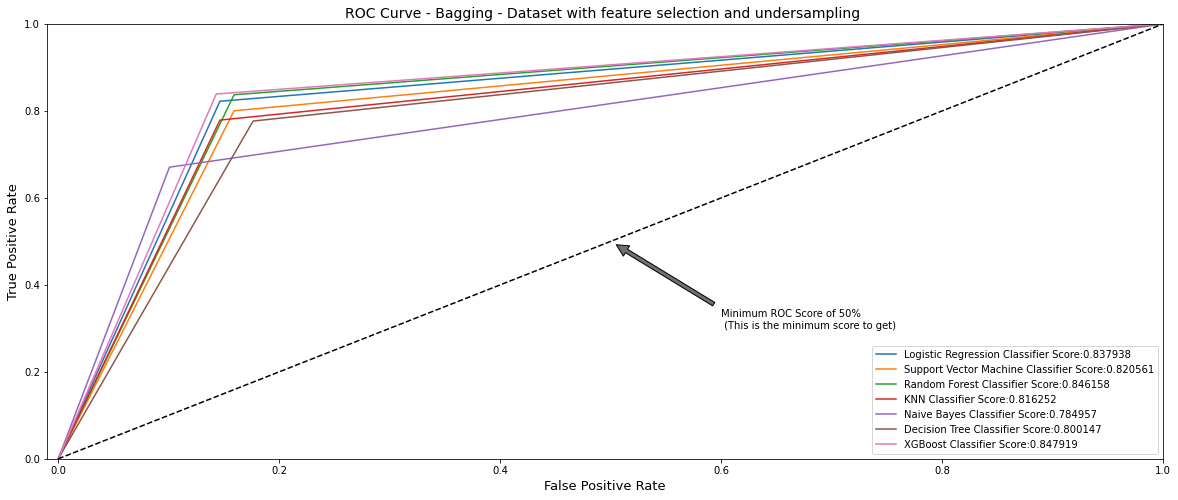

In [186]:
def graph_roc_curve_multiple4(Fpr_LR,Tps_LR,Fpr_SVM,Tps_SVM,Fpr_RF,Tps_RF,Fpr_KNN,Tps_KNN,Fpr_NB,Tps_NB,Fpr_DT,Tps_DT,Fpr_XG,Tps_XG):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve - Bagging - Dataset with feature selection and undersampling ', fontsize=14)
    plt.plot(Fpr_LR,Tps_LR, label='Logistic Regression Classifier Score:'+RS_AUC_LR)
    plt.plot(Fpr_SVM,Tps_SVM, label='Support Vector Machine Classifier Score:'+RS_AUC_SVM)
    plt.plot(Fpr_RF,Tps_RF, label='Random Forest Classifier Score:'+RS_AUC_RF)
    plt.plot(Fpr_KNN,Tps_KNN, label='KNN Classifier Score:'+RS_AUC_KNN)
    plt.plot(Fpr_NB,Tps_NB, label='Naive Bayes Classifier Score:'+RS_AUC_NB)
    plt.plot(Fpr_DT,Tps_DT, label='Decision Tree Classifier Score:'+RS_AUC_DT)
    plt.plot(Fpr_XG,Tps_XG, label='XGBoost Classifier Score:'+RS_AUC_XG)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple4(Fpr_LR,Tps_LR,Fpr_SVM,Tps_SVM,Fpr_RF,Tps_RF,Fpr_KNN,Tps_KNN,Fpr_NB,Tps_NB,Fpr_DT,Tps_DT,Fpr_XG,Tps_XG)
plt.show()